# **PRCP-1027: Skin Disorder Prediction**

# **Detecting The Type Of Skin Disoder**

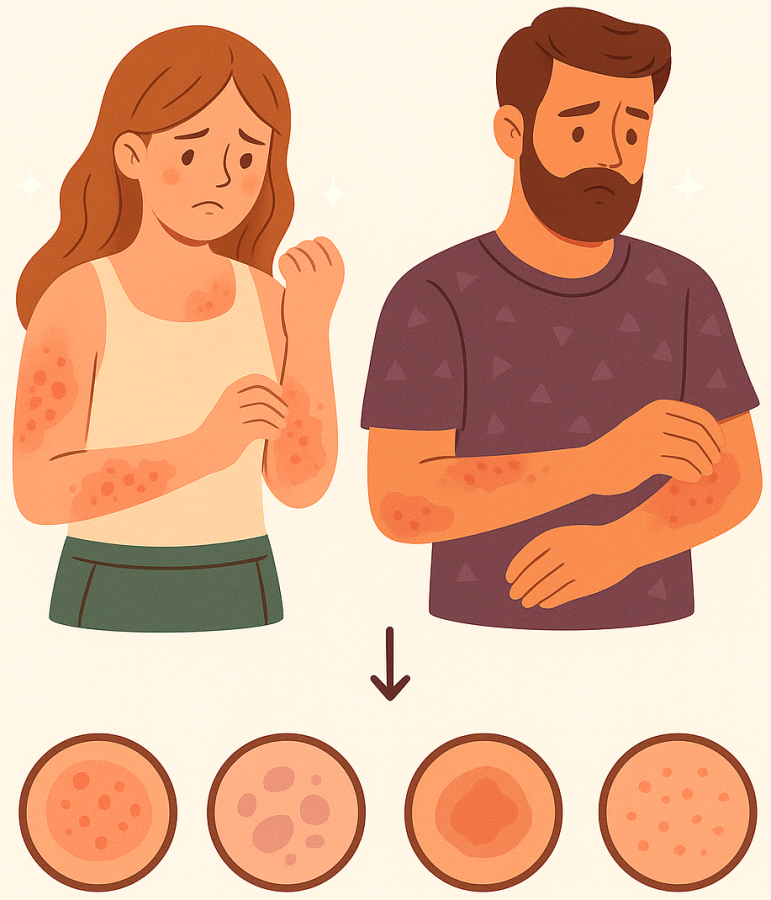

## **Project Type - Classification**

Name - **Ari R**

Contribution - Individual

# **Project Summary:**

* The Skin Disorder Prediction dataset focuses on identifying skin diseases early using patient data. Since skin disorders are common worldwide, late diagnosis can cause serious complications and higher healthcare costs. With predictive analytics, doctors can diagnose faster and more accurately, improving patient care and reducing the strain on healthcare systems.

* The goal of this project is to build a machine learning model that predicts skin diseases from patient data. This helps doctors detect cases early, prioritize high-risk patients, and suggest better treatments, while also reducing misdiagnosis and improving clinical efficiency.

* The dataset includes patient demographics, clinical details, and symptoms for disease classification. Preprocessing steps handled missing values, encoded categories, normalized features, and balanced classes. EDA revealed key patterns, highlighting the importance of age, lesion traits, and family history in predicting skin disorders.

* We tested models like Random Forest, XGBoost, LightGBM and Logistic Regression, comparing them using Accuracy, Precision, Recall, F1-score, and ROC-AUC. Since this is a healthcare problem, Recall was prioritized to correctly identify more true cases and reduce missed diagnoses.

* Logistic Regression was chosen as the final model for its strong performance, interpretability, and reliability. Its explainable nature makes it ideal for healthcare, providing doctors with clear insights for early detection of skin diseases and better patient outcomes.

# **Problem Statement:**

> Skin disorders often share similar symptoms, making accurate diagnosis difficult and time-consuming. This project aims to build a machine learning model that classifies patients into six skin disorder categories using clinical, histopathological, and demographic features. Such a system can assist doctors in early detection, reduce errors, and improve treatment outcomes.

**Task 1:** Prepare a complete data analysis report on the given data.

**Task 2:** Create a predictive model  using machine learning techniques to predict the various classes of skin disease.

**Task3:** Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.


# ***Let's Begin!***

# **1. Know Your Data**

## **1.1. Import Libraries:**

In [71]:
# ===== Imports =====

# ===== General =====
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

# ===== Visualization =====
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import patheffects
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects
%matplotlib inline

# ===== Hypotheses testing =====
from scipy.stats import chi2_contingency

# ===== Preprocessing =====
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ===== Outlier Influence =====
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

# ===== Imbalanced handling =====
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize

# ===== Model Selection =====
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# ===== Evaluation Metrics =====
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, classification_report)
from sklearn.metrics import (precision_recall_curve, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

## **1.2. Data Collection / Loading:**

In [3]:
# ===== Load Data =====
df = pd.read_csv('dataset_35_dermatology.csv')

# ===== Checking first five rows of dataset =====
df.head(5).T

0  1   2   3   4
erythema                                   2  3   2   2   2
scaling                                    2  3   1   2   3
definite_borders                           0  3   2   2   2
itching                                    3  2   3   0   2
koebner_phenomenon                         0  1   1   0   2
polygonal_papules                          0  0   3   0   2
follicular_papules                         0  0   0   0   0
oral_mucosal_involvement                   0  0   3   0   2
knee_and_elbow_involvement                 1  1   0   3   0
scalp_involvement                          0  1   0   2   0
family_history                             0  1   0   0   0
melanin_incontinence                       0  0   1   0   1
eosinophils_in_the_infiltrate              0  0   0   0   0
PNL_infiltrate                             0  1   0   3   0
fibrosis_of_the_papillary_dermis           0  0   0   0   0
exocytosis                                 3  1   1   0   1
acanthosis                                 2  2   2   2   2
hyperkeratosis                             0  0   0   0   0
parakeratosis                              0  2   2   3   0
clubbing_of_the_rete_ridges                0  2   0   2   0
elongation_of_the_rete_ridges              0  2   0   2   0
thinning_of_the_suprapapillary_epidermis   0  2   0   2   0
spongiform_pustule                         0  2   0   2   0
munro_microabcess                          0  1   0   0   0
focal_hypergranulosis                      0  0   2   0   2
disappearance_of_the_granular_layer        0  0   0   3   2
vacuolisation_and_damage_of_basal_layer    0  0   2   0   3
spongiosis                                 3  0   3   0   2
saw-tooth_appearance_of_retes              0  0   2   0   3
follicular_horn_plug                       0  0   0   0   0
perifollicular_parakeratosis               0  0   0   0   0
inflammatory_monoluclear_inflitrate        1  1   2   3   2
band-like_infiltrate                       0  0   3   0   3
Age                                       55  8  26  40  45
class                                      2  1   3   1   3

In [4]:
# ===== Checking last five rows of dataset =====
df.tail(5).T

361 362 363 364 365
erythema                                   2   3   3   2   3
scaling                                    1   2   2   1   2
definite_borders                           1   1   2   3   2
itching                                    0   0   2   1   0
koebner_phenomenon                         1   1   3   2   0
polygonal_papules                          0   0   2   3   0
follicular_papules                         0   0   0   0   0
oral_mucosal_involvement                   0   0   2   2   0
knee_and_elbow_involvement                 0   0   0   0   3
scalp_involvement                          0   0   0   0   3
family_history                             0   0   0   0   0
melanin_incontinence                       0   0   2   2   0
eosinophils_in_the_infiltrate              0   0   2   0   0
PNL_infiltrate                             1   0   0   0   1
fibrosis_of_the_papillary_dermis           0   0   0   0   0
exocytosis                                 1   2   3   3   0
acanthosis                                 1   2   3   2   2
hyperkeratosis                             0   0   0   0   0
parakeratosis                              0   0   0   0   2
clubbing_of_the_rete_ridges                0   0   0   0   3
elongation_of_the_rete_ridges              0   0   0   0   2
thinning_of_the_suprapapillary_epidermis   0   0   0   0   3
spongiform_pustule                         0   0   0   0   0
munro_microabcess                          0   0   0   0   2
focal_hypergranulosis                      0   0   3   3   0
disappearance_of_the_granular_layer        0   1   0   0   2
vacuolisation_and_damage_of_basal_layer    0   0   3   2   0
spongiosis                                 1   1   0   0   0
saw-tooth_appearance_of_retes              0   0   3   1   0
follicular_horn_plug                       0   0   0   0   0
perifollicular_parakeratosis               0   0   0   0   0
inflammatory_monoluclear_inflitrate        2   2   2   2   3
band-like_infiltrate                       0   0   3   3   0
Age                                       25  36  28  50  35
class                                      4   4   3   3   1

## **1.3. Basic Overview:**

In [5]:
# ===== Basic Overview =====

# ===== To view the summary stats of numerical columns =====
df.describe().T

count      mean       std  min  25%  \
erythema                                  366.0  2.068306  0.664753  0.0  2.0   
scaling                                   366.0  1.795082  0.701527  0.0  1.0   
definite_borders                          366.0  1.549180  0.907525  0.0  1.0   
itching                                   366.0  1.366120  1.138299  0.0  0.0   
koebner_phenomenon                        366.0  0.633880  0.908016  0.0  0.0   
polygonal_papules                         366.0  0.448087  0.957327  0.0  0.0   
follicular_papules                        366.0  0.166667  0.570588  0.0  0.0   
oral_mucosal_involvement                  366.0  0.377049  0.834147  0.0  0.0   
knee_and_elbow_involvement                366.0  0.614754  0.982979  0.0  0.0   
scalp_involvement                         366.0  0.519126  0.905639  0.0  0.0   
family_history                            366.0  0.125683  0.331946  0.0  0.0   
melanin_incontinence                      366.0  0.404372  0.869818  0.0  0.0   
eosinophils_in_the_infiltrate             366.0  0.139344  0.411790  0.0  0.0   
PNL_infiltrate                            366.0  0.546448  0.815451  0.0  0.0   
fibrosis_of_the_papillary_dermis          366.0  0.336066  0.853139  0.0  0.0   
exocytosis                                366.0  1.368852  1.104418  0.0  0.0   
acanthosis                                366.0  1.956284  0.712512  0.0  2.0   
hyperkeratosis                            366.0  0.527322  0.757116  0.0  0.0   
parakeratosis                             366.0  1.289617  0.917562  0.0  1.0   
clubbing_of_the_rete_ridges               366.0  0.663934  1.056829  0.0  0.0   
elongation_of_the_rete_ridges             366.0  0.991803  1.162161  0.0  0.0   
thinning_of_the_suprapapillary_epidermis  366.0  0.633880  1.034924  0.0  0.0   
spongiform_pustule                        366.0  0.295082  0.670578  0.0  0.0   
munro_microabcess                         366.0  0.363388  0.759721  0.0  0.0   
focal_hypergranulosis                     366.0  0.393443  0.849406  0.0  0.0   
disappearance_of_the_granular_layer       366.0  0.464481  0.864899  0.0  0.0   
vacuolisation_and_damage_of_basal_layer   366.0  0.456284  0.954873  0.0  0.0   
spongiosis                                366.0  0.953552  1.130172  0.0  0.0   
saw-tooth_appearance_of_retes             366.0  0.453552  0.954744  0.0  0.0   
follicular_horn_plug                      366.0  0.103825  0.450433  0.0  0.0   
perifollicular_parakeratosis              366.0  0.114754  0.488723  0.0  0.0   
inflammatory_monoluclear_inflitrate       366.0  1.866120  0.726108  0.0  1.0   
band-like_infiltrate                      366.0  0.554645  1.105908  0.0  0.0   
class                                     366.0  2.803279  1.597803  1.0  1.0   

                                          50%  75%  max  
erythema                                  2.0  2.0  3.0  
scaling                                   2.0  2.0  3.0  
definite_borders                          2.0  2.0  3.0  
itching                                   1.0  2.0  3.0  
koebner_phenomenon                        0.0  1.0  3.0  
polygonal_papules                         0.0  0.0  3.0  
follicular_papules                        0.0  0.0  3.0  
oral_mucosal_involvement                  0.0  0.0  3.0  
knee_and_elbow_involvement                0.0  1.0  3.0  
scalp_involvement                         0.0  1.0  3.0  
family_history                            0.0  0.0  1.0  
melanin_incontinence                      0.0  0.0  3.0  
eosinophils_in_the_infiltrate             0.0  0.0  2.0  
PNL_infiltrate                            0.0  1.0  3.0  
fibrosis_of_the_papillary_dermis          0.0  0.0  3.0  
exocytosis                                2.0  2.0  3.0  
acanthosis                                2.0  2.0  3.0  
hyperkeratosis                            0.0  1.0  3.0  
parakeratosis                             1.0  2.0  3.0  
clubbing_of_the_rete_ridges               0.0 

In [6]:
# ===== To View the categorical columns =====
df.describe(include='O').T

count unique top freq
Age   366     61  40   17

## **1.4. Dataset Information:**

In [7]:
# ===== Checking the info of dataset =====
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

> The ‘Age’ column was initially stored as an object type due to non-numeric entries; it was cleaned and converted into a numeric type to ensure proper statistical analysis.

In [8]:
# ===== Checking the no. of rows and columns =====
df.shape

(366, 35)

## **1.5. Domain Analysis:**

In [9]:
# ===== Domain Analysis =====
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

### **Domain Analysis Report:**

> Dataset contains 34 attributes (12 clinical + 22 histopathological), and 6 target classes:  
> psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, pityriasis rubra pilaris.

### **Clinical Attributes (12):**

| **No.** | **Feature**                    | **Description**                                                               |
| ------- | ------------------------------ | ----------------------------------------------------------------------------- |
| 1       | **Erythema**                   | Presence or absence of redness or inflammation of the skin.                   |
| 2       | **Scaling**                    | Whether there are visible scales or flakes on the skin's surface.             |
| 3       | **Definite Borders**           | Describes whether the skin lesion has well-defined or clear borders.          |
| 4       | **Itching**                    | Indicates if the patient experiences itching (pruritus).                      |
| 5       | **Koebner Phenomenon**         | Whether new lesions appear at sites of trauma or injury to the skin.          |
| 6       | **Polygonal Papules**          | Presence of polygonal-shaped raised skin lesions.                             |
| 7       | **Follicular Papules**         | Raised lesions involving hair follicles.                                      |
| 8       | **Oral Mucosal Involvement**   | Whether the condition affects mucous membranes inside the mouth.              |
| 9       | **Knee and Elbow Involvement** | Whether the condition is specifically located on knees and elbows.            |
| 10      | **Scalp Involvement**          | Whether the condition affects the scalp.                                      |
| 11      | **Family History (0 or 1)**    | Indicates presence of family history of similar conditions (genetic factors). |
| 12      | **Age**                        | Age of the patient at the time of data collection.                            |

>**Summary of all the above Attributes :**
>- These clinical attributes are important for dermatologists to assess and diagnose various skin conditions accurately. They are used in clinical examinations and research to characterize the presentation and progression of dermatological diseases. Researchers and healthcare providers can analyze these attributes to understand patterns and correlations in different skin conditions and to develop treatment plans tailored to individual patients.

### **Histopathological Attributes (22):**

| **No.** | **Feature**                              | **Description**                                                                                |
| ------- | ---------------------------------------- | ---------------------------------------------------------------------------------------------- |
| 1       | **Melanin Incontinence**                 | Presence of melanin pigment within the dermis due to melanocyte damage or melanin leakage.     |
| 2       | **Eosinophils in the Infiltrate**        | Indicates eosinophils (allergy/inflammation cells) in the inflammatory infiltrate.             |
| 3       | **PNL Infiltrate**                       | Presence of polymorphonuclear leukocytes, linked to early-stage inflammation.                  |
| 4       | **Fibrosis of the Papillary Dermis**     | Excess fibrous tissue in the papillary dermis, usually from chronic inflammation/scarring.     |
| 5       | **Exocytosis**                           | Migration of inflammatory cells (e.g., lymphocytes) into the epidermis.                        |
| 6       | **Acanthosis**                           | Thickening of the epidermis (stratum spinosum), seen in psoriasis and acanthosis nigricans.    |
| 7       | **Hyperkeratosis**                       | Excessive thickening of the outer skin layer (stratum corneum).                                |
| 8       | **Parakeratosis**                        | Retention of nuclei in the stratum corneum, common in psoriasis.                               |
| 9       | **Clubbing of the Rete Ridges**          | Bulbous enlargement of rete ridges (epidermal projections into dermis).                        |
| 10      | **Elongation of the Rete Ridges**        | Lengthening of epidermal projections into the dermis.                                          |
| 11      | **Thinning of Suprapapillary Epidermis** | Reduced thickness above dermal papillae, seen in some inflammatory disorders.                  |
| 12      | **Spongiform Pustule**                   | Blister-like epidermal structure filled with neutrophils; hallmark of pustular psoriasis.      |
| 13      | **Munro Microabscess**                   | Small clusters of neutrophils in the stratum corneum, typical of psoriasis.                    |
| 14      | **Focal Hypergranulosis**                | Localized thickening of the granular epidermal layer.                                          |
| 15      | **Disappearance of Granular Layer**      | Loss or reduction of the epidermal granular layer.                                             |
| 16      | **Vacuolization of Basal Layer**         | Empty vacuoles in the basal epidermis, linked to autoimmune blistering disorders.              |
| 17      | **Spongiosis**                           | Fluid buildup between epidermal cells (intercellular edema), common in eczema.                 |
| 18      | **Saw-tooth Appearance of Rete Ridges**  | Jagged, irregular epidermal projections, common in lichen planus.                              |
| 19      | **Follicular Horn Plug**                 | Keratin-filled plug inside a hair follicle (e.g., acne).                                       |
| 20      | **Perifollicular Parakeratosis**         | Parakeratosis specifically around hair follicles.                                              |
| 21      | **Inflammatory Mononuclear Infiltrate**  | Mononuclear WBCs (e.g., lymphocytes) in dermal/epidermal tissue, sign of chronic inflammation. |
| 22      | **Band-like Infiltrate**                 | Dense, linear accumulation of inflammatory cells, often in lichen planus.                      |

>**Summary of all of the above :**
>- These histopathological attributes provide crucial information for dermatopathologists and researchers to diagnose and classify various skin disorders accurately. They aid in understanding the underlying histological changes associated with different dermatological conditions.

### **Class of Diseases (1):**

| **Class No.** | **Disease Name**             | **Description**                                                                                                                                                              |
| ------------- | ---------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1             | **Psoriasis**                | A skin disease that causes itchy, scaly rashes, most commonly on knees, elbows, trunk, and scalp.                                                                            |
| 2             | **Seboreic Dermatitis**      | A common inflammatory condition mainly affecting the scalp, causing dandruff, scaly patches, and inflamed skin; also affects oily areas (face, nose, eyebrows, ears, chest). |
| 3             | **Lichen Planus**            | An inflammatory condition affecting skin, hair, nails, and mucous membranes; appears as purple, itchy, flat bumps on skin and lacy white patches in mouth/genitals.          |
| 4             | **Pityriasis Rosea**         | A rash beginning with a “herald patch” (oval spot), followed by smaller spots in a pine-tree pattern; itchy, self-limiting, and most common between ages 10–35.              |
| 5             | **Chronic Dermatitis**       | A long-term condition causing swelling, irritation, itchy/dry skin, rashes, or blisters. Includes atopic dermatitis (eczema), contact dermatitis, and seborrheic dermatitis. |
| 6             | **Pityriasis Rubra Pilaris** | A rare chronic disorder causing persistent skin inflammation and scaling; may affect part of or the entire body; occurs in both children and adults equally.                 |

> Machine learning algorithm to predict the various skin diseases. The main objective of this project is to achieve maximum accuracy of skin disease prediction. Machine learning techniques helps in detection of skin disease at an initial stage. The feature extraction plays a key role in classification of skin diseases.The usage of Machine Learning algorithms reduces the need for human labor, such as manual feature extraction and data reconstruction for classification purpose. Moreover, Explainable ML model is used to interpret the decisions made by our model.

# **2. Data wrangling / Cleaning**

## **2.1. Change the dtype:**

In [10]:
# ===== Convert 'Age' column from object to numeric =====
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

## **2.2. Extracting categorical and numerical columns**

In [11]:
# ===== Extracting categorical and numerical columns =====
num_col = [col for col in df.columns if df[col].dtype != 'object']

# ===== Looking at unique values in categorical and numerical columns =====
print("\nNumerical Columns:\n")
for col in num_col:
    print(f'\n{col}:\n{df[col].unique()}')


Numerical Columns:


erythema:
[2 3 1 0]

scaling:
[2 3 1 0]

definite_borders:
[0 3 2 1]

itching:
[3 2 0 1]

koebner_phenomenon:
[0 1 2 3]

polygonal_papules:
[0 3 2 1]

follicular_papules:
[0 3 1 2]

oral_mucosal_involvement:
[0 3 2 1]

knee_and_elbow_involvement:
[1 0 3 2]

scalp_involvement:
[0 1 2 3]

family_history:
[0 1]

melanin_incontinence:
[0 1 2 3]

eosinophils_in_the_infiltrate:
[0 2 1]

PNL_infiltrate:
[0 1 3 2]

fibrosis_of_the_papillary_dermis:
[0 3 1 2]

exocytosis:
[3 1 0 2]

acanthosis:
[2 3 1 0]

hyperkeratosis:
[0 2 1 3]

parakeratosis:
[0 2 3 1]

clubbing_of_the_rete_ridges:
[0 2 1 3]

elongation_of_the_rete_ridges:
[0 2 3 1]

thinning_of_the_suprapapillary_epidermis:
[0 2 3 1]

spongiform_pustule:
[0 2 1 3]

munro_microabcess:
[0 1 2 3]

focal_hypergranulosis:
[0 2 3 1]

disappearance_of_the_granular_layer:
[0 3 2 1]

vacuolisation_and_damage_of_basal_layer:
[0 2 3 1]

spongiosis:
[3 0 2 1]

saw-tooth_appearance_of_retes:
[0 2 3 1]

follicular_horn_plug:
[0 1 2

**Observations from these features:**

| **Column**                                       | **Unique Values**                                   | **Count of Unique Values** | **Notes**                                                        |
| ------------------------------------------------ | --------------------------------------------------- | -------------------------- | ---------------------------------------------------------------- |
| **erythema**                                     | \[2, 3, 1, 0]                                       | 4                          | Ordinal scale (0–3 severity)                                     |
| **scaling**                                      | \[2, 3, 1, 0]                                       | 4                          | Ordinal scale (0–3 severity)                                     |
| **definite\_borders**                            | \[0, 3, 2, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **itching**                                      | \[3, 2, 0, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **koebner\_phenomenon**                          | \[0, 1, 2, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **polygonal\_papules**                           | \[0, 3, 2, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **follicular\_papules**                          | \[0, 3, 1, 2]                                       | 4                          | Ordinal scale (0–3)                                              |
| **oral\_mucosal\_involvement**                   | \[0, 3, 2, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **knee\_and\_elbow\_involvement**                | \[1, 0, 3, 2]                                       | 4                          | Ordinal scale (0–3)                                              |
| **scalp\_involvement**                           | \[0, 1, 2, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **family\_history**                              | \[0, 1]                                             | 2                          | Binary feature (0 = No, 1 = Yes)                                 |
| **melanin\_incontinence**                        | \[0, 1, 2, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **eosinophils\_in\_the\_infiltrate**             | \[0, 2, 1]                                          | 3                          | Ordinal scale (0–3, not all values present)                      |
| **PNL\_infiltrate**                              | \[0, 1, 3, 2]                                       | 4                          | Ordinal scale (0–3)                                              |
| **fibrosis\_of\_the\_papillary\_dermis**         | \[0, 3, 1, 2]                                       | 4                          | Ordinal scale (0–3)                                              |
| **exocytosis**                                   | \[3, 1, 0, 2]                                       | 4                          | Ordinal scale (0–3)                                              |
| **acanthosis**                                   | \[2, 3, 1, 0]                                       | 4                          | Ordinal scale (0–3)                                              |
| **hyperkeratosis**                               | \[0, 2, 1, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **parakeratosis**                                | \[0, 2, 3, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **clubbing\_of\_the\_rete\_ridges**              | \[0, 2, 1, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **elongation\_of\_the\_rete\_ridges**            | \[0, 2, 3, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **thinning\_of\_the\_suprapapillary\_epidermis** | \[0, 2, 3, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **spongiform\_pustule**                          | \[0, 2, 1, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **munro\_microabcess**                           | \[0, 1, 2, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **focal\_hypergranulosis**                       | \[0, 2, 3, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **disappearance\_of\_the\_granular\_layer**      | \[0, 3, 2, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **vacuolisation\_and\_damage\_of\_basal\_layer** | \[0, 2, 3, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **spongiosis**                                   | \[3, 0, 2, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **saw-tooth\_appearance\_of\_retes**             | \[0, 2, 3, 1]                                       | 4                          | Ordinal scale (0–3)                                              |
| **follicular\_horn\_plug**                       | \[0, 1, 2, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **perifollicular\_parakeratosis**                | \[0, 2, 1, 3]                                       | 4                          | Ordinal scale (0–3)                                              |
| **inflammatory\_monoluclear\_inflitrate**        | \[1, 2, 3, 0]                                       | 4                          | Ordinal scale (0–3)                                              |
| **band-like\_infiltrate**                        | \[0, 3, 1, 2]                                       | 4                          | Ordinal scale (0–3)                                              |
| **Age**                                          | \[0, 7, 8, 9, …, 75, NaN] (various integers/floats) | 60+                        | Continuous numeric variable; has some missing values (NaN).      |
| **class**                                        | \[1, 2, 3, 4, 5, 6]                                 | 6                          | Target variable: six skin disorders (multiclass classification). |


## **2.3. Observations from Numeric Columns and Imputation**

In [12]:
# ===== Fill NaN with median =====
df['Age'] = df['Age'].fillna(df['Age'].median())

# ===== Finally cast to integer =====
df['Age'] = df['Age'].astype(int)

## **2.4. Check for and remove duplicate values**

In [13]:
# ===== Check duplicate values =====
# ===== Total number of rows =====
total_rows = len(df)

# ===== Count duplicate rows =====
duplicate_count = df.duplicated().sum()

# ===== Percentage of duplicates =====
duplicate_percentage = (duplicate_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Duplicate Rows: {duplicate_count}")
print(f"Percentage of Duplicates: {duplicate_percentage:.2f}%")

Total Rows: 366
Duplicate Rows: 0
Percentage of Duplicates: 0.00%


> The dataset contains a total of 366 rows with no duplicate records, resulting in 0% duplicate entries.

# **3. Task 1 - Exploratory Data Analysis (EDA)**

## **3.1. Univariate Analysis: Investigating Individual Features**

### **3.1.1. Clinical Features**

In [14]:
# ===== List of clinical features related to a medical condition. =====
clinical_features = [
    'erythema',
    'scaling',
    'definite_borders',
    'itching',
    'koebner_phenomenon',
    'polygonal_papules',
    'follicular_papules',
    'oral_mucosal_involvement',
    'knee_and_elbow_involvement',
    'scalp_involvement',
    'family_history'
]

### **Chart-1. Distribution of Clinical Features**

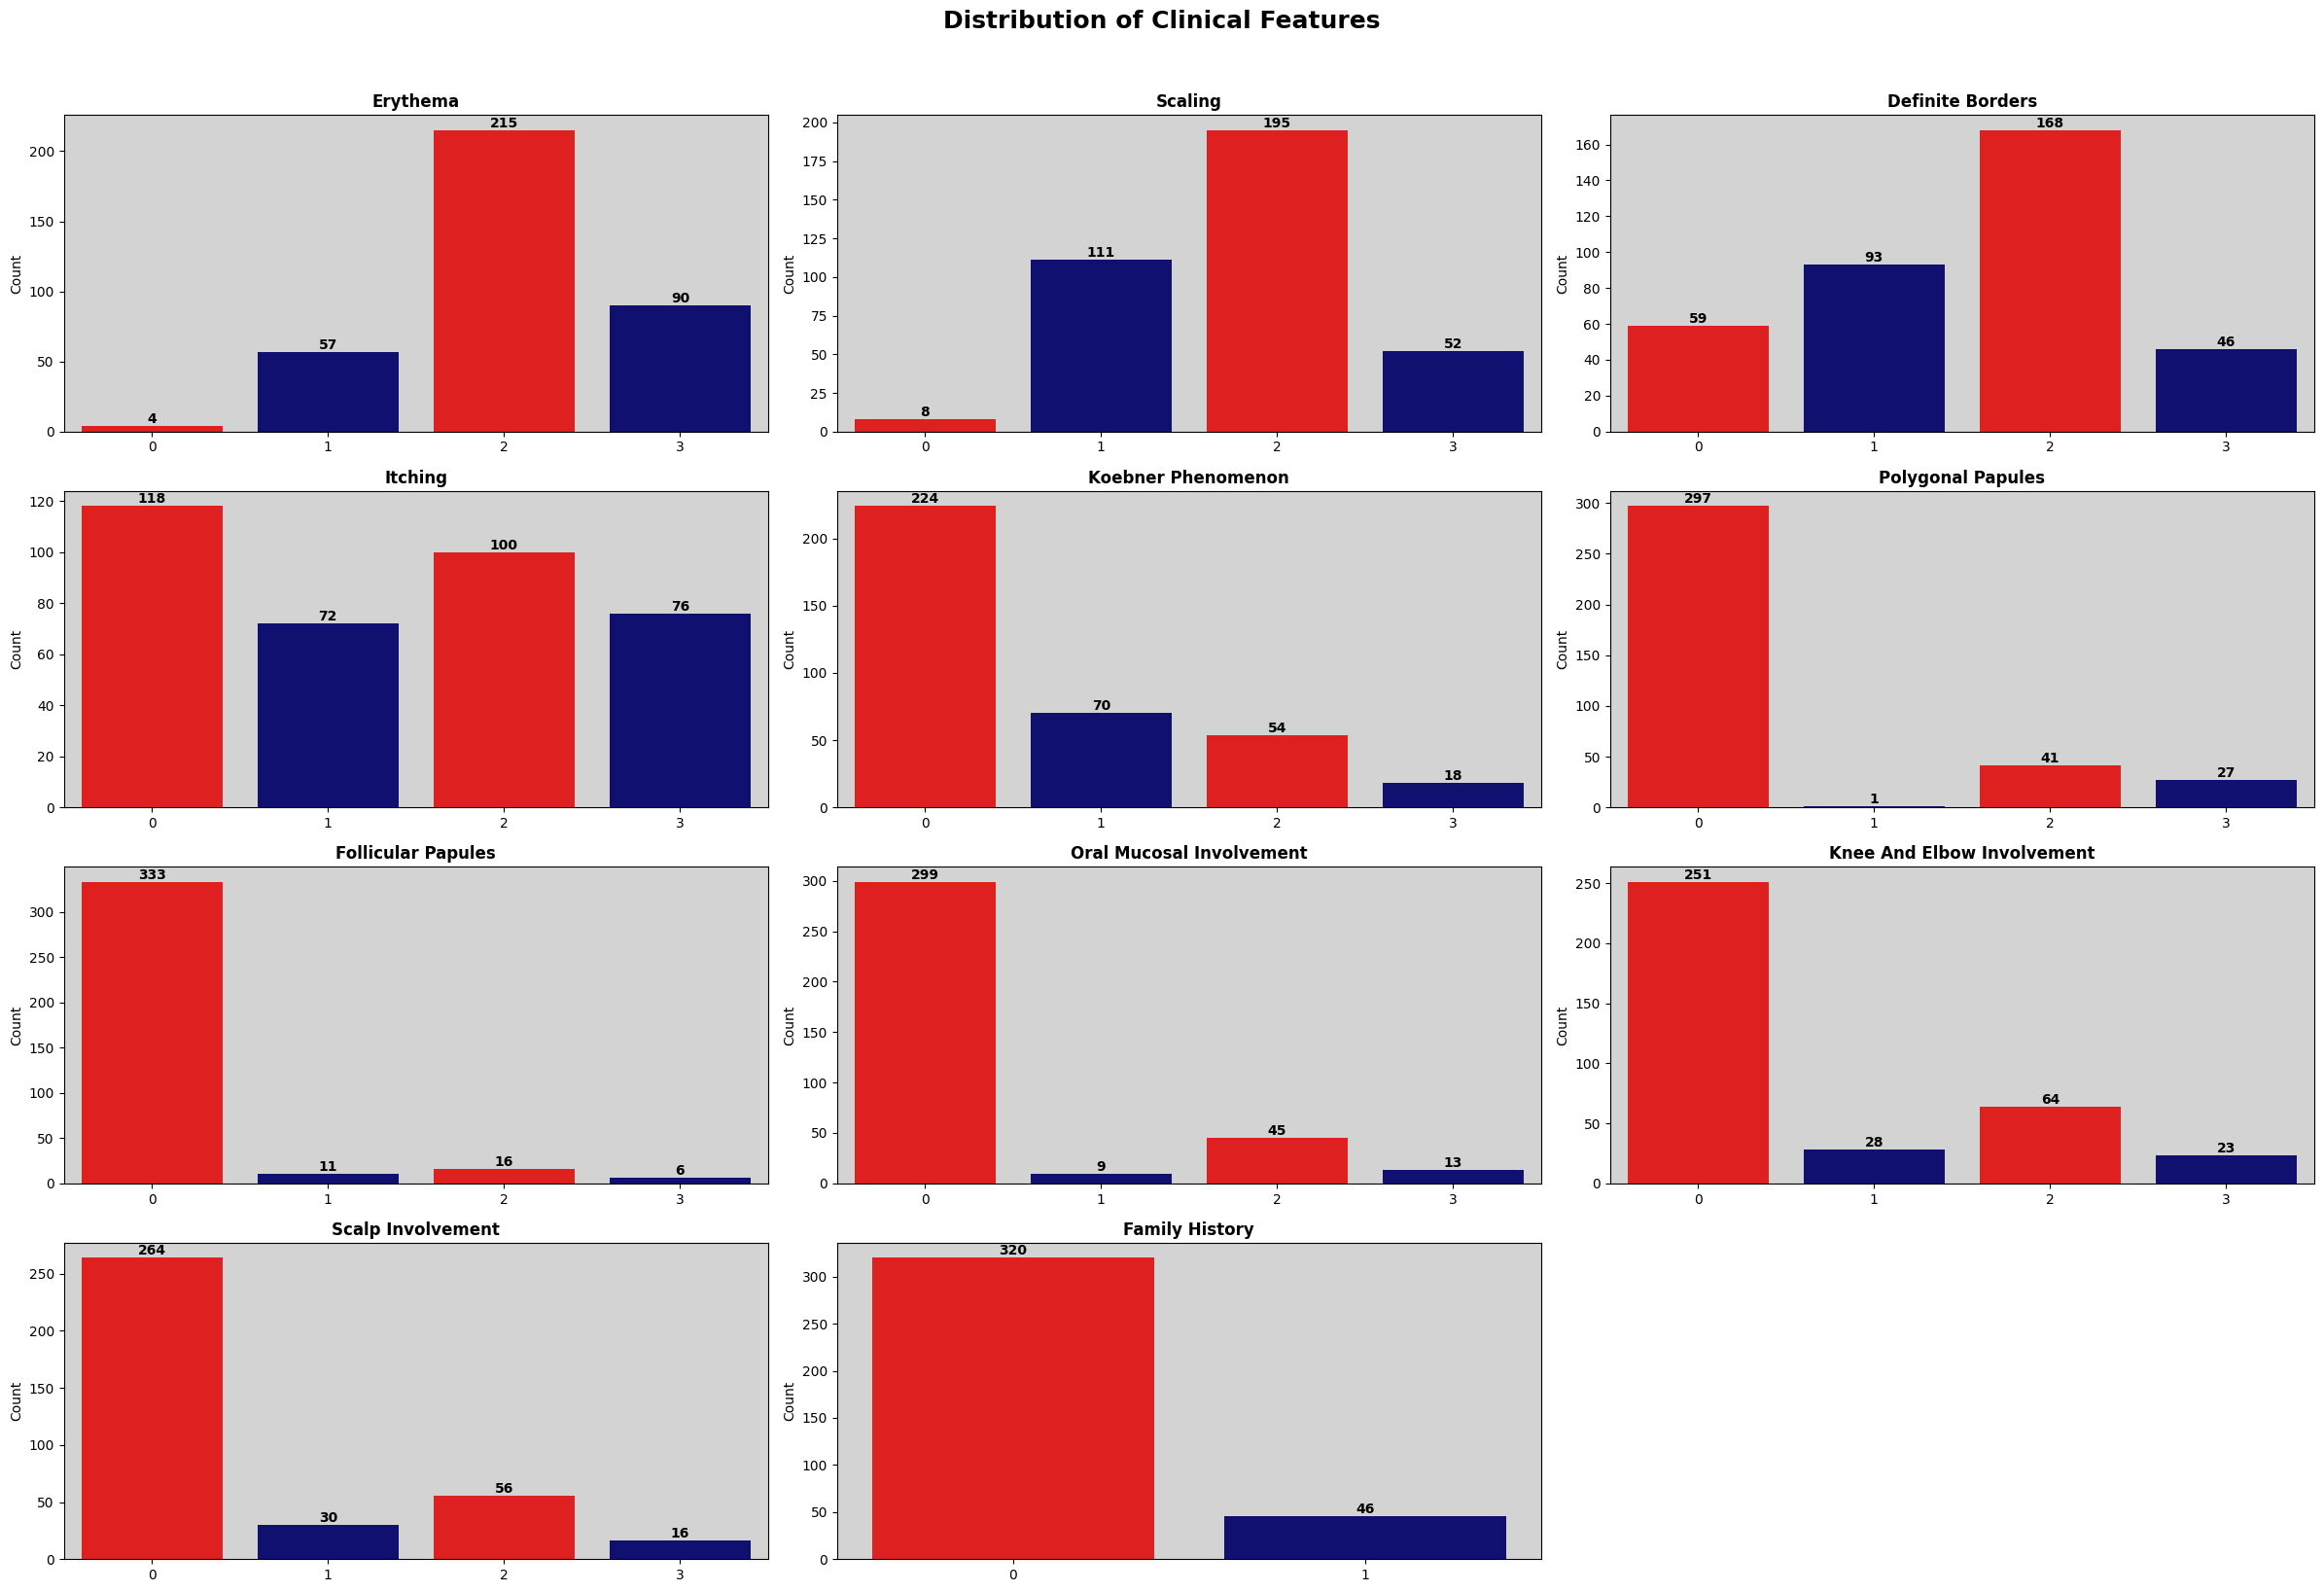

In [15]:
# ===== Clinical Features =====
# ====== Create Grid ======
n_features = len(clinical_features)
rows = (n_features // 3) + int(n_features % 3 != 0)
plt.figure(figsize=(24, 16))

for i, feature in enumerate(clinical_features, 1):
    ax = plt.subplot(rows, 3, i)
    sns.countplot(x=feature, data=df, palette=["red", "navy"], ax=ax)
    ax.set_title(feature.replace("_", " ").title(), fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.set_facecolor("lightgray")

    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=10, fontweight="bold", color="black"
        )

plt.suptitle("Distribution of Clinical Features", fontsize=18, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

### **Observations:**

**1. Why did you pick the specific chart?**

* The bar charts are chosen because they are the simplest and clearest way to show the distribution of categorical/ordinal clinical features (e.g., Erythema, Scaling, Borders, Itching, Family History).

* Each feature has discrete levels (0–3), and a bar chart makes it easy to see how many patients fall into each level.

* Side-by-side subplots give a comparative overview across multiple features in one glance.

**2. What is/are the insight(s) found from the chart?**

**Erythema, Scaling, Borders:**
* Most patients fall in level 2 (moderate presence), with very few at level 0. → These features are common and pronounced in patients.

**Itching:**
* Distribution is spread across 0, 1, 2, and 3, showing variability — some patients have no itching, while others experience it strongly.

**Koebner Phenomenon & Papules (Polygonal/Follicular):**
* Mostly concentrated at 0 (absence), meaning these are rare clinical features in the dataset.

**Oral Mucosal Involvement, Knee/Elbow, Scalp Involvement:**
* Again, majority of cases fall at 0, but some moderate (2) values appear — so these features are present but not dominant.

**Family History:**
* Large majority have no family history (0), only a smaller subset has 1 (present) → family history isn’t a strong predictor here.

**Overall trend:**

* Certain features (Erythema, Scaling, Borders) are highly prevalent,

* Others (Papules, Oral involvement, Family history) are rare.

* Some (Itching, Scalp involvement) show diverse patterns, suggesting possible stratification.

**3. Will the gained insights help create a positive business impact?**

* Yes, in several ways:

**For healthcare providers:**
* They can prioritize common clinical indicators (Erythema, Scaling, Borders) when diagnosing and building predictive models - saving time and resources.

### **3.1.2. Age Feature**

### **Chart-2. Distribution of Age Feature**

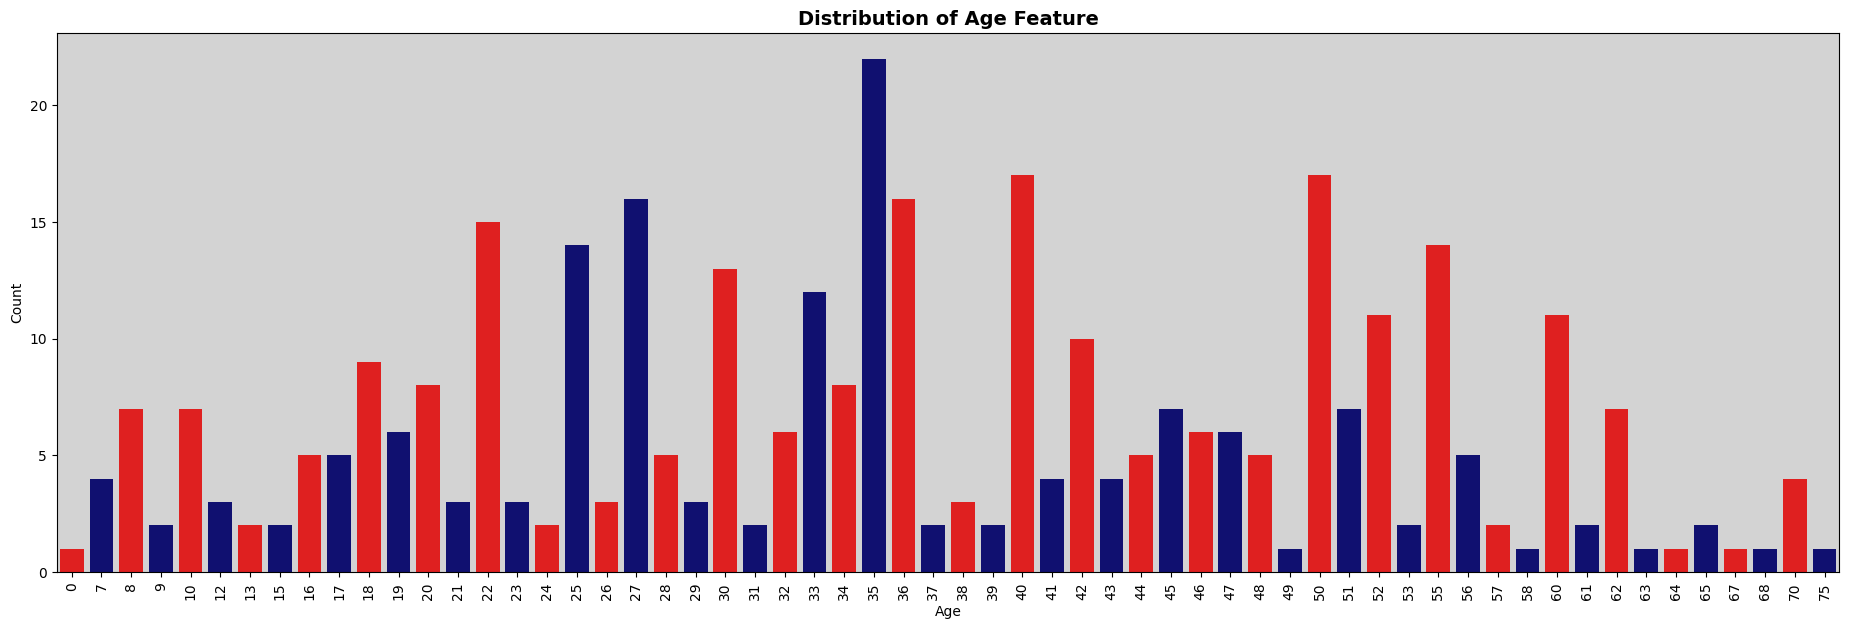

In [16]:
# ===== Age Feature =====
plt.figure(figsize=(23,7))
ax = sns.countplot(x="Age", data=df, palette=["red", "navy"])
ax.set_title("Distribution of Age Feature", fontsize=14, fontweight="bold")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.xticks(rotation=90)
ax.set_facecolor("lightgray")
plt.show()

### **Observations:**

**1. Why did you pick the specific chart?**

* A bar chart was chosen because age is a discrete numerical variable (integers like 0, 7, 18, etc.).

* It clearly shows how many patients fall into each specific age group, making it easy to spot peaks, gaps, and outliers.

* The color grouping (red vs. blue) helps compare categories (possibly male/female, disease classes, or presence/absence of condition).

**2. What is/are the insight(s) found from the chart?**

**From the distribution:**

* Patients are spread across all ages (0–75), but concentrations exist in certain ranges.

* Peaks around ages 22, 26, 35, 40, and 50 suggest these are the most common ages for occurrence.

* Very few cases in childhood (<10) and in elderly >65.

* The 35-year group has the highest spike (22 patients), suggesting middle-aged adults are most affected.

* The distribution is not uniform → some age brackets show significant clustering while others have very few cases.

**3. Will the gained insights help create a positive business impact?**

* yes — the insights help in better targeting, efficient healthcare delivery, and informed decision-making, which translates into positive business and social impact.

### **3.1.3. Histopathological Features**

In [17]:
# ===== Histopathological Feature =====
# ===== List of histopathological features related to a medical condition =====

Histopath_Features = [
    'melanin_incontinence',
    'eosinophils_in_the_infiltrate',
    'PNL_infiltrate',
    'fibrosis_of_the_papillary_dermis',
    'exocytosis', 'acanthosis',
    'hyperkeratosis',
    'parakeratosis',
    'clubbing_of_the_rete_ridges',
    'elongation_of_the_rete_ridges',
    'thinning_of_the_suprapapillary_epidermis',
    'spongiform_pustule',
    'munro_microabcess',
    'focal_hypergranulosis',
    'disappearance_of_the_granular_layer',
    'vacuolisation_and_damage_of_basal_layer',
    'spongiosis',
    'saw-tooth_appearance_of_retes',
    'follicular_horn_plug',
    'perifollicular_parakeratosis',
    'inflammatory_monoluclear_inflitrate',
    'band-like_infiltrate'
]

### **Chart-3. Distribution of Histopathological Features**

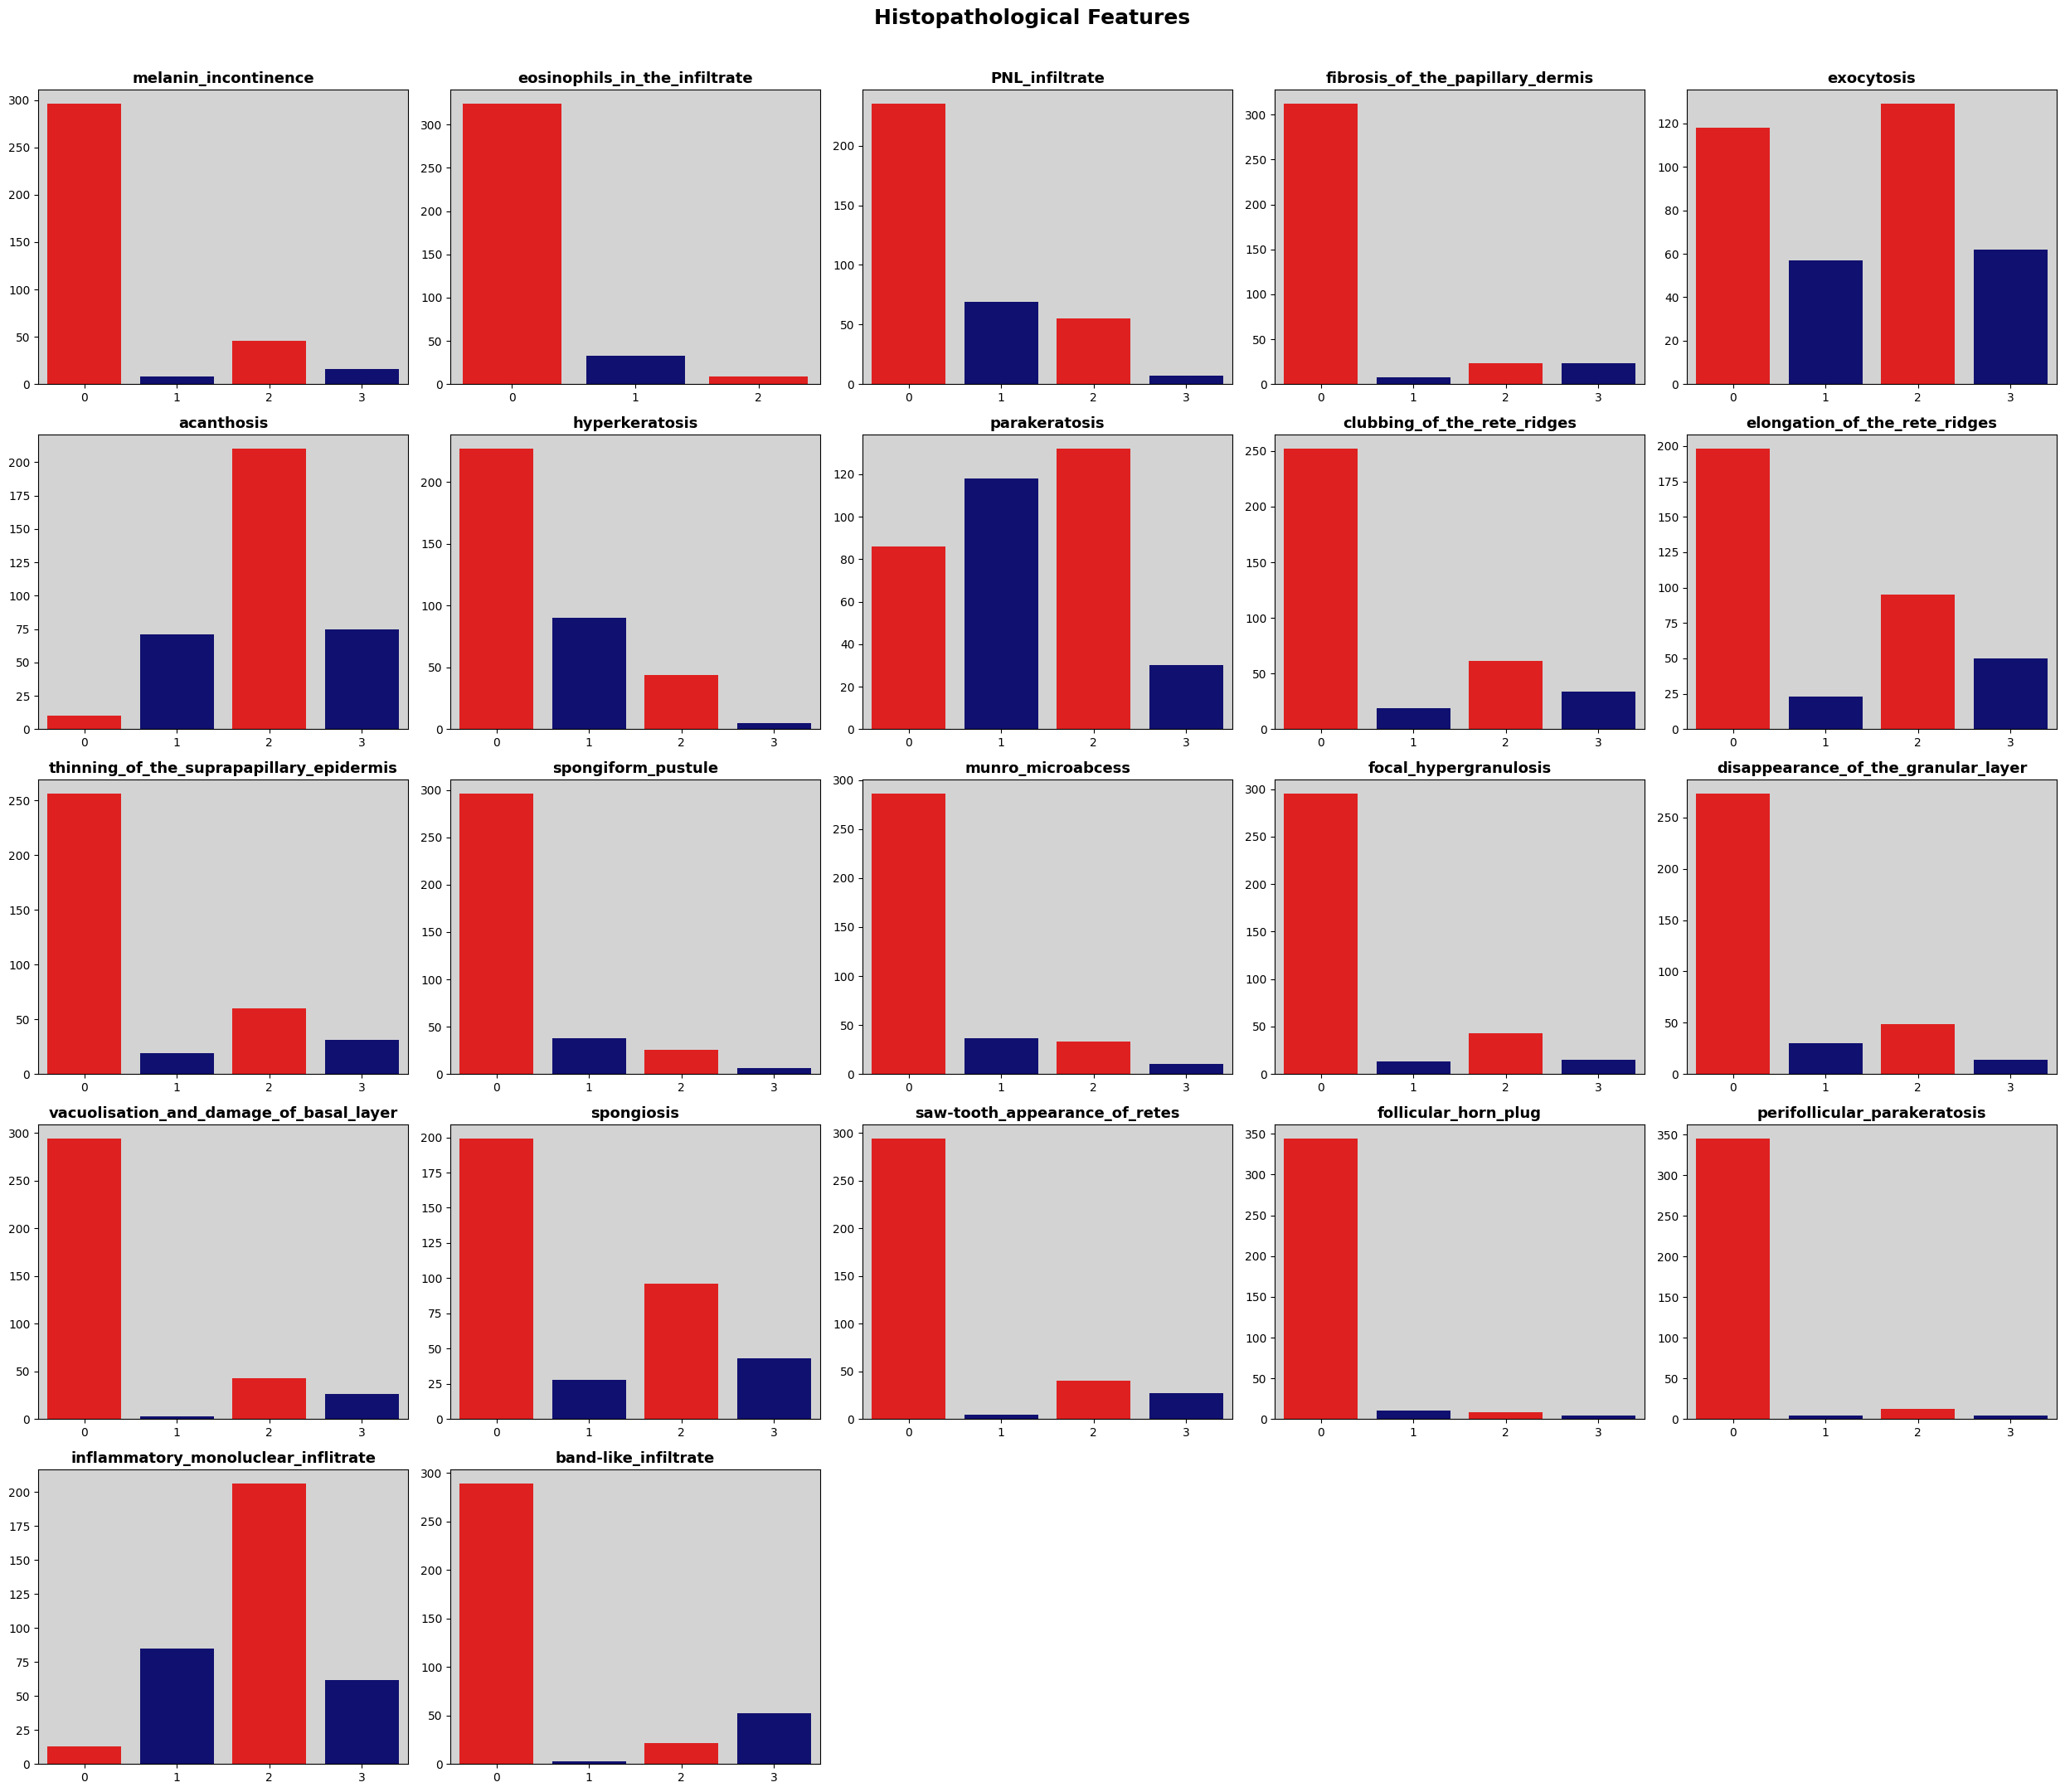

In [18]:
# ===== Histopathological Feature Run Code =====
n_cols = 5
n_rows = math.ceil(len(Histopath_Features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 22))
axes = axes.flatten()
for i, feature in enumerate(Histopath_Features):
    ax = axes[i]
    sns.countplot(
        x=df[feature],
        ax=ax,
        palette=["red", "navy"]
    )
    ax.set_title(feature, fontsize=13, fontweight="bold")
    ax.set_facecolor("lightgray")
    ax.set_xlabel("")
    ax.set_ylabel("")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histopathological Features", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### **Observation:**

**1. Why did you pick the specific chart?**

* A grouped bar chart was chosen because the histopathological features are categorical with ordinal levels (0–3).

* This chart type allows clear comparison of presence/absence and severity levels of each feature across patient groups.

* Multiple subplots make it easy to visualize many features side by side without losing clarity.

**2. What is/are the insight(s) found from the chart?**

**From the distributions:**

**Rare or mostly absent features:**

* Melanin incontinence, fibrosis of papillary dermis, spongiform pustule, munro microabscess, follicular horn plug, perifollicular parakeratosis, vacuolisation of basal layer → majority are at 0 (absent).

**Moderately present features:**

* Exocytosis, acanthosis, hyperkeratosis, parakeratosis, elongation of rete ridges → show significant distribution across levels 1–3, meaning they occur in many patients and vary in severity.

**Strongly present features:**

* Inflammatory mononuclear infiltrate shows a peak at level 2, suggesting it is a dominant histological marker.

* Acanthosis and parakeratosis also have high counts at level 2, indicating frequent pathological changes.

**Highly variable features:**

* Exocytosis, spongiosis, band-like infiltrate show wider spread across all levels, meaning they are heterogeneous markers and may help differentiate subgroups of patients.

**Overall:**

* Some features are key diagnostic indicators (acanthosis, parakeratosis, inflammatory infiltrates),

* While others are rarely useful (melanin incontinence, follicular horn plug, etc.).

**3. Will the gained insights help creating a positive business impact?**

* Yes, these insights have direct positive business impact because they guide feature prioritization, efficient diagnosis, and targeted treatment strategies.

### **3.1.4. Barplot For Class(Target) Feature**

In [19]:
# ===== Class Feature =====
df_class = df.copy()
df_class['class'].replace(
    [1,2,3,4,5,6],
    ['Psoriasis', 'Seboreic_Dermatitis', 'Lichen_Planus',
     'Pityriasis_Rosea','Cronic_Dermatitis','Pityriasis_rubra_pilaris'],
    inplace=True
)

### **Chart-4. Distribution of Class Feature**

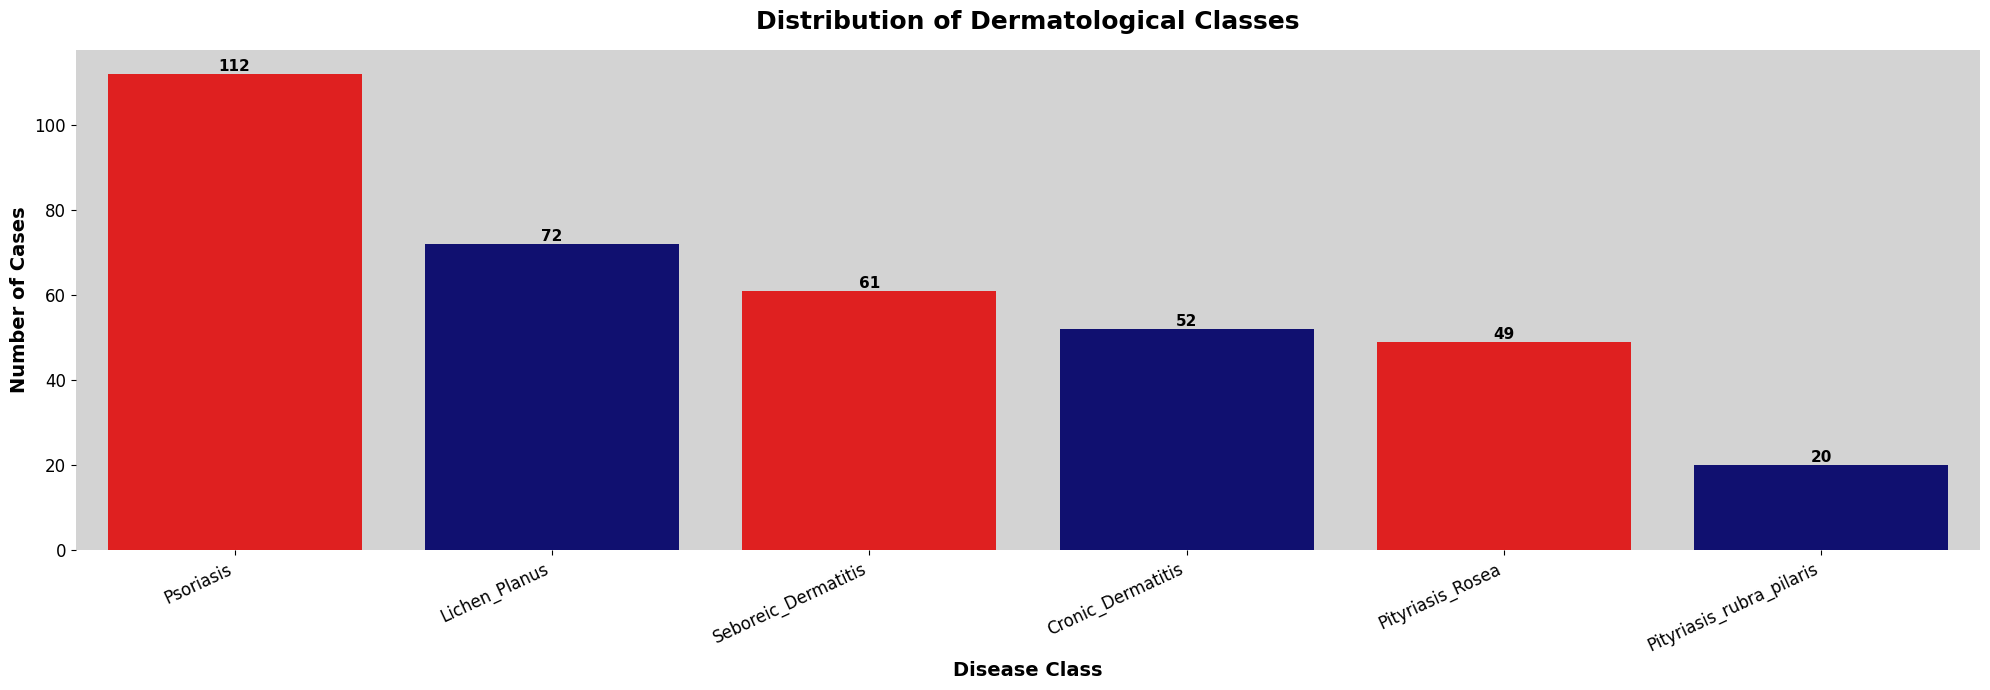

In [20]:
# ===== Run code =====
class_counts = df_class['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']
plt.figure(figsize=(20,7))
ax = sns.barplot(
    data=class_counts,
    x="class",
    y="count",
    palette=sns.color_palette(["red", "navy"]),
)
ax.set_facecolor("lightgray")

plt.title("Distribution of Dermatological Classes", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Disease Class", fontsize=14, fontweight="bold")
plt.ylabel("Number of Cases", fontsize=14, fontweight="bold")
plt.xticks(rotation=25, ha="right", fontsize=12, fontweight="medium")
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11, fontweight="bold", color="black"
    )

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### **Observations:**

**1. Why did you pick the specific chart?**

* A countplot (bar chart) is the most intuitive way to represent the distribution of categorical variables like dermatological classes.

* It quickly shows how many samples belong to each disease category.

* The red & navy contrast plus annotations make it easy to compare values at a glance.

**2. What is/are the insight(s) found from the chart?**


* Psoriasis has the highest number of cases (112) in the dataset.

* Lichen Planus (72) and Seboreic Dermatitis (61) are also relatively frequent.

* Pityriasis Rubra Pilaris has the lowest cases (20), making it underrepresented.

* The dataset is imbalanced across classes, with Psoriasis dominating and some diseases under-sampled.

**3. Will the gained insights help creating a positive business impact?**

* Yes Here’s how;

* Clinical Decision Support: Identifying that Psoriasis is most frequent means a diagnostic AI tool can be optimized for common diseases first while still ensuring coverage for rare cases.

### **3.1.5. PiePlot For Class(Target) Feature**

### **Chart-5. Pie Chart Distribution of Class Feature**

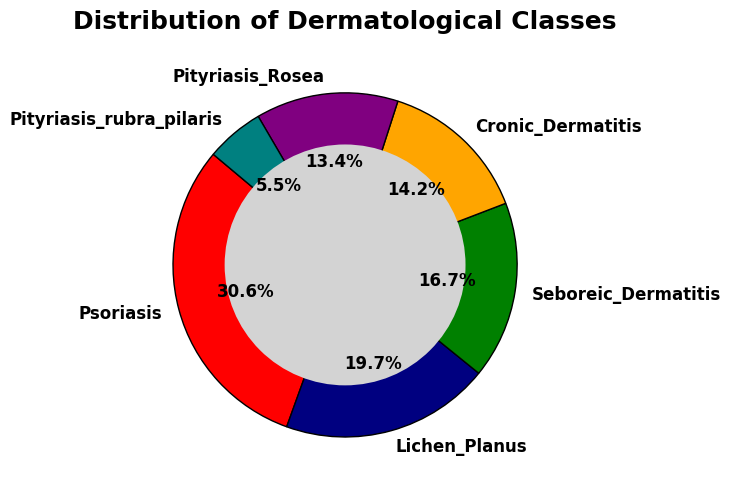

In [21]:
# ===== Run code =====
class_counts = df_class['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']
colors = ["red", "navy", "green", "orange", "purple", "teal"]

plt.figure(figsize=(20,5))
wedges, texts, autotexts = plt.pie(
    class_counts['count'],
    labels=class_counts['class'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'weight': 'bold'}
)
centre_circle = plt.Circle((0,0), 0.70, fc='lightgray')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Distribution of Dermatological Classes", fontsize=18, fontweight="bold", pad=15)
plt.tight_layout()
plt.show()

> Since the smallest class (5.5%) is nearly 6 times smaller than the largest class (30.6%), this is a class imbalance problem.

### **3.1.6. Distribution For Age Feature**

### **Chart-6. Visualize the distribution of Age feature**

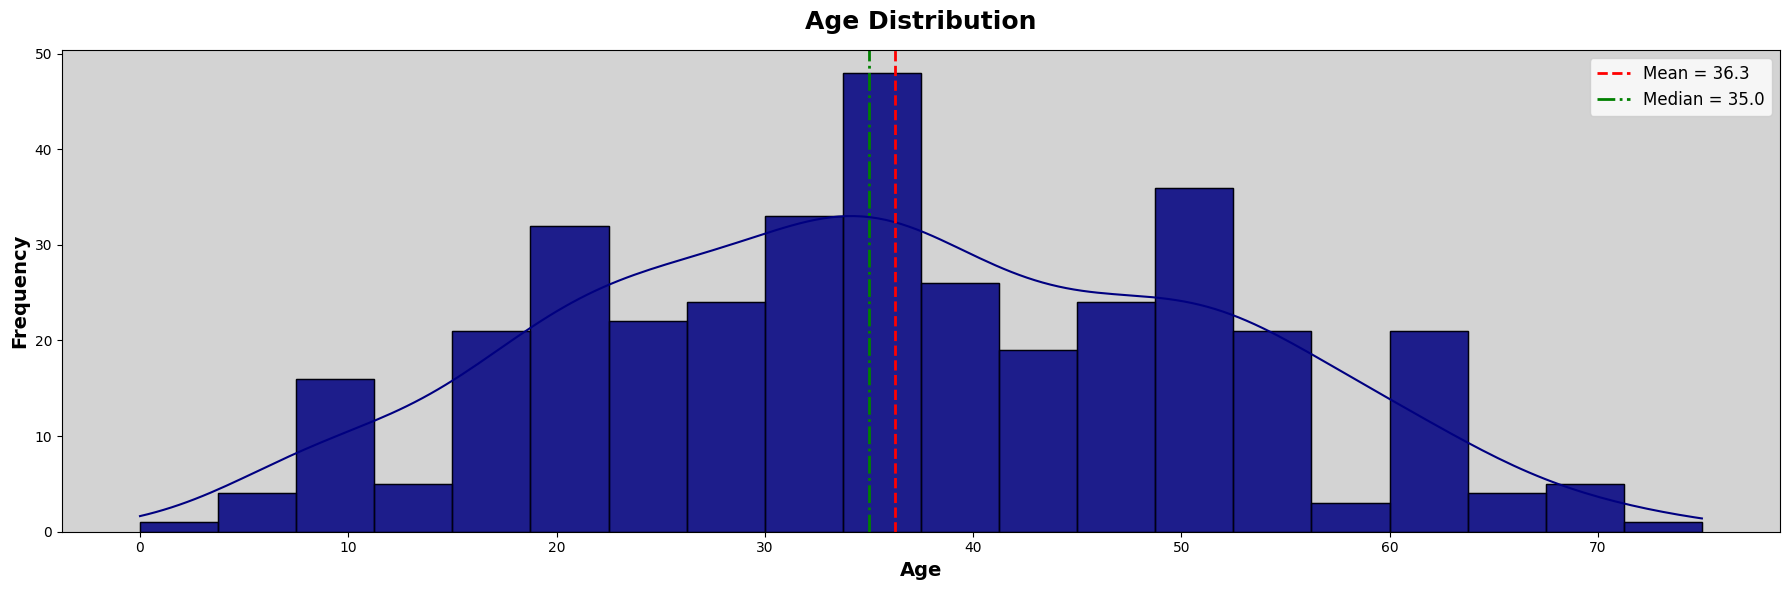

In [22]:
# ===== Run code =====
plt.figure(figsize=(18,6))
ax = sns.histplot(
    df['Age'],
    bins=20,
    kde=True,
    color="navy",
    edgecolor="black",
    alpha=0.8
)
plt.hist(df['Age'], bins=20, color="navy", alpha=0.3, edgecolor="black")

# ===== Background =====
ax.set_facecolor("lightgray")

# ===== Mean & Median lines =====
mean_age = df['Age'].mean()
median_age = df['Age'].median()
plt.axvline(mean_age, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_age:.1f}")
plt.axvline(median_age, color="green", linestyle="-.", linewidth=2, label=f"Median = {median_age:.1f}")

plt.title("Age Distribution", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Age", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.legend(fontsize=12, frameon=True, facecolor="white")
plt.tight_layout()
plt.show()

### **Observations:**

* The dataset is balanced across most age groups, but 30–40 years has the largest concentration of cases.

* Since the mean and median are close, there’s no strong skewness, meaning the dataset is representative and not biased toward very young or very old patients.

## **3.2. Bivariate Analysis: Examining Relationships Between Variable Pairs**

### **3.2.1. Regression plot of Age feature vs Target Variable**

### **Chart-7. Regression plot of Age feature vs Target Variable**

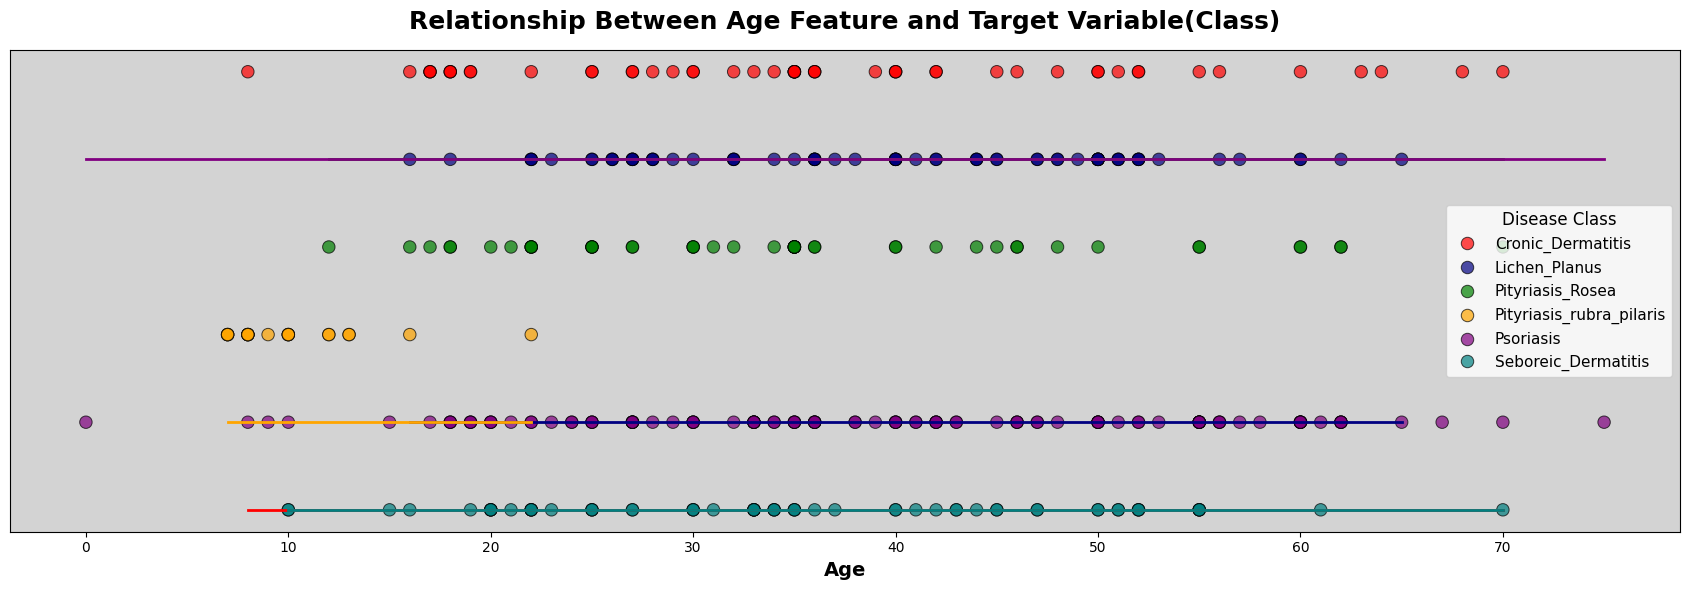

In [23]:
# ===== Regression plot of Age feature vs Target Variable =====
df_class['class'] = df_class['class'].astype('category')
class_mapping = dict(zip(df_class['class'].cat.categories, df_class['class'].cat.codes))

colors = ["red", "navy", "green", "orange", "purple", "teal"]
palette = sns.color_palette(colors, n_colors=df_class['class'].nunique())
class_colors = dict(zip(df_class['class'].cat.categories, palette))

# ===== Create figure =====
plt.figure(figsize=(17,6))

# ===== Scatterplot colored by class =====
ax = sns.scatterplot(
    data=df_class,
    x="Age",
    y="class",
    hue="class",
    palette=class_colors,
    s=80,
    alpha=0.7,
    edgecolor="black"
)

for cls, color in class_colors.items():
    subset = df_class[df_class['class'] == cls]
    sns.regplot(
        data=subset,
        x="Age",
        y=subset['class'].map(class_mapping),
        scatter=False,
        line_kws={"linewidth":2, "color":color}
    )

ax.set_ylabel("")
ax.set_yticks([])
ax.set_facecolor("lightgray")
plt.title("Relationship Between Age Feature and Target Variable(Class)", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Age", fontsize=14, fontweight="bold")
plt.legend(title="Disease Class", fontsize=11, title_fontsize=12, frameon=True, facecolor="white")
plt.tight_layout()
plt.show()

> Some diseases (like Pityriasis Rubra Pilaris and Pityriasis Rosea) seem to affect younger groups, while others (like Chronic Dermatitis, Lichen Planus, and Psoriasis) are spread more broadly across age groups.

### **3.2.2. All Features vs Target Variable**

### **Chart-8. All Features vs Target Variable**

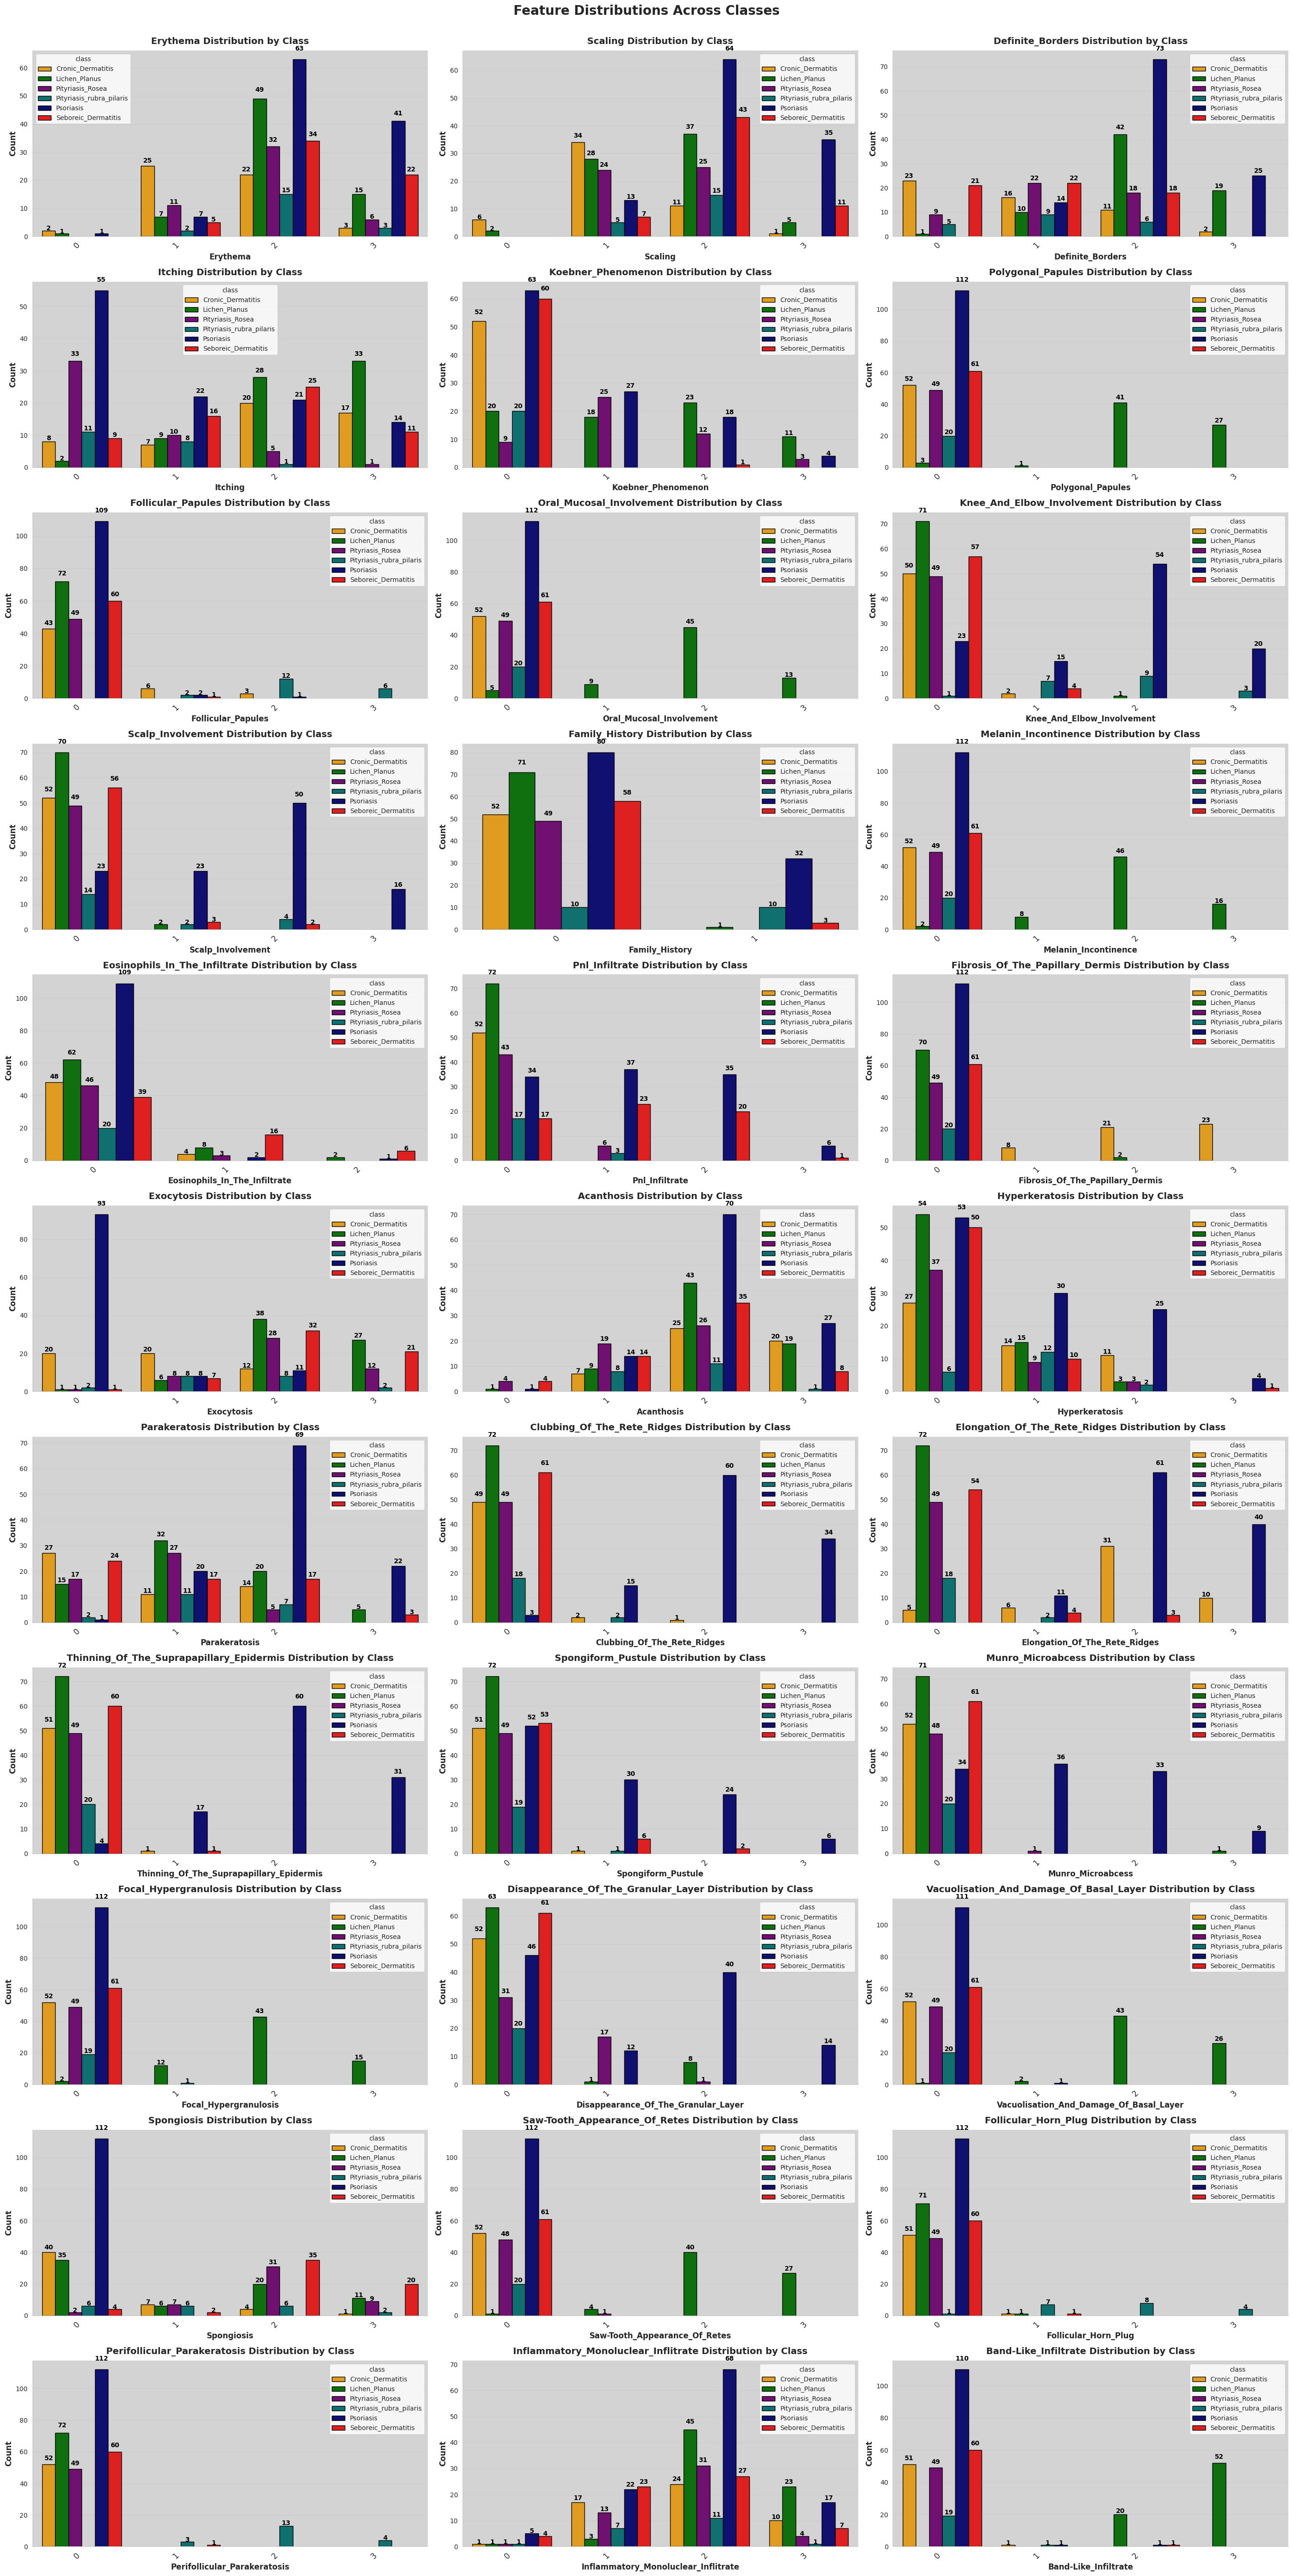

In [24]:
# ===== All Features vs Target Variable =====
# ===== Drop 'Age' from df_class =====
numeric = df_class.drop(columns=['Age'], errors='ignore')
sns.set_style("whitegrid")

# ===== Custom class colors =====
colors = ["red", "navy", "green", "orange", "purple", "teal"]
unique_classes = numeric['class'].unique()
class_palette = dict(zip(unique_classes, colors[:len(unique_classes)]))

# ===== Figure layout =====
n_cols = 3
n_rows = int(np.ceil((numeric.shape[1] - 1) / n_cols))
plt.figure(figsize=(28, n_rows * 5))
plotnumber = 1

for column in numeric.columns:

    if column == 'class':
        continue

    ax = plt.subplot(n_rows, n_cols, plotnumber)

    ax.set_facecolor("lightgray")

    # ===== Countplot with custom colors =====
    sns.countplot(x=column, data=numeric, hue='class', palette=class_palette, edgecolor='black', ax=ax)

    # ===== Add counts on top of bars =====
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width()/2.,
                    height + 0.05*height,
                    '{:1.0f}'.format(height),
                    ha="center", fontsize=10, color='black', fontweight='bold')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    ax.set_xlabel(column.title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_title(f'{column.title()} Distribution by Class', fontsize=14, fontweight='bold', pad=10)
    sns.despine(ax=ax)
    plotnumber += 1

plt.tight_layout()
plt.suptitle('Feature Distributions Across Classes', fontsize=20, fontweight='bold', y=1.01)
plt.show()

### **Observations:**

* Skin diseases can occur even if there is no family history.

* One type of skin problem shows signs like strange bumps, mouth involvement, pigment changes, and harm to a specific layer.

* Another type, class 1 disease, affects the scalp, causing changes like ridge clubbing, tiny abscesses, skin thining, and pimplr-like blisters.

* Good skin health is indicated by the absence of redness, scaling, thickness of the skin, and inflammation.

### **3.2.3. Age Feature vs Target Variable**

### **Chart-9. Age Feature vs Target Variable**

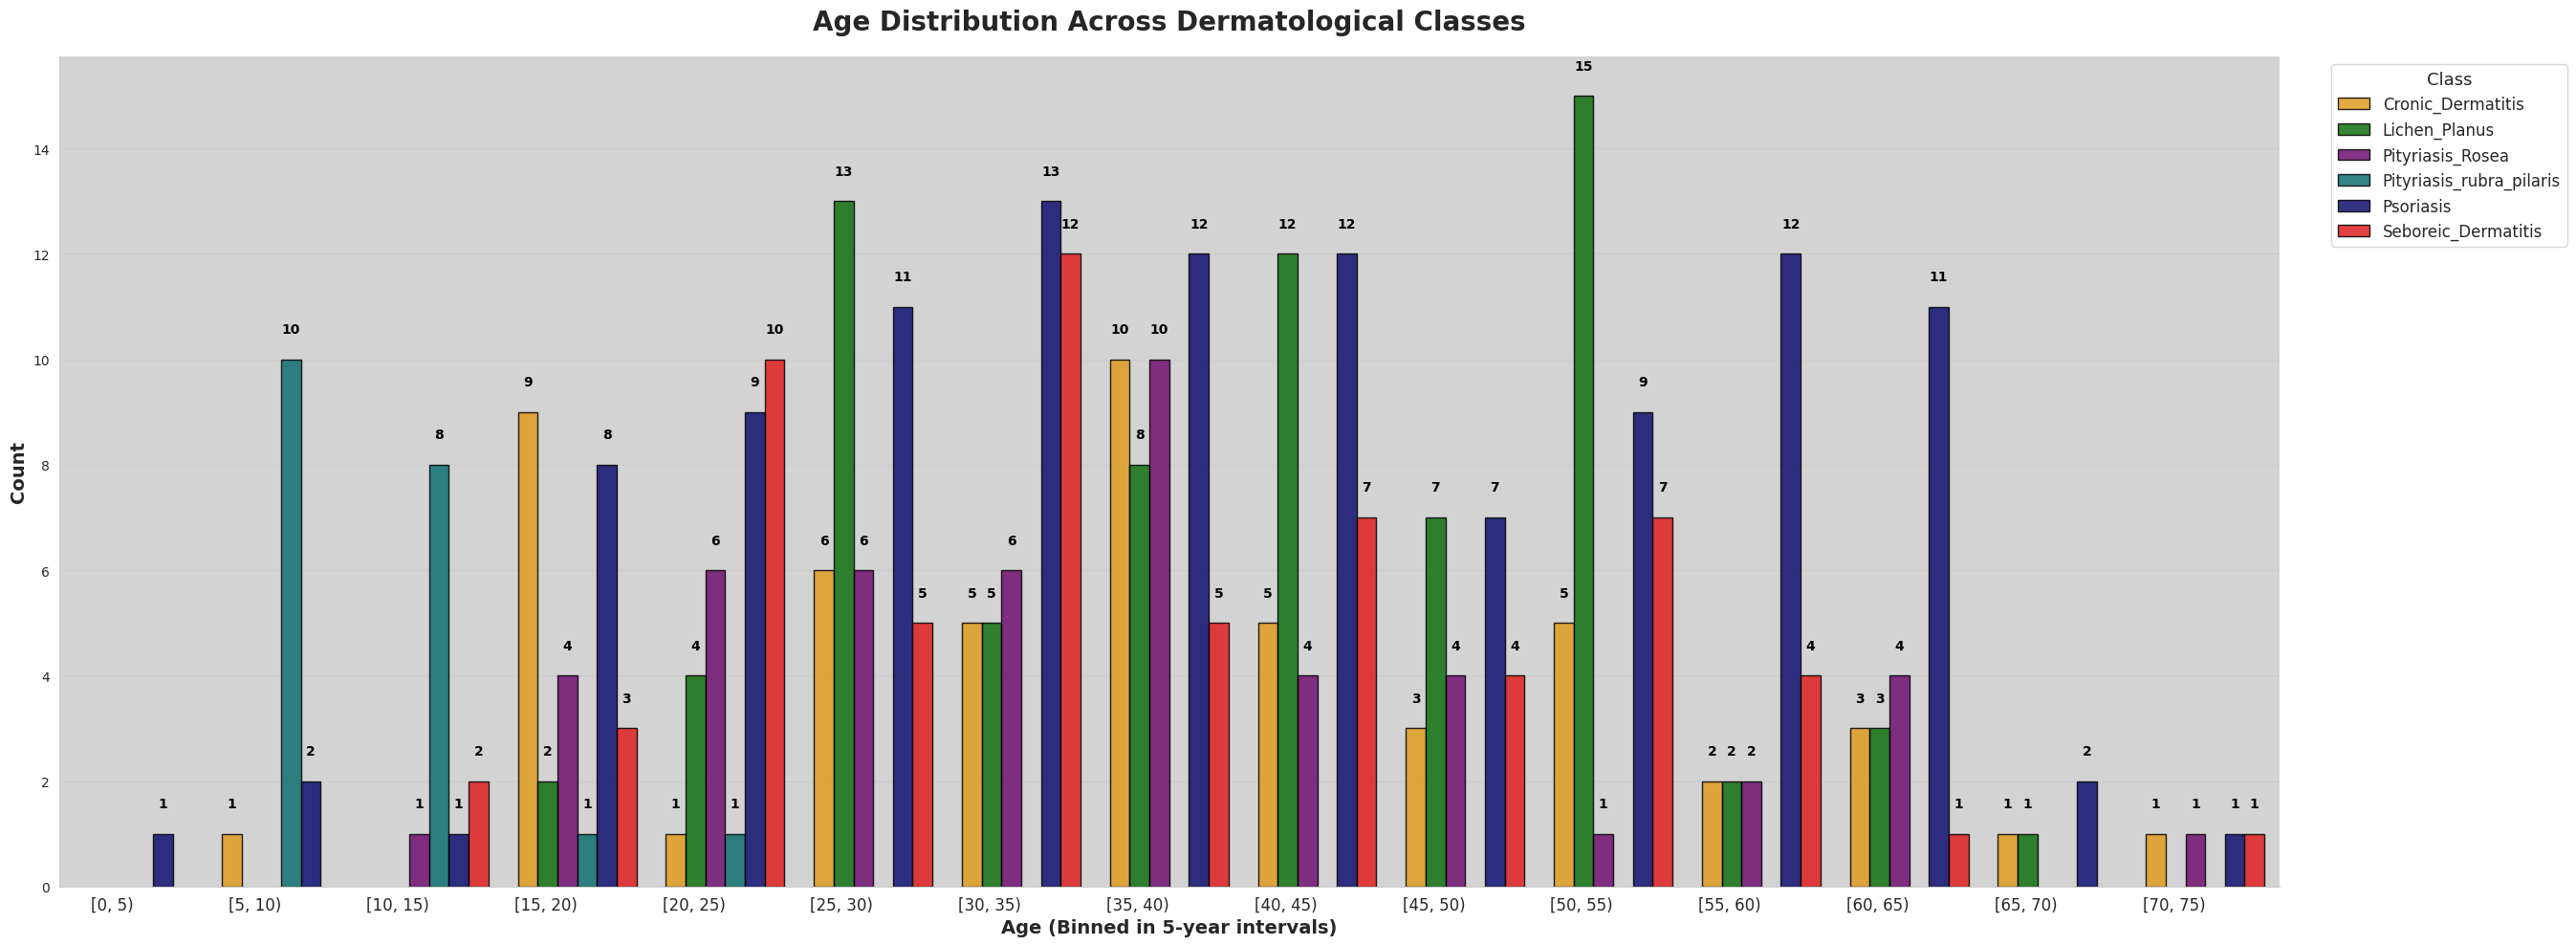

In [25]:
# ===== Age Feature vs Target Variable =====
if 'Age' in df_class.columns:
    sns.set_style("whitegrid")

    # ===== Custom class colors =====
    colors = ["red", "navy", "green", "orange", "purple", "teal"]
    unique_classes = df_class['class'].unique()
    class_palette = dict(zip(unique_classes, colors[:len(unique_classes)]))

    # ===== Bin Age into intervals =====
    bins = np.arange(df_class['Age'].min(), df_class['Age'].max() + 5, 5)
    df_class['Age_bin'] = pd.cut(df_class['Age'], bins=bins, right=False)

    # ===== Create figure =====
    plt.figure(figsize=(27, 10))
    ax = sns.countplot(
        x='Age_bin',
        data=df_class,
        hue='class',
        palette=class_palette,
        edgecolor='black',
        alpha=0.85
    )

    ax.set_facecolor("lightgray")
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width()/2.,
                height + 0.5,
                '{:1.0f}'.format(height),
                ha="center",
                fontsize=10,
                color='black',
                fontweight='bold'
            )

    ax.set_xlabel('Age (Binned in 5-year intervals)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Count', fontsize=14, fontweight='bold')
    ax.set_title('Age Distribution Across Dermatological Classes', fontsize=20, fontweight='bold', pad=20)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=12)
    ax.legend(title='Class', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12, title_fontsize=13, frameon=True, facecolor='white')
    sns.despine(ax=ax)
    plt.tight_layout()
    plt.show()

### **Observations:**

**Childhood & Early Teens (0–15 years):**

* Seboreic Dermatitis (teal) is the most common condition in this age group, peaking at ages 5–15.

* Other diseases are relatively rare before age 15.

**Young Adults (15–30 years):**

* Pityriasis Rubra Pilaris (orange) shows higher occurrence, especially between 15–25.

* Lichen Planus (green) starts appearing significantly in the 25–30 age range.

* Psoriasis (purple) and Cronic Dermatitis (yellow) also emerge gradually.

**Adults (30–50 years):**

* This is the most affected age group overall.

* Psoriasis and Lichen Planus have the highest frequency, particularly between 30–45 years.

* Pityriasis Rosea (blue) also shows strong presence around 25–40 years.

**Middle Age (50–65 years):**

* Lichen Planus peaks sharply at 50–55 years (highest count = 15).

* Psoriasis continues to be prevalent, especially around 55–65.

**Elderly (65+ years):**

* All conditions show very low frequency.

* Only sporadic cases of Psoriasis, Lichen Planus, and Cronic Dermatitis appear.

**Overall Insight:**

* Different skin diseases tend to dominate different life stages. Seboreic Dermatitis is common in children, Pityriasis Rubra Pilaris in young adults, while Psoriasis and Lichen Planus dominate in middle-aged adults. Elderly cases are rare across all classes.

## **3.3. Multivariate Analysis: Examines multiple variables simultaneously**

### **3.3.1. Correlation Heatmap: Highlights correlations between numerical features**

### **Chart-10. Correlation Heatmap**

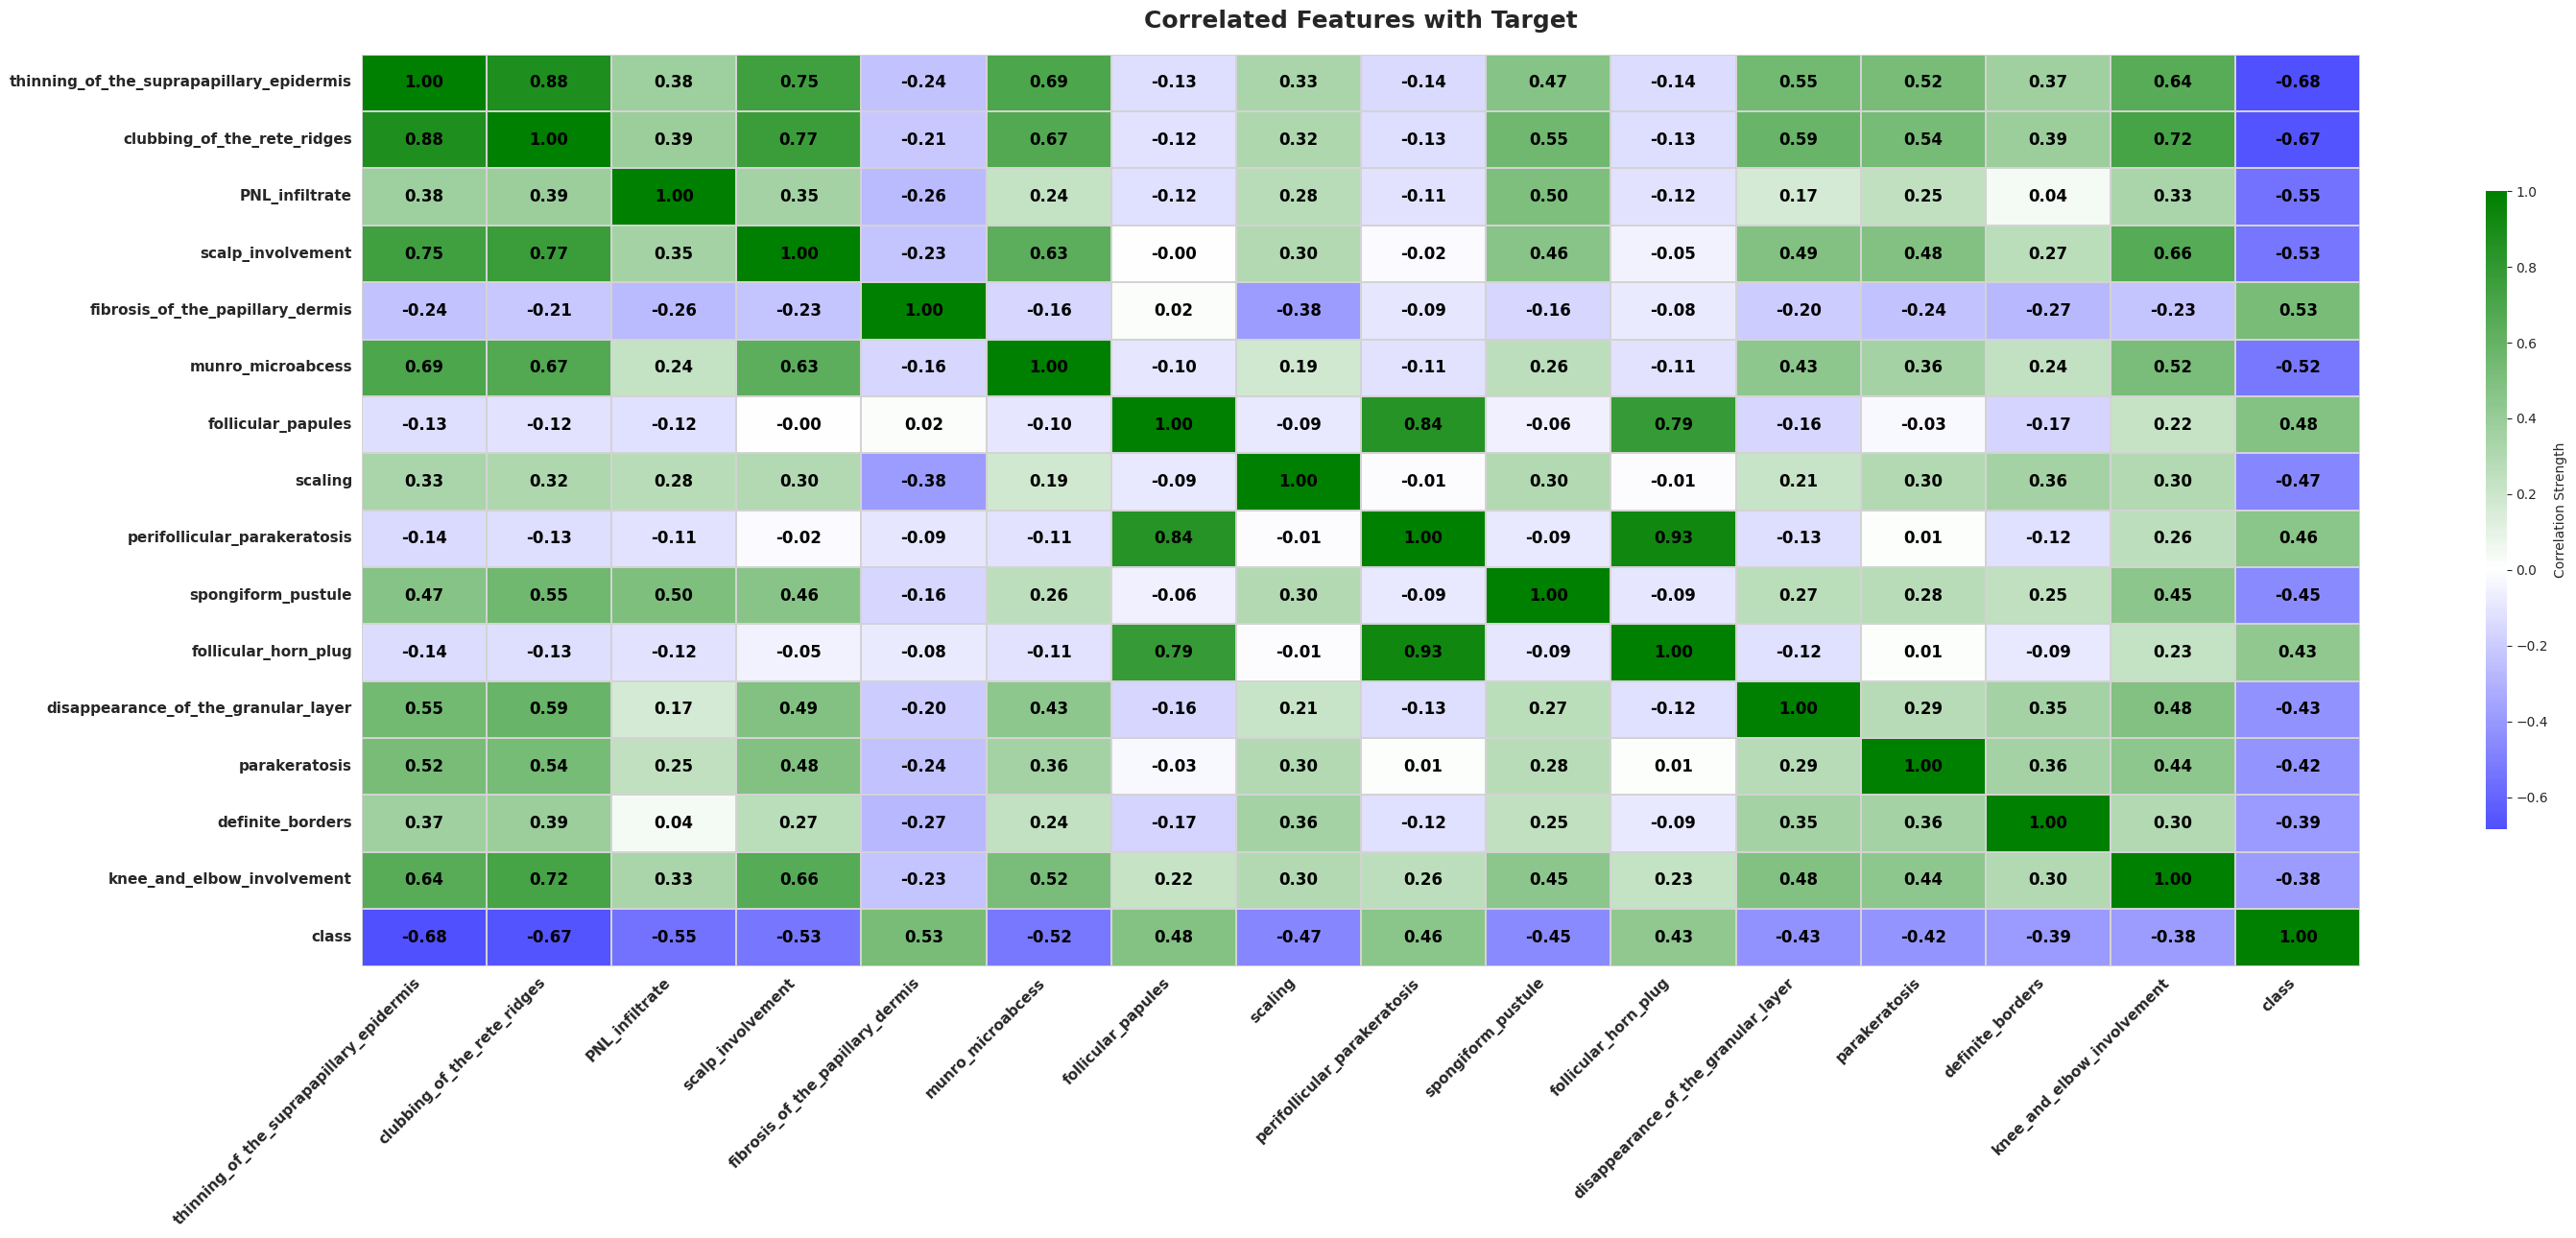

In [26]:
# ===== Correlation Heatmap visualization code =====
numeric_df = df.select_dtypes(include=['number']).copy()

target_col = 'class'
if df[target_col].dtype.name == 'category':
    numeric_df[target_col] = df[target_col].cat.codes

corr_with_target = numeric_df.corr()[target_col].drop(target_col)
top_features = corr_with_target.abs().sort_values(ascending=False).head(15)
top_feature_list = top_features.index.tolist()
corr_top = numeric_df[top_feature_list + [target_col]].corr()

plt.figure(figsize=(30, 13))
custom_cmap = sns.color_palette("blend:blue,white,green", as_cmap=True)
sns.heatmap(
    corr_top,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    center=0,
    linewidths=1.2,
    linecolor="lightgrey",
    annot_kws={"size":12, "weight":"bold", "color":"black"},
    cbar_kws={"shrink":0.7, "aspect":30, "label":"Correlation Strength"}
)
plt.title("Correlated Features with Target", fontsize=18, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=11, weight="bold")
plt.yticks(rotation=0, fontsize=11, weight="bold")
plt.tight_layout()
plt.show()

**Strong Positive Correlations:**

| Feature 1                                    | Feature 2                       | Correlation (r) |
| -------------------------------------------- | ------------------------------- | --------------- |
| thinning\_of\_the\_suprapapillary\_epidermis | clubbing\_of\_the\_rete\_ridges | 0.88            |
| follicular\_papules                          | follicular\_horn\_plug          | 0.79            |
| perifollicular\_parakeratosis                | follicular\_horn\_plug          | 0.93            |
| perifollicular\_parakeratosis                | follicular\_papules             | 0.84            |
| knee\_and\_elbow\_involvement                | clubbing\_of\_the\_rete\_ridges | 0.72            |


**Strong Negative Correlations:**

| Feature 1                                    | Feature 2 | Correlation (r) |
| -------------------------------------------- | --------- | --------------- |
| thinning\_of\_the\_suprapapillary\_epidermis | class     | -0.68           |
| clubbing\_of\_the\_rete\_ridges              | class     | -0.67           |
| PNL\_infiltrate                              | class     | -0.55           |
| scalp\_involvement                           | class     | -0.53           |
| munro\_microabscess                          | class     | -0.52           |


**Weak Positive Correlations:**

| Feature 1                                    | Feature 2                               | Correlation (r) |
| -------------------------------------------- | --------------------------------------- | --------------- |
| thinning\_of\_the\_suprapapillary\_epidermis | scalp\_involvement                      | 0.75            |
| thinning\_of\_the\_suprapapillary\_epidermis | munro\_microabscess                     | 0.69            |
| thinning\_of\_the\_suprapapillary\_epidermis | disappearance\_of\_the\_granular\_layer | 0.55            |
| thinning\_of\_the\_suprapapillary\_epidermis | parakeratosis                           | 0.52            |
| thinning\_of\_the\_suprapapillary\_epidermis | knee\_and\_elbow\_involvement           | 0.64            |
| clubbing\_of\_the\_rete\_ridges              | scalp\_involvement                      | 0.77            |
| clubbing\_of\_the\_rete\_ridges              | munro\_microabscess                     | 0.67            |
| clubbing\_of\_the\_rete\_ridges              | disappearance\_of\_the\_granular\_layer | 0.59            |
| clubbing\_of\_the\_rete\_ridges              | parakeratosis                           | 0.54            |
| clubbing\_of\_the\_rete\_ridges              | knee\_and\_elbow\_involvement           | 0.72            |
| scaling                                      | definite\_borders                       | 0.36            |
| spongiform\_pustule                          | follicular\_papules                     | 0.50            |
| spongiform\_pustule                          | scalp\_involvement                      | 0.46            |
| knee\_and\_elbow\_involvement                | scalp\_involvement                      | 0.66            |


**Weak Negative Correlations:**

| Feature 1                               | Feature 2 | Correlation (r)                                 |
| --------------------------------------- | --------- | ----------------------------------------------- |
| fibrosis\_of\_the\_papillary\_dermis    | scaling   | -0.38                                           |
scaling                                 | class     | -0.47                                           |
| perifollicular\_parakeratosis           | class     | -0.42                                           |
| spongiform\_pustule                     | class     | -0.45                                           |
| disappearance\_of\_the\_granular\_layer | class     | -0.43                                           |
| parakeratosis                           | class     | -0.42                                           |
| definite\_borders                       | class     | -0.39                                           |
| knee\_and\_elbow\_involvement           | class     | -0.38                                           |


## **3.4. Hypothesis Testing**

### Based on the chart experiments, define three hypothetical statements about the dataset. In the next three answers, perform hypothesis testing to obtain a final conclusion about the statements through your code and statistical testing.

### **3.4.1. Hypothetical Statement - 1**

### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

**Hypotheses:**

* Null Hypothesis (H0): There is no association between erythema levels and skin disorder class (they are independent).

* Alternative Hypothesis (H1): There is a significant association between erythema levels and skin disorder class (they are dependent).

### **2. Perform an appropriate statistical test**

In [27]:
# ===== Create contingency table =====
contingency_erythema = pd.crosstab(df_class['erythema'], df_class['class'])

chi2, p, dof, expected = chi2_contingency(contingency_erythema)
print("Chi-Square Test: Erythema vs Class")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# ===== Interpretation =====
if p < 0.05:
    print("\nResult: Reject H0 → Erythema significantly affects Skin Disorder Class.")
else:
    print("\nResult: Fail to reject H0 → No significant effect of Erythema on Skin Disorder Class.")

Chi-Square Test: Erythema vs Class
Chi2 Statistic: 78.71170847325529
Degrees of Freedom: 15
p-value: 1.200485187555973e-10

Result: Reject H0 → Erythema significantly affects Skin Disorder Class.


**Why Chi-square test?**

* Both variables are categorical/ordinal.

* You want to test association → It checks whether a feature is independent of the target class (skin disorder type) or if there’s a significant relationship.

### **3. Business Insight:**

* Patients with higher erythema levels are much more likely to belong to specific skin disorder classes (e.g., psoriasis).

* Dermatologists should pay close attention to erythema severity, as it can guide early differentiation between similar disorders.

### **3.4.2. Hypothetical Statement - 2**

### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

**Hypotheses:**

* Null Hypothesis (H0): Scaling is independent of skin disorder class.

* Alternative Hypothesis (H1): Scaling is associated with skin disorder class.

### **2. Perform an appropriate statistical test**

In [28]:
# ===== Create contingency table =====
contingency_scaling = pd.crosstab(df_class['scaling'], df_class['class'])
chi2, p, dof, expected = chi2_contingency(contingency_scaling)

print("Chi-Square Test: Scaling vs Class")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# ===== Interpretation =====
if p < 0.05:
    print("\nResult: Reject H0 → Scaling significantly affects Skin Disorder Class.")
else:
    print("\nResult: Fail to reject H0 → No significant effect of Scaling on Skin Disorder Class.")

Chi-Square Test: Scaling vs Class
Chi2 Statistic: 132.09466055613035
Degrees of Freedom: 15
p-value: 8.263440529720813e-21

Result: Reject H0 → Scaling significantly affects Skin Disorder Class.


**Why Chi-square Test?**

* Both variables are categorical/ordinal – e.g., scaling (0–3 levels) and class (disease type).

* It tests independence/association – checks whether the feature (like scaling) is significantly related to the skin disorder class.

### **3. Business Insight:**

* The presence and intensity of scaling is strongly associated with certain disorders like psoriasis.

* Doctors can use scaling patterns as a clinical indicator to narrow down possible diagnoses before biopsy.

### **3.4.3. Hypothetical Statement - 3**

### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

**Hypotheses:**

* Null Hypothesis (H0): Family history is independent of skin disorder class.

* Alternative Hypothesis (H1): Family history is associated with skin disorder class.

### **2. Perform an appropriate statistical test**

In [29]:
# ===== Create contingency table =====
contingency_fh = pd.crosstab(df_class['family_history'], df_class['class'])
chi2, p, dof, expected = chi2_contingency(contingency_fh)

print("Chi-Square Test: Family History vs Class")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# ===== Interpretation =====
if p < 0.05:
    print("\nResult: Reject H0 → Family history significantly affects Skin Disorder Class.")
else:
    print("\nResult: Fail to reject H0 → No significant effect of Family history on Skin Disorder Class.")

Chi-Square Test: Family History vs Class
Chi2 Statistic: 77.5603988742236
Degrees of Freedom: 5
p-value: 2.716062051379337e-15

Result: Reject H0 → Family history significantly affects Skin Disorder Class.


**Why Chi-square Test?**

* Both variables are categorical/ordinal.

* It tests independence/association.

### **3. Business Insight:**

* Patients with a family history of skin disorders are more likely to develop certain classes of diseases.

* Preventive screening should prioritize individuals with a positive family history, as they represent a higher-risk group.

# **4. Data Pre-Processing**

## **4.1. Handling Missing Values / Null Values**

In [30]:
# ===== Finding a missing values =====
df.isnull().sum().to_frame("Missing_Values")

Missing_Values
erythema                                               0
scaling                                                0
definite_borders                                       0
itching                                                0
koebner_phenomenon                                     0
polygonal_papules                                      0
follicular_papules                                     0
oral_mucosal_involvement                               0
knee_and_elbow_involvement                             0
scalp_involvement                                      0
family_history                                         0
melanin_incontinence                                   0
eosinophils_in_the_infiltrate                          0
PNL_infiltrate                                         0
fibrosis_of_the_papillary_dermis                       0
exocytosis                                             0
acanthosis                                             0
hyperkeratosis                                         0
parakeratosis                                          0
clubbing_of_the_rete_ridges                            0
elongation_of_the_rete_ridges                          0
thinning_of_the_suprapapillary_epidermis               0
spongiform_pustule                                     0
munro_microabcess                                      0
focal_hypergranulosis                                  0
disappearance_of_the_granular_layer                    0
vacuolisation_and_damage_of_basal_layer                0
spongiosis                                             0
saw-tooth_appearance_of_retes                          0
follicular_horn_plug                                   0
perifollicular_parakeratosis                           0
inflammatory_monoluclear_inflitrate                    0
band-like_infiltrate                                   0
Age                                                    0
class                                                  0

The dataset has been checked for missing values, and no null or missing entries were found, indicating that the data is complete and clean for analysis.

## **4.2. Handling Outliers: Detection and Treatment Strategies**

### **4.2.1. Perform outlier detection:**

### **Chart-11. Plotting box plots for all numerical variable**

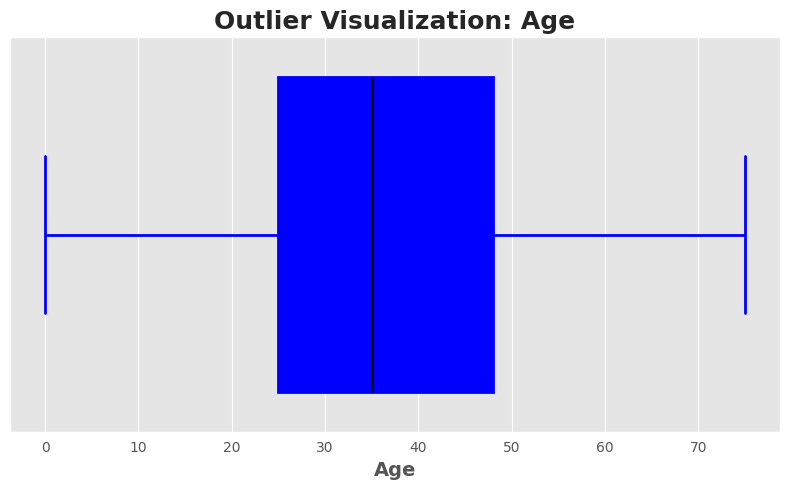

In [31]:
# ===== Plotting box plots for all numerical variable =====
age_df = df[['Age']]

# ===== Background style =====
plt.style.use('ggplot')

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=age_df,
    x='Age',
    boxprops=dict(color='blue', facecolor='lightblue', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='blue', linewidth=2),
    capprops=dict(color='blue', linewidth=2)
)

plt.title("Outlier Visualization: Age", fontsize=18, fontweight='bold')
plt.xlabel("Age", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### **4.2.2. Calculate the number of outliers and their percentage:**

In [32]:
# ===== Defining the function for outlier detection and percentage calculation using IQR =====

def detect_outliers(data):
    data = np.array(data)

    # ===== Quartiles =====
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)

    # ===== IQR & boundsa =====
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # ===== Outlier detection =====
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = round(outlier_count * 100 / len(data), 2)

    # ===== Display results =====
    print(f"Q1 = {q1}, Q2 (Median) = {q2:.2f}, Q3 = {q3}")
    print(f"IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Outliers Detected: {outlier_count}")
    print(f"Outlier Percentage: {outlier_percent}%\n")

In [33]:
# ===== Calculating IQR, Lower/Upper Bounds, and Outlier Counts for Continuous Numerical Features =====

outliers_age = detect_outliers(df['Age'])
print("Detected outliers in Age column:")
print(outliers_age)

Q1 = 25.0, Q2 (Median) = 35.00, Q3 = 48.0
IQR = 23.00
Lower Bound = -9.50, Upper Bound = 82.50
Outliers Detected: 0
Outlier Percentage: 0.0%

Detected outliers in Age column:
None


> No outliers were detected in the Age column


# **5. Feature Engineering**

## **5.1. Check if my target feature is imbalanced or not**

In [34]:
# ===== Check if my target feature is imbalanced =====
df['class'].value_counts(normalize=True) * 100

class
1    30.601093
3    19.672131
2    16.666667
5    14.207650
4    13.387978
6     5.464481
Name: proportion, dtype: float64

### **Chart-13. Target Variable Distribution (Class)**

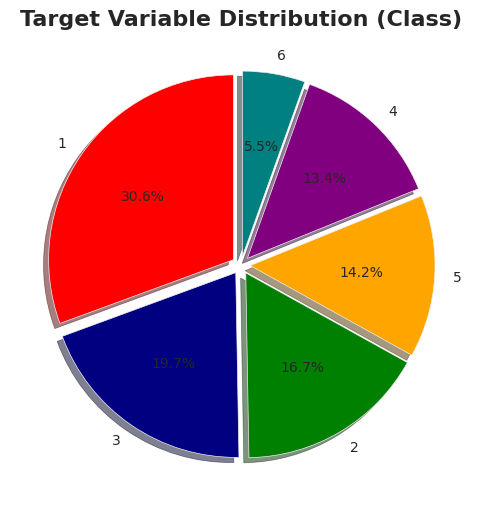

In [35]:
# ===== Visualization code =====
counts = df['class'].value_counts()
labels = counts.index
colors = ["red", "navy", "green", "orange", "purple", "teal"]
explode = [0.05] * len(counts)

plt.figure(figsize=(8,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title("Target Variable Distribution (Class)", fontsize=16, fontweight='bold')
plt.show()

**From the pie chart:**

* Class 1 → 30.6%

* Class 2 → 16.7%

* Class 3 → 19.7%

* Class 4 → 13.4%

* Class 5 → 14.2%

* Class 6 → 5.5%

**Observations:**

* Class 1 has the highest representation (30.6%), while Class 6 is very underrepresented (5.5%).

* Ideally, in a balanced dataset, all classes should have roughly equal proportions (around ~16.7% if 6 classes).

**Here, there is a class imbalance:**

* Class 6 is severely underrepresented.

* Class 1 is overrepresented compared to others.

* The rest (Classes 2, 3, 4, 5) are moderately balanced but still not equal.

* Dataset is imbalanced because one class (Class 6) has very few samples, and one class (Class 1) dominates.

**Resampling Techniques:**

* Oversampling the minority class (SMOTE).

* Undersampling the majority class to balance proportions.

## **5.2. Feature Selection**

### **5.2.1. Encoding Categorical and Numerical Variables**

> The variables in the dataset have already been encoded.Therefore, no additional encoding is required.We can proceed directly to analysis or modeling.

### **5.2.2. Correlation Heatmap of Features**

### **Chart-14. Correlation Heatmap of Features**

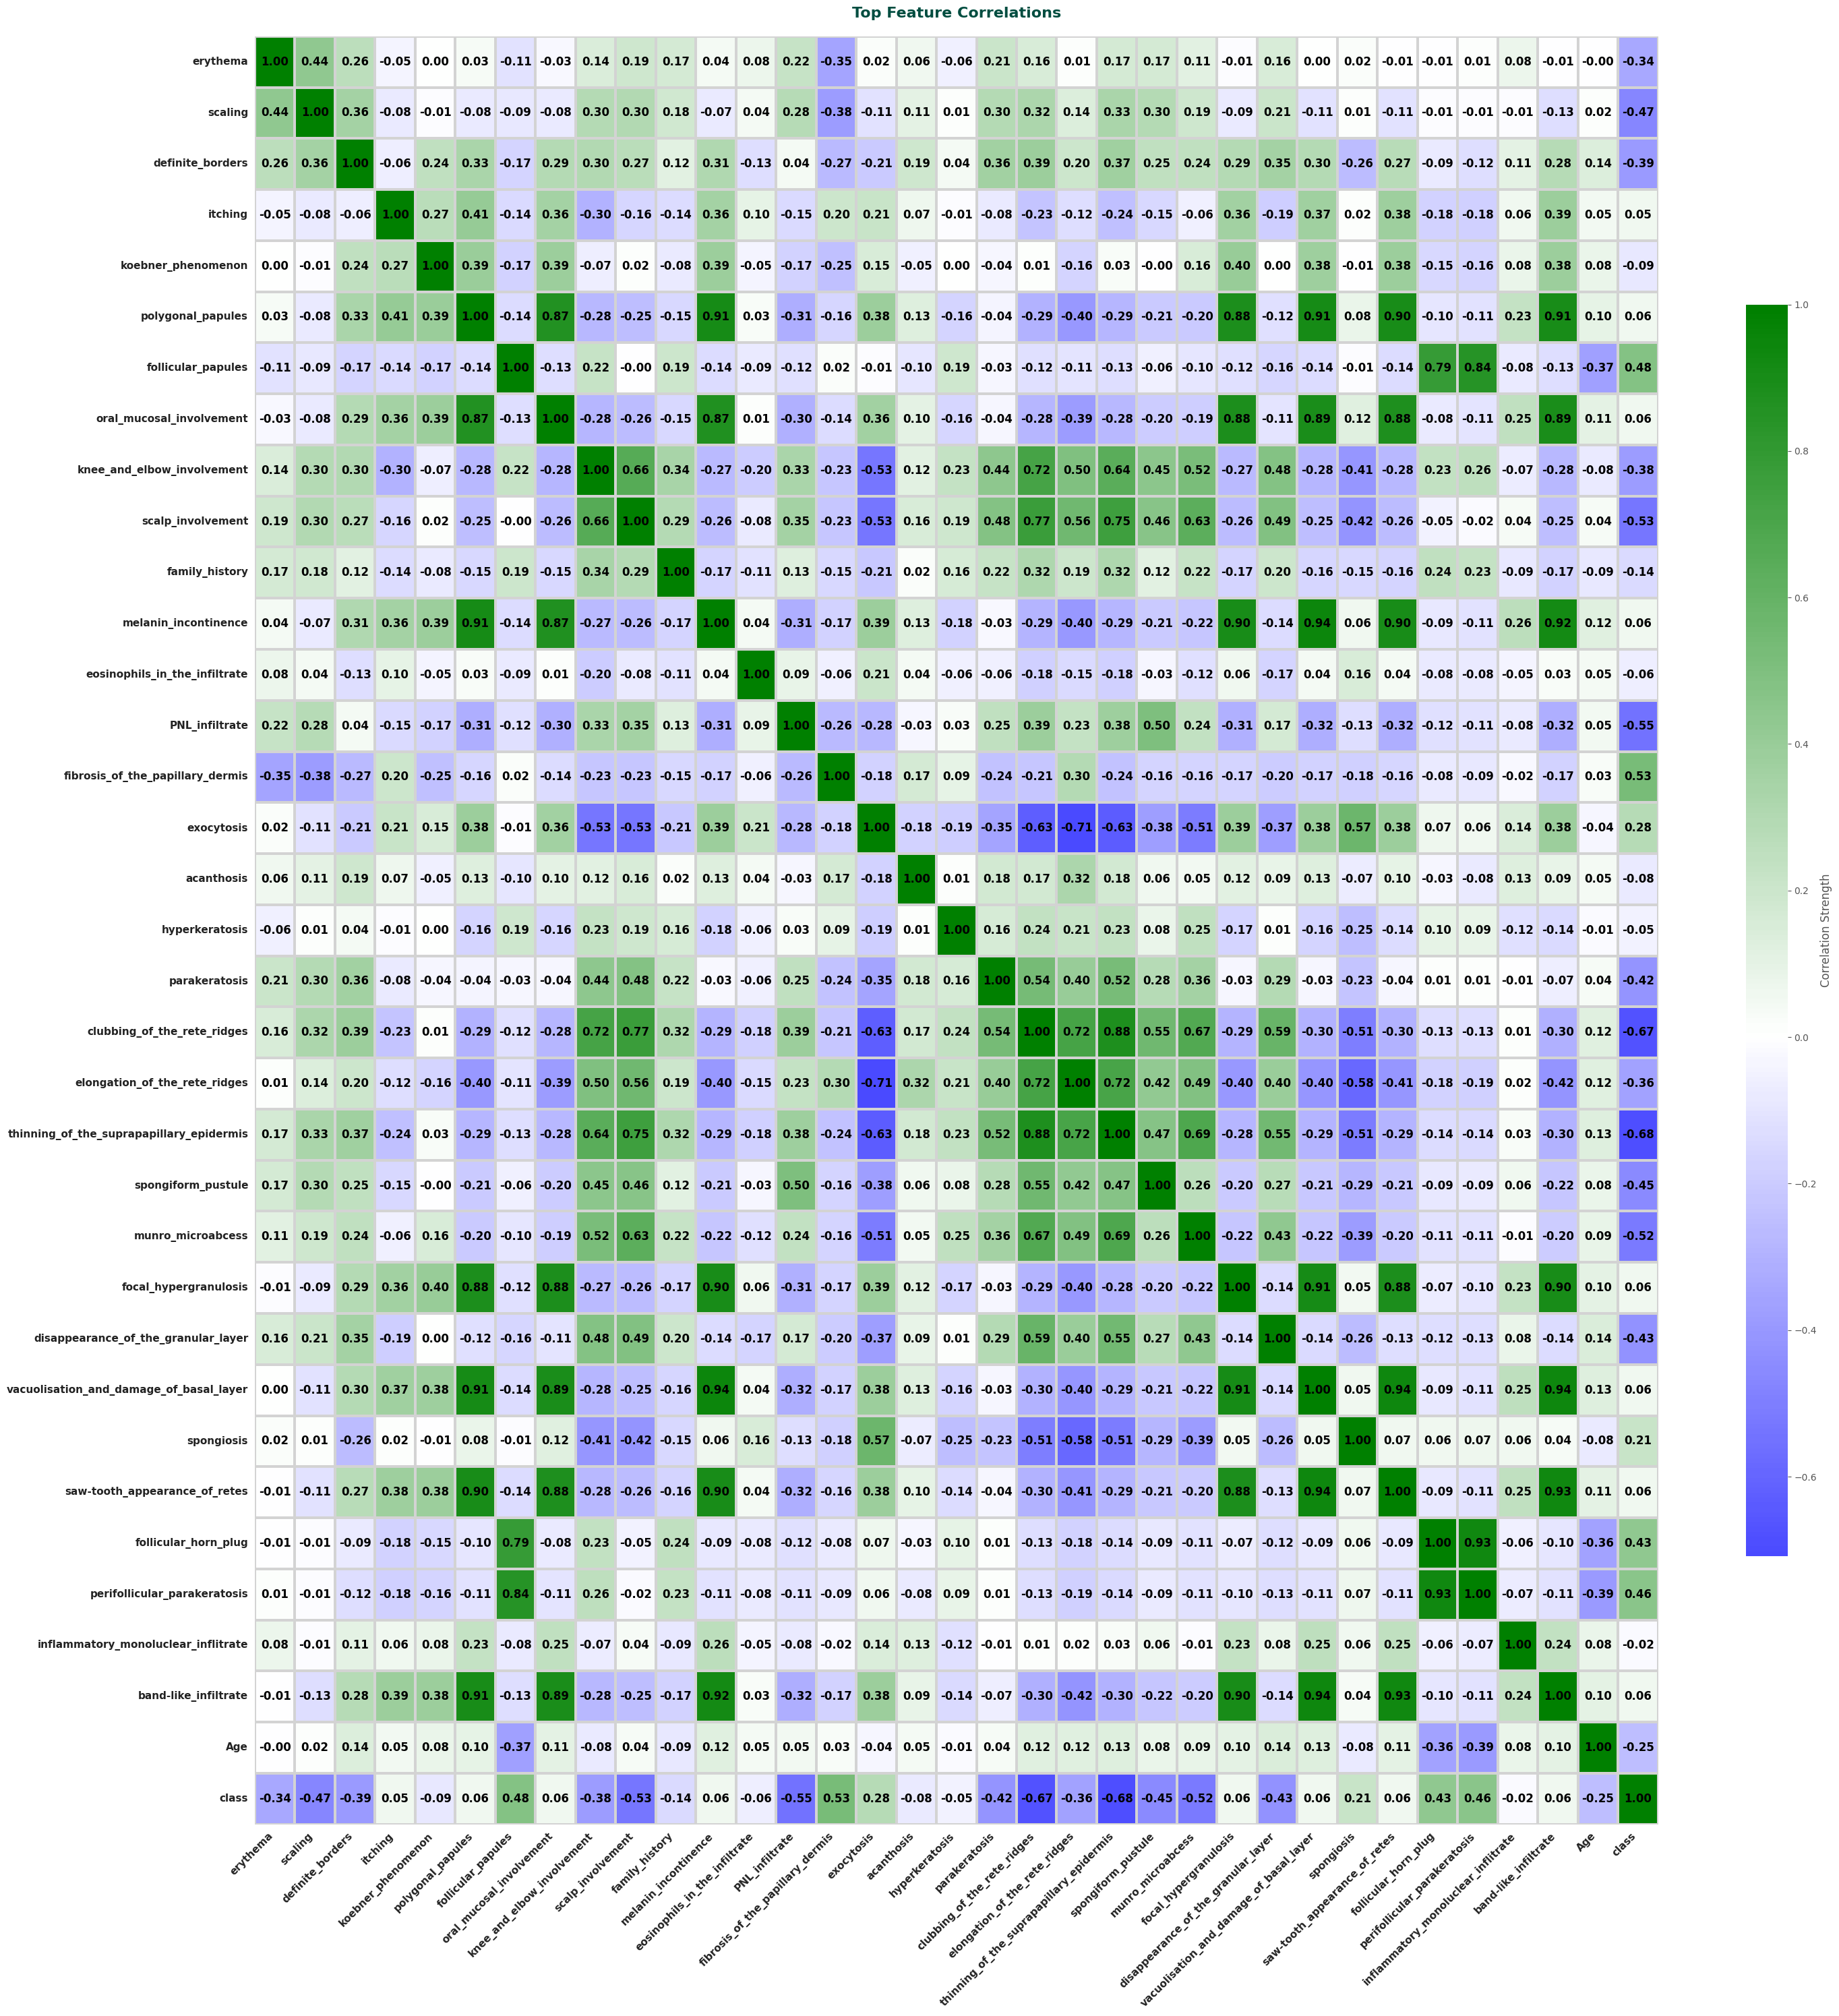

In [36]:
# ===== Select your features wisely to avoid overfitting =====
# ===== Correlation Heatmap visualization code =====

corr = df.corr(numeric_only=True)

custom_cmap = sns.color_palette("blend:blue,white,green", as_cmap=True)

plt.figure(figsize=(30,30))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    center=0,
    linewidths=1.5,
    linecolor="lightgrey",
    annot_kws={"size":12, "weight":"bold", "color":"black"},
    cbar_kws={"shrink":0.7, "aspect":30, "label":"Correlation Strength"}
)

plt.title("Top Feature Correlations",
          fontsize=16, fontweight="bold", color="#004d40", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=11, weight="bold", color="#222")
plt.yticks(rotation=0, fontsize=11, weight="bold", color="#222")
plt.grid(False)
plt.tight_layout()
plt.show()

### Insights from Heatmap


* follicular_papules , fibrosis_of_the_papillary_dermis , follicular_horn_plug , perifollicular_parakeratosis are most correlated with class(target variable)

* The Age attribute is more correlated with focal_hypergranulosis and least correlated with follicular_papules column.

* 20 columns are negetively correlated with target(class) column and 14 columns are positively correlated with target column.

* band-like_infiltrate , polygonal_papules , oral_mucosal_involvement , melanin_incontinence , focal_hypergranulosis , vacuolisation_and_damage_of_basal_layer , saw-tooth_appearance_of_retes are highly correlated with each other.


### **5.2.3. Variance Inflation Factor**

In [37]:
# ===== Defining a function for variance_inflation_factor =====

def calc_vif(df):
    """
    Calculates Variance Inflation Factor (VIF) for each numerical feature in the dataframe.

    Parameters:
        df (pd.DataFrame): Input dataframe with features

    Returns:
        pd.DataFrame: VIF values sorted in descending order
    """
    # ===== Select only numeric columns =====
    X = df.select_dtypes(include=[np.number])

    # ===== Add constant to the model for intercept =====
    X = add_constant(X)

    # ===== Compute VIF for each feature =====
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # ===== Drop the constant term and sort results =====
    vif_data = vif_data[vif_data["Feature"] != "const"]
    return vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

### **VIF (Variance Inflation Factor):**

Calculating VIF(Variance Inflation Factor) by excluding:

| **VIF Value** | **Interpretation**                           |
| ------------- | -------------------------------------------- |
| 1             | No multicollinearity                         |
| 1–5           | Moderate multicollinearity (generally okay)  |
| > 5           | High multicollinearity (needs investigation) |
| > 10          | Severe multicollinearity (consider removal)  |

"Class" -> As it is target variable

In [38]:
# ===== Run code =====
df_encoded_vif = df.drop("class", axis=1).copy()
vif_result = calc_vif(df_encoded_vif)
print(vif_result)

                                     Feature        VIF
0    vacuolisation_and_damage_of_basal_layer  17.234025
1                       band-like_infiltrate  13.527991
2                       melanin_incontinence  11.344378
3               perifollicular_parakeratosis  11.064677
4              saw-tooth_appearance_of_retes  10.664021
5                          polygonal_papules   8.516422
6                      focal_hypergranulosis   8.221431
7                clubbing_of_the_rete_ridges   7.982584
8                       follicular_horn_plug   7.918923
9                   oral_mucosal_involvement   7.046405
10  thinning_of_the_suprapapillary_epidermis   6.815498
11             elongation_of_the_rete_ridges   6.136761
12                        follicular_papules   4.109109
13          fibrosis_of_the_papillary_dermis   3.393069
14                knee_and_elbow_involvement   3.352390
15                         scalp_involvement   3.204027
16                                exocytosis   2

**1. Extremely high VIF (very strong multicollinearity)**

| Variable                                     | VIF       |
| -------------------------------------------- | --------- |
| vacuolisation\_and\_damage\_of\_basal\_layer | 17.234025 |
| band-like\_infiltrate                        | 13.527991 |
| melanin\_incontinence                        | 11.344378 |
| perifollicular\_parakeratosis                | 11.064677 |
| saw-tooth\_appearance\_of\_retes             | 10.664021 |


**2. High multicollinearity**

| Variable                                     | VIF      |
| -------------------------------------------- | -------- |
| polygonal\_papules                           | 8.516422 |
| focal\_hypergranulosis                       | 8.221431 |
| clubbing\_of\_the\_rete\_ridges              | 7.982584 |
| follicular\_horn\_plug                       | 7.918923 |
| oral\_mucosal\_involvement                   | 7.046405 |
| thinning\_of\_the\_suprapapillary\_epidermis | 6.815498 |
| elongation\_of\_the\_rete\_ridges            | 6.136761 |

**3. Moderate multicollinearity**

| Variable                             | VIF      |
| ------------------------------------ | -------- |
| follicular\_papules                  | 4.109109 |
| fibrosis\_of\_the\_papillary\_dermis | 3.393069 |
| knee\_and\_elbow\_involvement        | 3.352390 |
| scalp\_involvement                   | 3.204027 |

**4. Low VIF (safe to keep)**

| Variable                                | VIF      |
| --------------------------------------- | -------- |
| exocytosis                              | 2.904057 |
| munro\_microabcess                      | 2.526066 |
| spongiosis                              | 2.464172 |
| definite\_borders                       | 2.059011 |
| spongiform\_pustule                     | 1.934889 |
| PNL\_infiltrate                         | 1.830142 |
| disappearance\_of\_the\_granular\_layer | 1.825448 |
| parakeratosis                           | 1.768826 |
| scaling                                 | 1.711604 |
| itching                                 | 1.644960 |
| koebner\_phenomenon                     | 1.610212 |
| acanthosis                              | 1.492661 |
| erythema                                | 1.470500 |
| family\_history                         | 1.301650 |
| hyperkeratosis                          | 1.298062 |
| Age                                     | 1.253764 |
| inflammatory\_monoluclear\_inflitrate   | 1.250822 |
| eosinophils\_in\_the\_infiltrate        | 1.198826 |


Based on observational insights, the final model will use these 18 influential features, excluding the target variable 'Class'

| S.No | Feature Name                            | Reason for Choosing                                                                                |
| ---- | --------------------------------------- | -------------------------------------------------------------------------------------------------- |
| 1    | exocytosis                              | Indicates migration of inflammatory cells into the epidermis, a key histopathological marker.      |
| 2    | munro\_microabcess                      | Represents neutrophilic infiltration in the epidermis, characteristic of many skin disorders.      |
| 3    | spongiosis                              | Shows intercellular edema in the epidermis, important for diagnosing inflammatory skin conditions. |
| 4    | definite\_borders                       | Clinical feature that helps differentiate types of lesions in skin disorders.                      |
| 5    | spongiform\_pustule                     | Presence of pustules is a distinctive marker of certain skin conditions.                           |
| 6    | PNL\_infiltrate                         | Reflects polymorphonuclear leukocyte infiltration, important for immune response assessment.       |
| 7    | disappearance\_of\_the\_granular\_layer | Histopathological change often observed in chronic skin disorders.                                 |
| 8    | parakeratosis                           | Indicates abnormal keratinization, a key diagnostic feature in many skin diseases.                 |
| 9    | scaling                                 | Symptom reflecting epidermal turnover and skin dryness; clinically relevant.                       |
| 10   | itching                                 | Common patient-reported symptom that impacts disease severity assessment.                          |
| 11   | koebner\_phenomenon                     | Clinical phenomenon where lesions appear at sites of trauma, specific to certain disorders.        |
| 12   | acanthosis                              | Thickening of the epidermis, a histological marker of chronic skin changes.                        |
| 13   | erythema                                | Redness of the skin indicating inflammation; important clinical sign.                              |
| 14   | family\_history                         | Genetic predisposition can influence susceptibility to skin disorders.                             |
| 15   | hyperkeratosis                          | Thickening of the stratum corneum, a common histopathological feature.                             |
| 16   | Age                                     | Age can affect disease prevalence and presentation; useful demographic predictor.                  |
| 17   | inflammatory\_monoluclear\_inflitrate   | Indicates chronic inflammation and immune system involvement.                                      |
| 18   | eosinophils\_in\_the\_infiltrate        | Presence of eosinophils reflects immune response and disease activity in certain skin disorders.   |


### **5.2.4. Feature selection:**

In [39]:
# ===== Checking =====
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [40]:
# ===== Creating final dataframe considering above selected features =====
final_df= df[['exocytosis', 'munro_microabcess', 'spongiosis', 'definite_borders',
              'spongiform_pustule', 'PNL_infiltrate', 'disappearance_of_the_granular_layer',
              'parakeratosis', 'scaling', 'itching', 'koebner_phenomenon', 'acanthosis',
              'erythema', 'family_history', 'hyperkeratosis', 'Age',
              'inflammatory_monoluclear_inflitrate', 'eosinophils_in_the_infiltrate', 'class']]

**Clinical Features**

* definite_borders

* spongiform_pustule

* scaling

* itching

* koebner_phenomenon

* erythema

* family_history

* Age

**Histopathological Features**

* exocytosis

* munro_microabcess

* spongiosis

* PNL_infiltrate

* disappearance_of_the_granular_layer

* parakeratosis

* acanthosis

* hyperkeratosis

* inflammatory_monoluclear_inflitrate

* eosinophils_in_the_infiltrate

**Target Feature**

* Class

In [41]:
# ===== Check a final dataset =====

final_df.head().T

0  1   2   3   4
exocytosis                            3  1   1   0   1
munro_microabcess                     0  1   0   0   0
spongiosis                            3  0   3   0   2
definite_borders                      0  3   2   2   2
spongiform_pustule                    0  2   0   2   0
PNL_infiltrate                        0  1   0   3   0
disappearance_of_the_granular_layer   0  0   0   3   2
parakeratosis                         0  2   2   3   0
scaling                               2  3   1   2   3
itching                               3  2   3   0   2
koebner_phenomenon                    0  1   1   0   2
acanthosis                            2  2   2   2   2
erythema                              2  3   2   2   2
family_history                        0  1   0   0   0
hyperkeratosis                        0  0   0   0   0
Age                                  55  8  26  40  45
inflammatory_monoluclear_inflitrate   1  1   2   3   2
eosinophils_in_the_infiltrate         0  0   0   0   0
class                                 2  1   3   1   3

## **5.3. Data Transformation**

### **5.3.1. Identify which features require transformation**

In [42]:
# ===== checking which of the variables are continous in nature =====

for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature exocytosis is: 4
The number of unique counts in feature munro_microabcess is: 4
The number of unique counts in feature spongiosis is: 4
The number of unique counts in feature definite_borders is: 4
The number of unique counts in feature spongiform_pustule is: 4
The number of unique counts in feature PNL_infiltrate is: 4
The number of unique counts in feature disappearance_of_the_granular_layer is: 4
The number of unique counts in feature parakeratosis is: 4
The number of unique counts in feature scaling is: 4
The number of unique counts in feature itching is: 4
The number of unique counts in feature koebner_phenomenon is: 4
The number of unique counts in feature acanthosis is: 4
The number of unique counts in feature erythema is: 4
The number of unique counts in feature family_history is: 2
The number of unique counts in feature hyperkeratosis is: 4
The number of unique counts in feature Age is: 60
The number of unique counts in feature inflammato

Applying transformation techniques to the following features:

| Feature                | Unique Counts |
| ---------------------- | ------------- |
|  age                   | 60            |

In [43]:
# ===== Check values counts =====
final_df['Age'].value_counts()

Age
35    22
40    17
50    17
27    16
36    16
22    15
55    14
25    14
30    13
33    12
60    11
52    11
42    10
18     9
34     8
20     8
8      7
10     7
51     7
45     7
62     7
32     6
47     6
19     6
46     6
17     5
44     5
48     5
56     5
28     5
16     5
41     4
7      4
70     4
43     4
38     3
21     3
26     3
29     3
23     3
12     3
15     2
57     2
65     2
9      2
39     2
13     2
31     2
61     2
37     2
24     2
53     2
64     1
0      1
67     1
58     1
49     1
63     1
68     1
75     1
Name: count, dtype: int64

In [44]:
# ===== Imputation =====
final_df['Age'] = final_df['Age'].replace(0, np.nan)

final_df['Age'].fillna(final_df['Age'].median(), inplace=True)

### **5.3.2. Evaluate and apply necessary transformations**

### **Chart-15. Examining the distribution and Q-Q plots for each continuous variable in our final dataframe**

Skewness Before Transformation:
  Age: 0.1


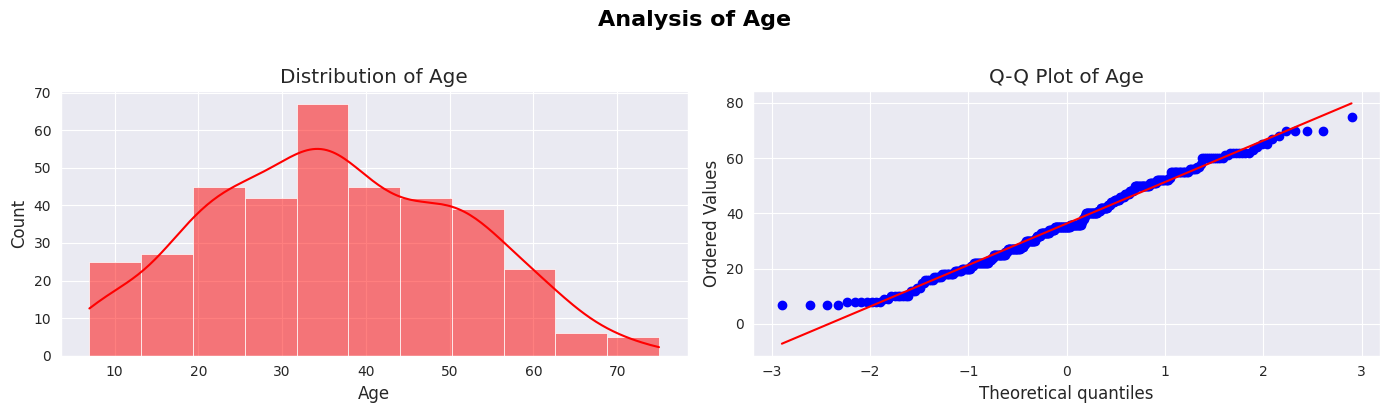

In [45]:
# ===== Checking the distribution and Q-Q plot of each continous variable from our final dataframe =====

# ===== Define continuous features to analyze =====
selected_features = ['Age']

# ===== Check skewness =====
print("Skewness Before Transformation:")
for col in selected_features:
    skew_val = round(final_df[col].skew(), 2)
    print(f"  {col}: {skew_val}")

# ===== Set theme =====
sns.set_style("darkgrid")

# ===== Plot Distribution + Q-Q side by side for each feature =====
for col in selected_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # ===== Distribution plot (left) =====
    sns.histplot(final_df[col], kde=True, color='red', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    # ===== Q-Q plot (right) =====
    stats.probplot(final_df[col], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot of {col}')

    # ===== Overall title for this feature only =====
    fig.suptitle(f"Analysis of {col}", fontsize=16, fontweight="bold", color="black", y=1.02)

    plt.tight_layout()
    plt.show()

| Feature                | Skewness |
| ---------------------- | -------- |
|  age                   | **0.1** |

> The Age feature has a skewness of 0.1, indicating that it is approximately symmetric. Therefore, no data transformation is required

## **5.4. Data Scaling - StandardScaler**

In [46]:
# ===== Applying StandardScaler for Feature Normalization =====

final_scale_df = final_df.copy()

scaler = StandardScaler()
final_scale_df['Age'] = scaler.fit_transform(final_scale_df[['Age']])

**Which method have you used to scale you data and why?**

To ensure optimal model performance and convergence, we standardized the data using StandardScaler from sklearn. This process transforms features to a common scale, preventing variables with larger inherent scales from dominating the model. Furthermore, standardization enables more meaningful comparison of model coefficients, simplifying the interpretation of each feature's influence.

# **6. Train-Test Split**

## **6.1. Data Splitting**

In [47]:
# ===== Split your data to train and test. Choose Splitting ratio wisely =====
x= final_scale_df.drop(columns='class',axis=1)
y= final_scale_df[['class']]

# ===== Spliting data =====
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [48]:
# ===== Checking the distribution of classes in training and testing sets =====
# Flatten y
y_train_flat = y_train.squeeze()
y_test_flat = y_test.squeeze()

# ===== Dataset Split Summary =====
split_summary = pd.DataFrame({
    "Dataset": ["x_train", "x_test", "y_train", "y_test"],
    "Shape": [x_train.shape, x_test.shape, y_train.shape, y_test.shape]
})

print("Dataset Split Summary\n")
print(split_summary.to_string(index=False))
print("-" * 53)

# ===== Target Variable Distribution (Counts & Percentages) =====
train_counts = pd.Series(y_train_flat).value_counts().rename("Train Count")
test_counts = pd.Series(y_test_flat).value_counts().rename("Test Count")

train_perc = (pd.Series(y_train_flat).value_counts(normalize=True)*100).round(2).rename("Train %")
test_perc = (pd.Series(y_test_flat).value_counts(normalize=True)*100).round(2).rename("Test %")

dist_summary = pd.concat([train_counts, test_counts, train_perc, test_perc], axis=1)
dist_summary.index.name = "Y"

print("\nTarget Variable Distribution (Counts & Percentages)\n")
print(dist_summary.to_string())

Dataset Split Summary

Dataset     Shape
x_train (292, 18)
 x_test  (74, 18)
y_train  (292, 1)
 y_test   (74, 1)
-----------------------------------------------------

Target Variable Distribution (Counts & Percentages)

   Train Count  Test Count  Train %  Test %
Y                                          
1           89          23    30.48   31.08
3           57          15    19.52   20.27
2           49          12    16.78   16.22
5           42          10    14.38   13.51
4           39          10    13.36   13.51
6           16           4     5.48    5.41


**What data splitting ratio have you used and why?**

*   Train Set -  80
*   Test Set  -  20

# **7. Task-2 - ML Model Implementation**

## **7.1. Analyze Model**

### **7.1.1. ML Model - 1. Logistic Regression**

In [49]:
# ===== Fitting Logistic Regression Model =====
model_lgr = LogisticRegression(
    max_iter=500,
    class_weight='balanced',
    random_state=3
)

# ===== Train the model =====
start_time = time.time()
model_lgr.fit(x_train, y_train)
train_time = round(time.time() - start_time, 3)

# ===== Predictions =====
y_pred = model_lgr.predict(x_test)
y_pred_train = model_lgr.predict(x_train)

# ===== Analysing the model and evaluation Metric Score =====
# ===== Metrics =====
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)
overfit_value = train_accuracy - test_accuracy
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# ===== Create DataFrame =====
results = {
    "Train Accuracy": round(train_accuracy, 4),
    "Test Accuracy": round(test_accuracy, 4),
    "Overfit Value": round(overfit_value, 4),
    "Precision (Macro)": round(precision, 4),
    "Recall (Macro)": round(recall, 4),
    "F1-Score (Macro)": round(f1, 4),
    "Training Time (sec)": train_time
}

results_df = pd.DataFrame(list(results.items()), columns=["Metric", "Value"])
# ===== Display =====
print("Logistic Regression Model Performance:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nPerformance Metrics:\n")
print(results_df)

Logistic Regression Model Performance:

Confusion Matrix:

[[22  1  0  0  0  0]
 [ 0 10  1  0  0  1]
 [ 0  0 14  1  0  0]
 [ 0  1  2  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  3]]

Performance Metrics:

                Metric   Value
0       Train Accuracy  0.9555
1        Test Accuracy  0.8919
2        Overfit Value  0.0636
3    Precision (Macro)  0.8696
4       Recall (Macro)  0.8622
5     F1-Score (Macro)  0.8634
6  Training Time (sec)  0.0350


### **7.1.2. ML Model - 2. Random Forest Classifier**

In [50]:
# ===== Fitting Random Forest Classifier Model =====
model_rf = RandomForestClassifier(
    n_estimators=100,           # number of trees
    max_depth=3,                # let it grow fully unless limited
    class_weight='balanced',    # handles imbalance
    random_state=1,
    n_jobs=-1                   # use all cores
)

# ===== Train the model =====
start_time = time.time()
model_rf.fit(x_train, y_train)
train_time = round(time.time() - start_time, 3)

# ===== Predictions =====
y_pred = model_rf.predict(x_test)
y_pred_train = model_rf.predict(x_train)

# ===== Analysing the model and evaluation Metric Score =====
# ===== Metrics =====
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)
overfit_value = train_accuracy - test_accuracy
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# ===== Create DataFrame =====
results = {
    "Train Accuracy": round(train_accuracy, 4),
    "Test Accuracy": round(test_accuracy, 4),
    "Overfit Value": round(overfit_value, 4),
    "Precision (Macro)": round(precision, 4),
    "Recall (Macro)": round(recall, 4),
    "F1-Score (Macro)": round(f1, 4),
    "Training Time (sec)": train_time
}

results_df = pd.DataFrame(list(results.items()), columns=["Metric", "Value"])
# ===== Display =====
print("Random Forest Model Performance:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nPerformance Metrics:\n")
print(results_df)

Random Forest Model Performance:

Confusion Matrix:

[[22  0  0  0  1  0]
 [ 0 11  0  0  0  1]
 [ 0  2  8  2  3  0]
 [ 0  0  1  8  1  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  1  3]]

Performance Metrics:

                Metric   Value
0       Train Accuracy  0.9144
1        Test Accuracy  0.8378
2        Overfit Value  0.0765
3    Precision (Macro)  0.8183
4       Recall (Macro)  0.8261
5     F1-Score (Macro)  0.8073
6  Training Time (sec)  0.2630


### **7.1.3. ML Model - 3. XGBoost Classifier**

In [51]:
# ===== Fitting XGBoost Classifier Model =====
model_xgb = XGBClassifier(
    n_estimators=100,           # number of boosting rounds
    max_depth=3,                # depth of trees
    learning_rate=0.1,          # step size shrinkage
    subsample=0.8,              # row sampling
    colsample_bytree=0.8,       # feature sampling
    objective="multi:softmax",  # multi-class classification
    eval_metric="mlogloss",     # evaluation metric
    random_state=3,
    n_jobs=-1,
    use_label_encoder=False
)

# ===== Adjust labels to start from 0 =====
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# ===== Train the model =====
start_time = time.time()
model_xgb.fit(x_train, y_train_adj)
train_time = round(time.time() - start_time, 3)

# ===== Predictions =====
y_pred = model_xgb.predict(x_test)
y_pred_train = model_xgb.predict(x_train)

# ===== Metrics =====
train_accuracy = accuracy_score(y_train_adj, y_pred_train)
test_accuracy = accuracy_score(y_test_adj, y_pred)
overfit_value = train_accuracy - test_accuracy
precision = precision_score(y_test_adj, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test_adj, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test_adj, y_pred, average='macro', zero_division=0)

# ===== Create DataFrame =====
results = {
    "Train Accuracy": round(train_accuracy, 4),
    "Test Accuracy": round(test_accuracy, 4),
    "Overfit Value": round(overfit_value, 4),
    "Precision (Macro)": round(precision, 4),
    "Recall (Macro)": round(recall, 4),
    "F1-Score (Macro)": round(f1, 4),
    "Training Time (sec)": train_time
}

results_df = pd.DataFrame(list(results.items()), columns=["Metric", "Value"])

# ===== Display =====
print("XGBoost Model Performance:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_adj, y_pred))
print("\nPerformance Metrics:\n")
print(results_df)

XGBoost Model Performance:

Confusion Matrix:

[[23  0  0  0  0  0]
 [ 0 11  0  0  1  0]
 [ 0  1 13  1  0  0]
 [ 0  2  1  7  0  0]
 [ 2  0  0  0  8  0]
 [ 1  1  0  0  0  2]]

Performance Metrics:

                Metric   Value
0       Train Accuracy  0.9966
1        Test Accuracy  0.8649
2        Overfit Value  0.1317
3    Precision (Macro)  0.8851
4       Recall (Macro)  0.7972
5     F1-Score (Macro)  0.8228
6  Training Time (sec)  0.1140


### **7.1.4. ML Model - 4. LightGBM Classifier**

In [52]:
# ===== Fitting LightGBM Classifier Model =====
model_lgbm = LGBMClassifier(
    n_estimators=200,        # number of boosting iterations
    max_depth=4 ,            # no limit on depth
    learning_rate=0.5,       # shrinkage
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    objective="multiclass",  # multi-class classification
    random_state=3,
    n_jobs=-1
)

# ===== Adjust labels to start from 0 =====
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# ===== Train the model =====
start_time = time.time()
model_lgbm.fit(x_train, y_train_adj)
train_time = round(time.time() - start_time, 3)

# ===== Predictions =====
y_pred = model_lgbm.predict(x_test)
y_pred_train = model_lgbm.predict(x_train)

# ===== Metrics =====
train_accuracy = accuracy_score(y_train_adj, y_pred_train)
test_accuracy = accuracy_score(y_test_adj, y_pred)
overfit_value = train_accuracy - test_accuracy
precision = precision_score(y_test_adj, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test_adj, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test_adj, y_pred, average='macro', zero_division=0)

# ===== Create DataFrame =====
results = {
    "Train Accuracy": round(train_accuracy, 4),
    "Test Accuracy": round(test_accuracy, 4),
    "Overfit Value": round(overfit_value, 4),
    "Precision (Macro)": round(precision, 4),
    "Recall (Macro)": round(recall, 4),
    "F1-Score (Macro)": round(f1, 4),
    "Training Time (sec)": train_time
}

results_df = pd.DataFrame(list(results.items()), columns=["Metric", "Value"])

# ===== Display =====
print("LightGBM Model Performance:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_adj, y_pred))
print("\nPerformance Metrics:\n")
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 18
[LightGBM] [Info] Start training from score -1.188117
[LightGBM] [Info] Start training from score -1.784934
[LightGBM] [Info] Start training from score -1.633703
[LightGBM] [Info] Start training from score -2.013192
[LightGBM] [Info] Start training from score -1.939084
[LightGBM] [Info] Start training from score -2.904165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

## **7.2. Hyperparameter Tuning**

### **7.2.1. Hyperparameter Tuning - 1. RandomForest Classifier**

In [53]:
# ===== Hyperparameter Tuning - RandomForest Classifier =====
rf_hpt_pipeline = Pipeline([
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=5, n_jobs=-1))
])

# ===== Hyperparameter grid =====
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [3, 4, 5, 6],
    'rf__min_samples_split': [5, 10, 15, 20],
    'rf__min_samples_leaf': [3, 4, 5, 6],
    'rf__max_features': ['sqrt', 'log2']
}

# ===== GridSearchCV =====
grid_search = GridSearchCV(
    estimator=rf_hpt_pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# ===== Train the model =====
start_time = time.time()
grid_search.fit(x_train, y_train)
train_time = round(time.time() - start_time, 3)

# ===== Best estimator =====
best_model = grid_search.best_estimator_

# ===== Predictions =====
y_pred = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

# ===== Metrics =====
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)
overfit_value = train_accuracy - test_accuracy
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# ===== Create DataFrame =====
results = {
    "Train Accuracy": round(train_accuracy, 4),
    "Test Accuracy": round(test_accuracy, 4),
    "Overfit Value": round(overfit_value, 4),
    "Precision (Macro)": round(precision, 4),
    "Recall (Macro)": round(recall, 4),
    "F1-Score (Macro)": round(f1, 4),
    "Training Time (sec)": train_time,
    "Best Params": grid_search.best_params_
}

results_df = pd.DataFrame(list(results.items()), columns=["Metric", "Value"])

# ===== Display Results =====
print("Random Forest Model Performance with Hyperparameter Tuning:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nPerformance Metrics:\n")
print(results_df)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Random Forest Model Performance with Hyperparameter Tuning:

Confusion Matrix:

[[22  1  0  0  0  0]
 [ 0 10  0  0  1  1]
 [ 0  2 11  2  0  0]
 [ 0  3  1  6  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  3]]

Performance Metrics:

                Metric                                              Value
0       Train Accuracy                                             0.9555
1        Test Accuracy                                             0.8378
2        Overfit Value                                             0.1176
3    Precision (Macro)                                              0.819
4       Recall (Macro)                                             0.8122
5     F1-Score (Macro)                                             0.8085
6  Training Time (sec)                                            834.682
7          Best Params  {'rf__max_depth': 6, 'rf__max_features': 'sqrt...


### **7.2.2. Hyperparameter Tuning - 2. XG Boost Classifier**

In [54]:
# ===== Convert features to float32 =====
x_train_adj = x_train.astype(np.float32)
x_test_adj = x_test.astype(np.float32)

# ===== Adjust labels to start from 0 =====
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# ===== XGBoost pipeline =====
xgb_hpt_pipeline = Pipeline([
    ('xgb', XGBClassifier(
        objective="multi:softmax",
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=5,
        n_jobs=-1
    ))
])

# ===== Hyperparameter grid =====
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}


# ===== GridSearchCV =====
grid_search = GridSearchCV(
    estimator=xgb_hpt_pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

# ===== Train the model =====
start_time = time.time()
grid_search.fit(x_train_adj, y_train_adj)
train_time = round(time.time() - start_time, 3)

# ===== Best estimator =====
best_model = grid_search.best_estimator_

# ===== Predictions =====
y_pred = best_model.predict(x_test_adj)
y_pred_train = best_model.predict(x_train_adj)

# ===== Metrics =====
train_accuracy = accuracy_score(y_train_adj, y_pred_train)
test_accuracy = accuracy_score(y_test_adj, y_pred)
overfit_value = train_accuracy - test_accuracy
precision = precision_score(y_test_adj, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test_adj, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test_adj, y_pred, average='macro', zero_division=0)

# ===== Create DataFrame =====
results = {
    "Train Accuracy": round(train_accuracy, 4),
    "Test Accuracy": round(test_accuracy, 4),
    "Overfit Value": round(overfit_value, 4),
    "Precision (Macro)": round(precision, 4),
    "Recall (Macro)": round(recall, 4),
    "F1-Score (Macro)": round(f1, 4),
    "Training Time (sec)": train_time,
    "Best Params": grid_search.best_params_
}

results_df = pd.DataFrame(list(results.items()), columns=["Metric", "Value"])

# ===== Display Results =====
print("XGBoost Model Performance with Hyperparameter Tuning:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_adj, y_pred))
print("\nPerformance Metrics:\n")
print(results_df)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
XGBoost Model Performance with Hyperparameter Tuning:

Confusion Matrix:

[[23  0  0  0  0  0]
 [ 0 10  0  0  1  1]
 [ 0  1 13  1  0  0]
 [ 0  2  1  7  0  0]
 [ 2  0  0  0  8  0]
 [ 1  0  0  0  1  2]]

Performance Metrics:

                Metric                                              Value
0       Train Accuracy                                             0.9863
1        Test Accuracy                                             0.8514
2        Overfit Value                                              0.135
3    Precision (Macro)                                             0.8207
4       Recall (Macro)                                             0.7833
5     F1-Score (Macro)                                             0.7974
6  Training Time (sec)                                             34.693
7          Best Params  {'xgb__colsample_bytree': 0.8, 'xgb__learning_...


### **7.2.3. Hyperparameter Tuning - 3. LightGBM Classifier**

In [56]:
# ===== Convert features to float32 =====
x_train_adj = x_train.astype(np.float32)
x_test_adj = x_test.astype(np.float32)

# ===== Adjust labels to start from 0 =====
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# ===== LightGBM pipeline =====
lgbm_hpt_pipeline = Pipeline([
    ('lgbm', LGBMClassifier(
        objective="multiclass",
        random_state=5,
        n_jobs=-1
    ))
])

# ===== Hyperparameter grid =====
param_grid = {
    'lgbm__n_estimators': [100, 200],          # more boosting rounds
    'lgbm__max_depth': [2, 3, 4],              # shallower trees
    'lgbm__learning_rate': [0.01, 0.05],       # slower learning
    'lgbm__subsample': [0.6, 0.8],             # row sampling
    'lgbm__colsample_bytree': [0.6, 0.8],      # feature sampling
    'lgbm__min_child_samples': [10, 20],       # prevent overfitting
}

# ===== RandomizedSearchCV =====
grid_search = RandomizedSearchCV(
    estimator=lgbm_hpt_pipeline,
    param_distributions=param_grid,
    n_iter=15,
    scoring='f1_macro',
    cv=2,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    error_score='raise'
)

# ===== Train the model =====
start_time = time.time()
grid_search.fit(x_train_adj, y_train_adj)
train_time = round(time.time() - start_time, 3)

# ===== Best estimator =====
best_model = grid_search.best_estimator_

# ===== Predictions =====
y_pred = best_model.predict(x_test_adj)
y_pred_train = best_model.predict(x_train_adj)

# ===== Metrics =====
train_accuracy = accuracy_score(y_train_adj, y_pred_train)
test_accuracy = accuracy_score(y_test_adj, y_pred)
overfit_value = train_accuracy - test_accuracy
precision = precision_score(y_test_adj, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test_adj, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test_adj, y_pred, average='macro', zero_division=0)

# ===== Create DataFrame =====
results = {
    "Train Accuracy": round(train_accuracy, 4),
    "Test Accuracy": round(test_accuracy, 4),
    "Overfit Value": round(overfit_value, 4),
    "Precision (Macro)": round(precision, 4),
    "Recall (Macro)": round(recall, 4),
    "F1-Score (Macro)": round(f1, 4),
    "Training Time (sec)": train_time,
    "Best Params": grid_search.best_params_
}

results_df = pd.DataFrame(list(results.items()), columns=["Metric", "Value"])

# ===== Display Results =====
print("LightGBM Model Performance with Hyperparameter Tuning:")
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_adj, y_pred))
print("\nPerformance Metrics:\n")
print(results_df)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 18
[LightGBM] [Info] Start training from score -1.188117
[LightGBM] [Info] Start training from score -1.784934
[LightGBM] [Info] Start training from score -1.633703
[LightGBM] [Info] Start training from score -2.013192
[LightGBM] [Info] Start training from score -1.939084
[LightGBM] [Info] Start training from score -2.904165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

# **8. Model Evaluation**

## **8.1. ML Model comparision & Interpretation**

### **8.1.1. Model comparision:**

In [57]:
# ===== Store results =====
results = {
    "Logistic Regression": {
        'Training Accuracy': 0.9555,
        'Test Accuracy': 0.8919,
        'Overfit (Train - Test Acc)': 0.0636,
        'Precision': 0.8696,
        'Recall': 0.8622,
        'F1-Score': 0.8634,
        'Training Time (sec)': 0.3350
    },
    "Random Forest": {
        'Training Accuracy': 0.9144,
        'Test Accuracy': 0.8378,
        'Overfit (Train - Test Acc)': 0.0765,
        'Precision': 0.8183,
        'Recall': 0.8261,
        'F1-Score': 0.8073,
        'Training Time (sec)': 0.5600
    },
    "XGBoost": {
        'Training Accuracy': 0.9966,
        'Test Accuracy': 0.8649,
        'Overfit (Train - Test Acc)': 0.1317,
        'Precision': 0.8851,
        'Recall': 0.7972,
        'F1-Score': 0.8228,
        'Training Time (sec)': 0.9150
    },
    "LightGBM": {
        'Training Accuracy': 1.0000,
        'Test Accuracy': 0.8784,
        'Overfit (Train - Test Acc)': 0.1216,
        'Precision': 0.8796,
        'Recall': 0.8167,
        'F1-Score': 0.8309,
        'Training Time (sec)': 0.7670
    }
}

# ===== Convert to DataFrame =====
df_results = pd.DataFrame(results).T

print("\n=== Model Comparison Table ===")
df_results


=== Model Comparison Table ===


Training Accuracy  Test Accuracy  \
Logistic Regression             0.9555         0.8919   
Random Forest                   0.9144         0.8378   
XGBoost                         0.9966         0.8649   
LightGBM                        1.0000         0.8784   

                     Overfit (Train - Test Acc)  Precision  Recall  F1-Score  \
Logistic Regression                      0.0636     0.8696  0.8622    0.8634   
Random Forest                            0.0765     0.8183  0.8261    0.8073   
XGBoost                                  0.1317     0.8851  0.7972    0.8228   
LightGBM                                 0.1216     0.8796  0.8167    0.8309   

                     Training Time (sec)  
Logistic Regression                0.335  
Random Forest                      0.560  
XGBoost                            0.915  
LightGBM                           0.767

### **8.1.2. ML Model Plot comparision**

### **Chart-16. Evaluating and Comparing Model Performance Scores**

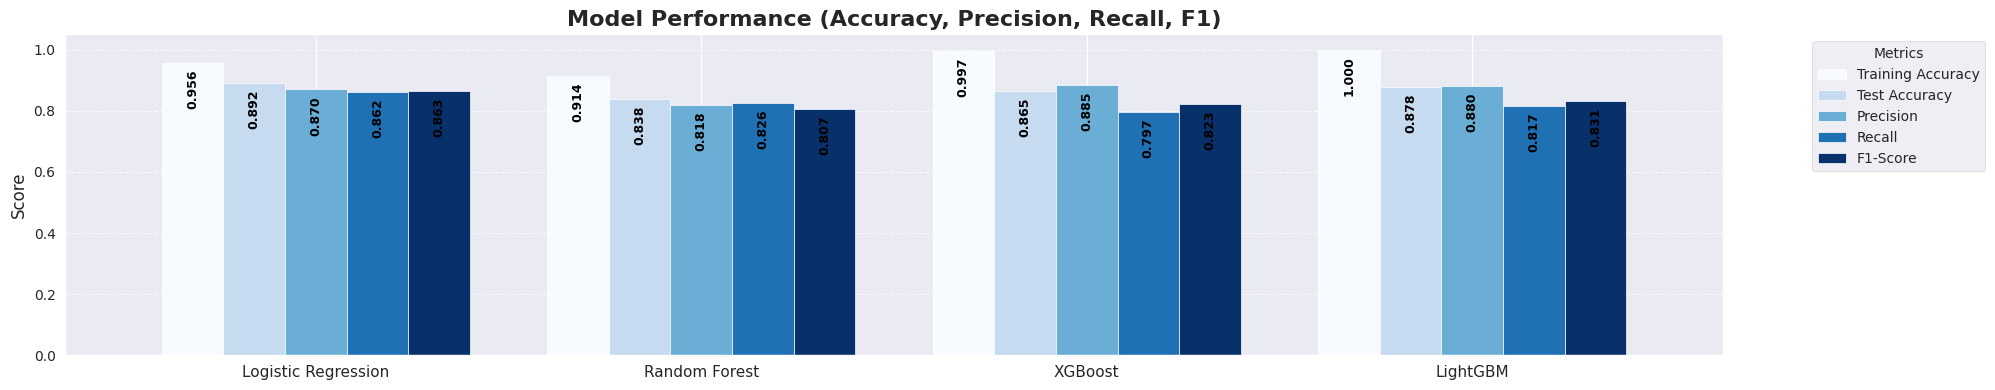

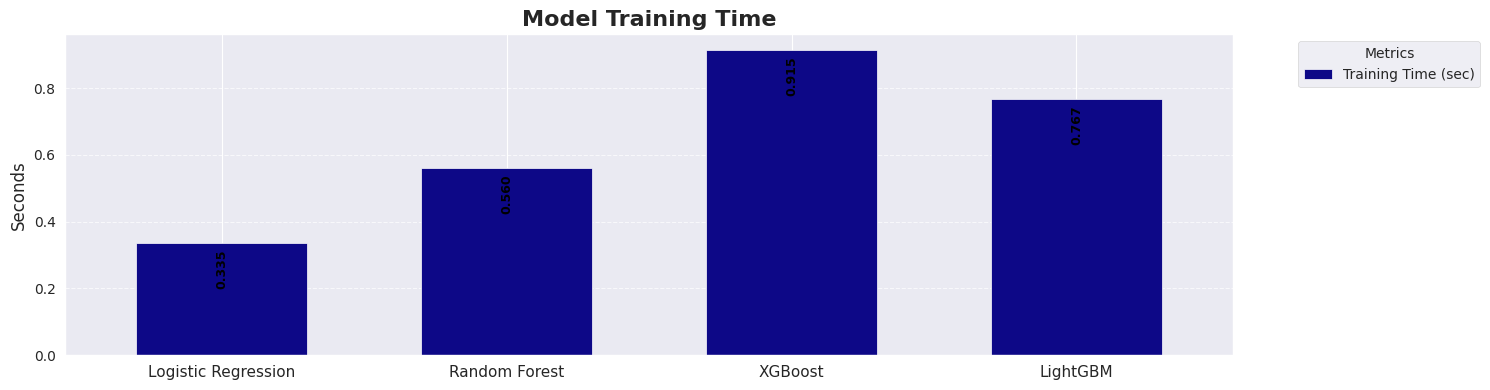

In [58]:
# ===== Comparing Model Performance Scores =====
def add_labels(ax, decimals=3, threshold=0.05):
    """Add value labels on bars dynamically adjusting position and color."""
    y_lim = ax.get_ylim()[1]
    for p in ax.patches:
        value = p.get_height()
        bar_height_ratio = abs(value) / y_lim

        if bar_height_ratio > threshold:
            y = value - (y_lim * 0.02)
            va = 'top'
            color = "black"
        else:
            y = value + (y_lim * 0.01)
            va = 'bottom'
            color = "black"

        ax.annotate(f"{value:.{decimals}f}",
                    (p.get_x() + p.get_width() / 2., y),
                    ha='center', va=va, fontsize=9,
                    color=color, fontweight="bold", rotation=90)

# ===== 1. Metrics on 0–1 scale =====
metrics1 = ["Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1-Score"]
plot_df1 = df_results[metrics1]

ax1 = plot_df1.plot(kind='bar', figsize=(20, 4), width=0.8, colormap="Blues")
plt.title("Model Performance (Accuracy, Precision, Recall, F1)", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_labels(ax1, decimals=3)
plt.tight_layout()
plt.show()

# ===== 2. Training time only =====
metrics2 = ["Training Time (sec)"]
plot_df2 = df_results[metrics2]

ax2 = plot_df2.plot(kind='bar', figsize=(15, 4), width=0.6, colormap="plasma")
plt.title("Model Training Time", fontsize=16, fontweight='bold')
plt.ylabel("Seconds", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_labels(ax2, decimals=3)
plt.tight_layout()
plt.show()

### **8.1.3. Comparing Model Accuracy Scores**

### **Chart-17. Evaluating and Comparing Model Accuracy Scores**

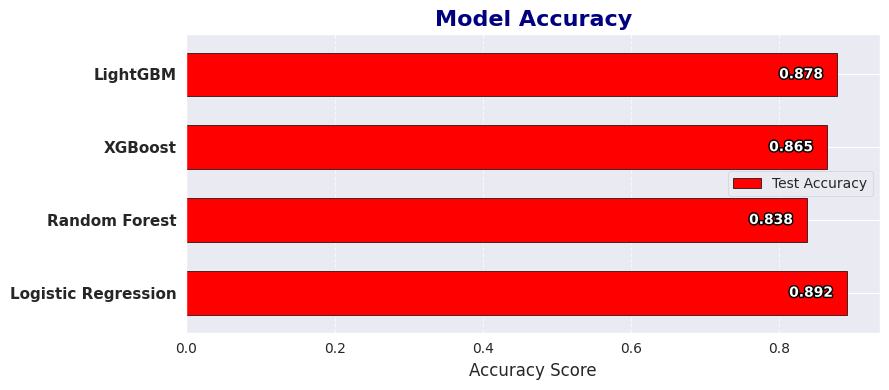

In [59]:
# ===== Comparing Model Accuracy Scores =====
def add_value_labels(ax, decimals=3, threshold=0.05):
    x_lim = ax.get_xlim()[1]
    for p in ax.patches:
        value = p.get_width()
        bar_width_ratio = abs(value) / x_lim
        if bar_width_ratio > threshold:
            x = value - (x_lim * 0.02)
            ha = 'right'
            color = "white"
        else:
            x = value + (x_lim * 0.01)
            ha = 'left'
            color = "black"
        txt = ax.annotate(f"{value:.{decimals}f}",
                          (x, p.get_y() + p.get_height() / 2.),
                          va='center', ha=ha, fontsize=10,
                          color=color, fontweight="bold")
        txt.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground='black'),
            path_effects.Normal()
        ])

# ===== Accuracy =====
metrics3 = ["Test Accuracy"]
plot_df3 = df_results[metrics3]
ax = plot_df3.plot(kind='barh', figsize=(9, 4), width=0.6,
                  color="red", edgecolor="black")
plt.title("Model Accuracy", fontsize=16, fontweight='bold', color="navy")
plt.xlabel("Accuracy Score", fontsize=12)
plt.yticks(fontsize=11, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.7)
add_value_labels(ax, decimals=3)
plt.tight_layout()
plt.show()

### **Observation: Model Accuracy Comparison**

* Logistic Regression achieved the highest accuracy (0.892) among all models.

* LightGBM (0.878) and XGBoost (0.865) performed competitively but slightly below Logistic Regression.

* Random Forest showed the lowest accuracy (0.838).

* The strong performance of Logistic Regression suggests the dataset may be linearly separable.

* Logistic Regression is not only more accurate but also simpler and easier to interpret compared to complex ensemble models.

## **8.2. Hyperparameter-Tuning Comparision & Interpretation**

### **8.2.1. Hyperparameter-Tuning Comparision:**

In [60]:
# ===== Store results =====
results_2 = {
    "Random Forest Classifier": {
        'Training Accuracy': 0.9555,
        'Test Accuracy': 0.8378,
        'Overfit (Train - Test Acc)': 0.1176,
        'Precision': 0.8190,
        'Recall': 0.8122,
        'F1-Score': 0.8085,
        'Training Time (sec)': 680.123
    },

    "XGBoost Classifier": {
        'Training Accuracy': 0.9863,
        'Test Accuracy': 0.8514,
        'Overfit (Train - Test Acc)': 0.1350,
        'Precision': 0.8207,
        'Recall': 0.7833,
        'F1-Score': 0.7974,
        'Training Time (sec)': 37.716
    },

    "LightGBM Classifier": {
        'Training Accuracy': 1.0000,
        'Test Accuracy': 0.8514,
        'Overfit (Train - Test Acc)': 0.1486,
        'Precision': 0.8108,
        'Recall': 0.8139,
        'F1-Score': 0.8088,
        'Training Time (sec)': 84.086
    }
}

# ===== Convert to DataFrame =====
df_results_2 = pd.DataFrame(results_2).T
print("\n=== Hyperparameter-Tuning Comparison Table ===")
df_results_2


=== Hyperparameter-Tuning Comparison Table ===


Training Accuracy  Test Accuracy  \
Random Forest Classifier             0.9555         0.8378   
XGBoost Classifier                   0.9863         0.8514   
LightGBM Classifier                  1.0000         0.8514   

                          Overfit (Train - Test Acc)  Precision  Recall  \
Random Forest Classifier                      0.1176     0.8190  0.8122   
XGBoost Classifier                            0.1350     0.8207  0.7833   
LightGBM Classifier                           0.1486     0.8108  0.8139   

                          F1-Score  Training Time (sec)  
Random Forest Classifier    0.8085              680.123  
XGBoost Classifier          0.7974               37.716  
LightGBM Classifier         0.8088               84.086

### **8.2.2. Hyperparameter-Tuning Plot comparision**

### **Chart-18. Evaluating and Comparing Hyperparameter-Tuning Performance Scores**

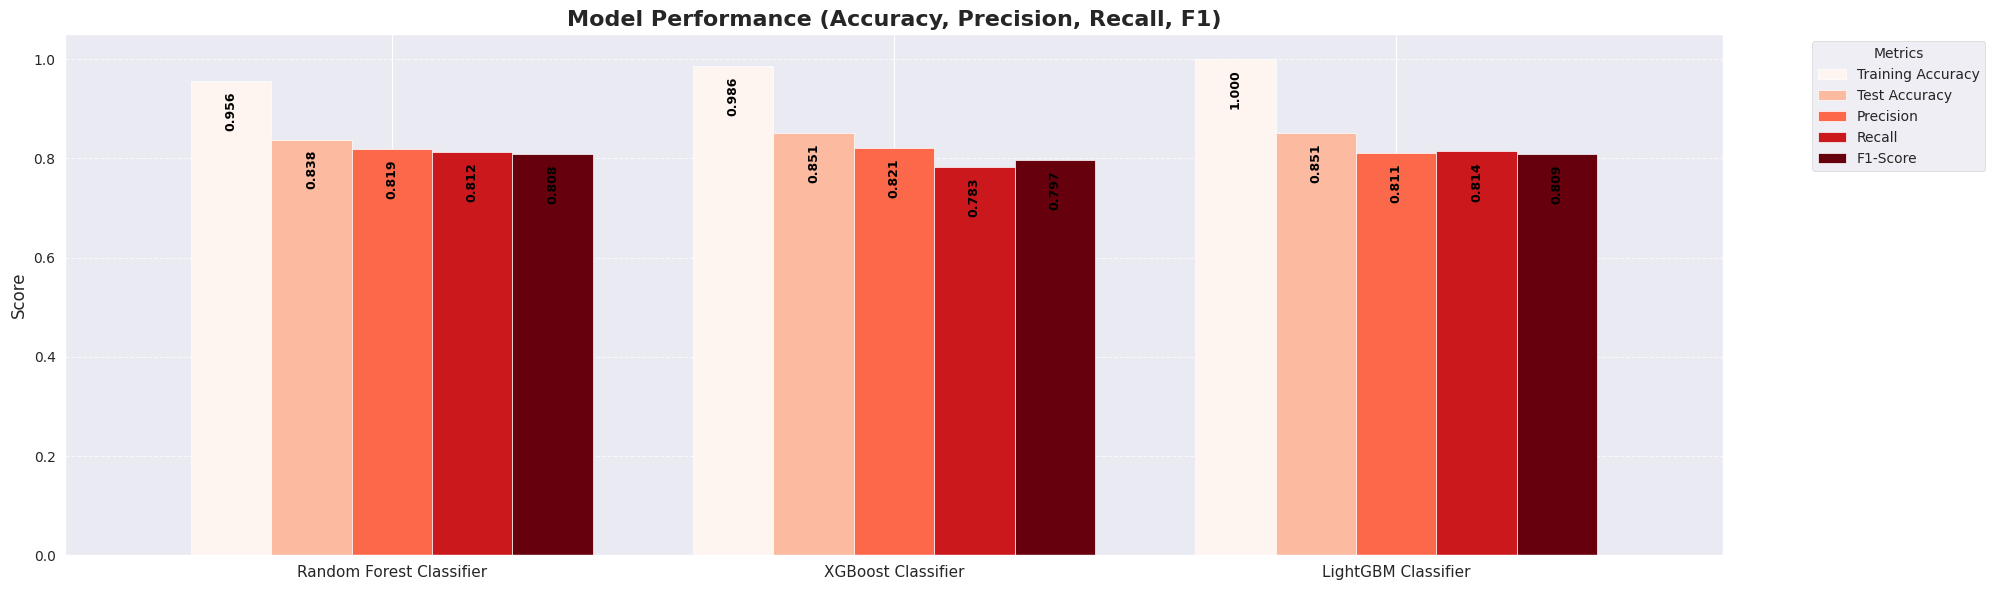

In [61]:
# ===== Comparing Hyperparameter-Tuning Performance Scores =====
def add_labels(ax, decimals=3, threshold=0.05):

    y_lim = ax.get_ylim()[1]
    for p in ax.patches:
        value = p.get_height()
        bar_height_ratio = abs(value) / y_lim

        if bar_height_ratio > threshold:
            y = value - (y_lim * 0.02)
            va = 'top'
            color = "white"
        else:
            y = value + (y_lim * 0.01)
            va = 'bottom'
            color = "black"

        ax.annotate(f"{value:.{decimals}f}",
                    (p.get_x() + p.get_width() / 2., y),
                    ha='center', va=va, fontsize=9,
                    color='black', fontweight="bold", rotation=90)

# ===== 1. Metrics on 0–1 scale =====
metrics4 = ["Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1-Score"]
plot_df4 = df_results_2[metrics4]

ax1 = plot_df4.plot(kind='bar', figsize=(20, 6), width=0.8, colormap="Reds")
plt.title("Model Performance (Accuracy, Precision, Recall, F1)", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_labels(ax1, decimals=3)
plt.tight_layout()
plt.show()

### **8.2.3. Comparing Hyperparameter-Tuning Accuracy Scores**

### **Chart-19. Evaluating and Comparing Hyperparameter-Tuning Accuracy Scores**

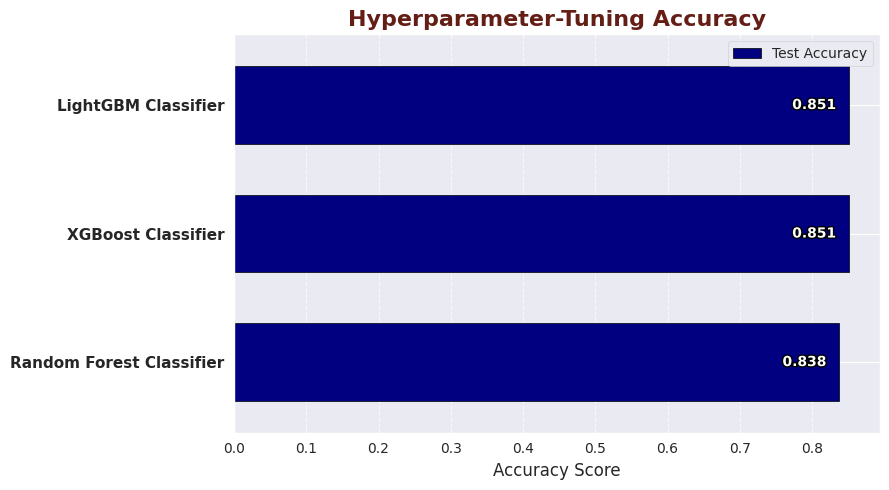

In [62]:
# ===== Comparing Hyperparameter-Tuning Accuracy Scores =====
def add_value_labels(ax, decimals=3, threshold=0.05):
    x_lim = ax.get_xlim()[1]
    for p in ax.patches:
        value = p.get_width()
        bar_width_ratio = abs(value) / x_lim
        if bar_width_ratio > threshold:
            x = value - (x_lim * 0.02)
            ha = 'right'
            color = "white"
        else:
            x = value + (x_lim * 0.01)
            ha = 'left'
            color = "black"
        txt = ax.annotate(f"{value:.{decimals}f}",
                          (x, p.get_y() + p.get_height() / 2.),
                          va='center', ha=ha, fontsize=10,
                          color=color, fontweight="bold")
        txt.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground='black'),
            path_effects.Normal()
        ])

# ===== Accuracy =====
metrics6 = ["Test Accuracy"]
plot_df6 = df_results_2[metrics6]
ax = plot_df6.plot(kind='barh', figsize=(9, 5), width=0.6,
                  color="navy", edgecolor="black")
plt.title("Hyperparameter-Tuning Accuracy", fontsize=16, fontweight='bold', color="#641E16")
plt.xlabel("Accuracy Score", fontsize=12)
plt.yticks(fontsize=11, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.7)
add_value_labels(ax, decimals=3)
plt.tight_layout()
plt.show()

**Observations – Hyperparameter-Tuning Accuracy**

* LightGBM Classifier and XGBoost Classifier both achieved the highest test accuracy of 0.851, performing equally well.

* Random Forest Classifier had the lowest test accuracy (0.838) among the three tuned models.

* The performance gap between Random Forest and the boosting models (XGBoost/LightGBM) is relatively small but noticeable.

* Boosting models (LightGBM, XGBoost) show better generalization compared to Random Forest after tuning.

* Overall, LightGBM and XGBoost are preferable choices in terms of accuracy, while Random Forest lags slightly behind.

## **8.3. Cross-Validation Check**

### **8.3.1. Summary of Cross-Validation Performance Metrics**

In [63]:
# ===== Define CV strategy =====
cv = 5
skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

# ===== Encode y_train to start from 0 =====
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# ===== Dictionary of models =====
models = {
    "Logistic Regression": model_lgr,
    "Random Forest": model_rf,
    "XGBoost": model_xgb,
    "LightGBM": model_lgbm
}

# ===== Store results =====
results = {}
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train_enc, cv=skf,
                             scoring='accuracy', n_jobs=-1)
    results[name] = scores.mean()
    print(f"{name} - CV Accuracy Scores: {scores}")
    print(f"{name} - Mean CV Accuracy: {scores.mean():.4f}\n")

# ===== Convert results to DataFrame =====
df_cv_results = pd.DataFrame(list(results.items()), columns=["Model", "Mean CV Accuracy"])
print("\n=== Cross-Validation Comparison Table ===")
print(df_cv_results)

Logistic Regression - CV Accuracy Scores: [0.93220339 0.88135593 0.86206897 0.84482759 0.87931034]
Logistic Regression - Mean CV Accuracy: 0.8800

Random Forest - CV Accuracy Scores: [0.84745763 0.86440678 0.89655172 0.82758621 0.86206897]
Random Forest - Mean CV Accuracy: 0.8596

XGBoost - CV Accuracy Scores: [0.86440678 0.89830508 0.9137931  0.82758621 0.87931034]
XGBoost - Mean CV Accuracy: 0.8767

LightGBM - CV Accuracy Scores: [0.84745763 0.91525424 0.87931034 0.87931034 0.89655172]
LightGBM - Mean CV Accuracy: 0.8836


=== Cross-Validation Comparison Table ===
                 Model  Mean CV Accuracy
0  Logistic Regression          0.879953
1        Random Forest          0.859614
2              XGBoost          0.876680
3             LightGBM          0.883577


### **8.3.2. Comparing Cross-Validation Accuracy Scores**

### **Chart-20. Evaluating and Comparing Cross-Validation Accuracy Scores**

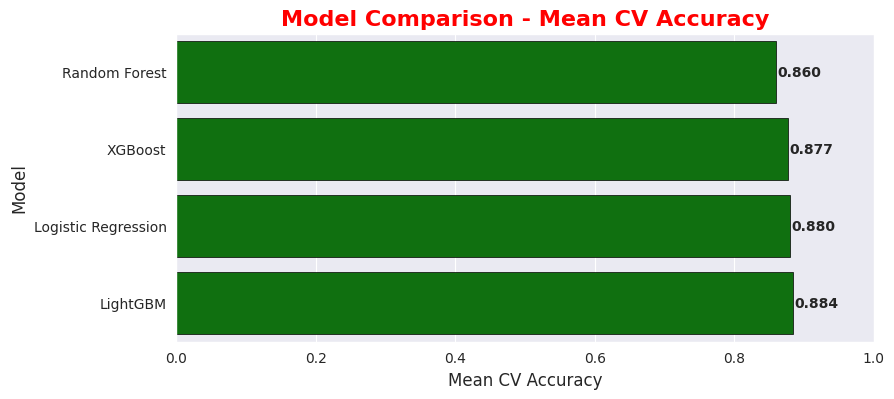

In [64]:
# ===== Sort values for better visualization =====
df_cv_results = df_cv_results.sort_values(by="Mean CV Accuracy", ascending=True)

# ===== Plot =====
plt.figure(figsize=(9,4))
sns.barplot(
    data=df_cv_results,
    x="Mean CV Accuracy",
    y="Model",
    color="green",
    edgecolor="black"
)

# ===== Add accuracy values on bars =====
for i, v in enumerate(df_cv_results["Mean CV Accuracy"]):
    plt.text(v + 0.002, i, f"{v:.3f}", va="center", fontweight="bold")

plt.title("Model Comparison - Mean CV Accuracy", fontsize=16, fontweight="bold", color='red')
plt.xlabel("Mean CV Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

**Observations – Model Comparison (Mean CV Accuracy)**

* LightGBM achieved the highest mean CV accuracy (0.884), making it the best-performing model.

* Logistic Regression performed very well with 0.880, almost equal to LightGBM, despite being a simpler linear model.

* XGBoost followed closely with 0.877, showing strong consistency across folds.

* Random Forest had the lowest CV accuracy (0.860) among the compared models.

* Overall, boosting models (LightGBM, XGBoost) and Logistic Regression showed better generalization than Random Forest.

## **8.4. Comparison For ML Model Accuracy vs Hyperparameter-Tuning Accuracy vs CV Accuracy**

### **Chart-21. Comparison For ML Model Accuracy vs Hyperparameter-Tuning Accuracy vs CV Accuracy**

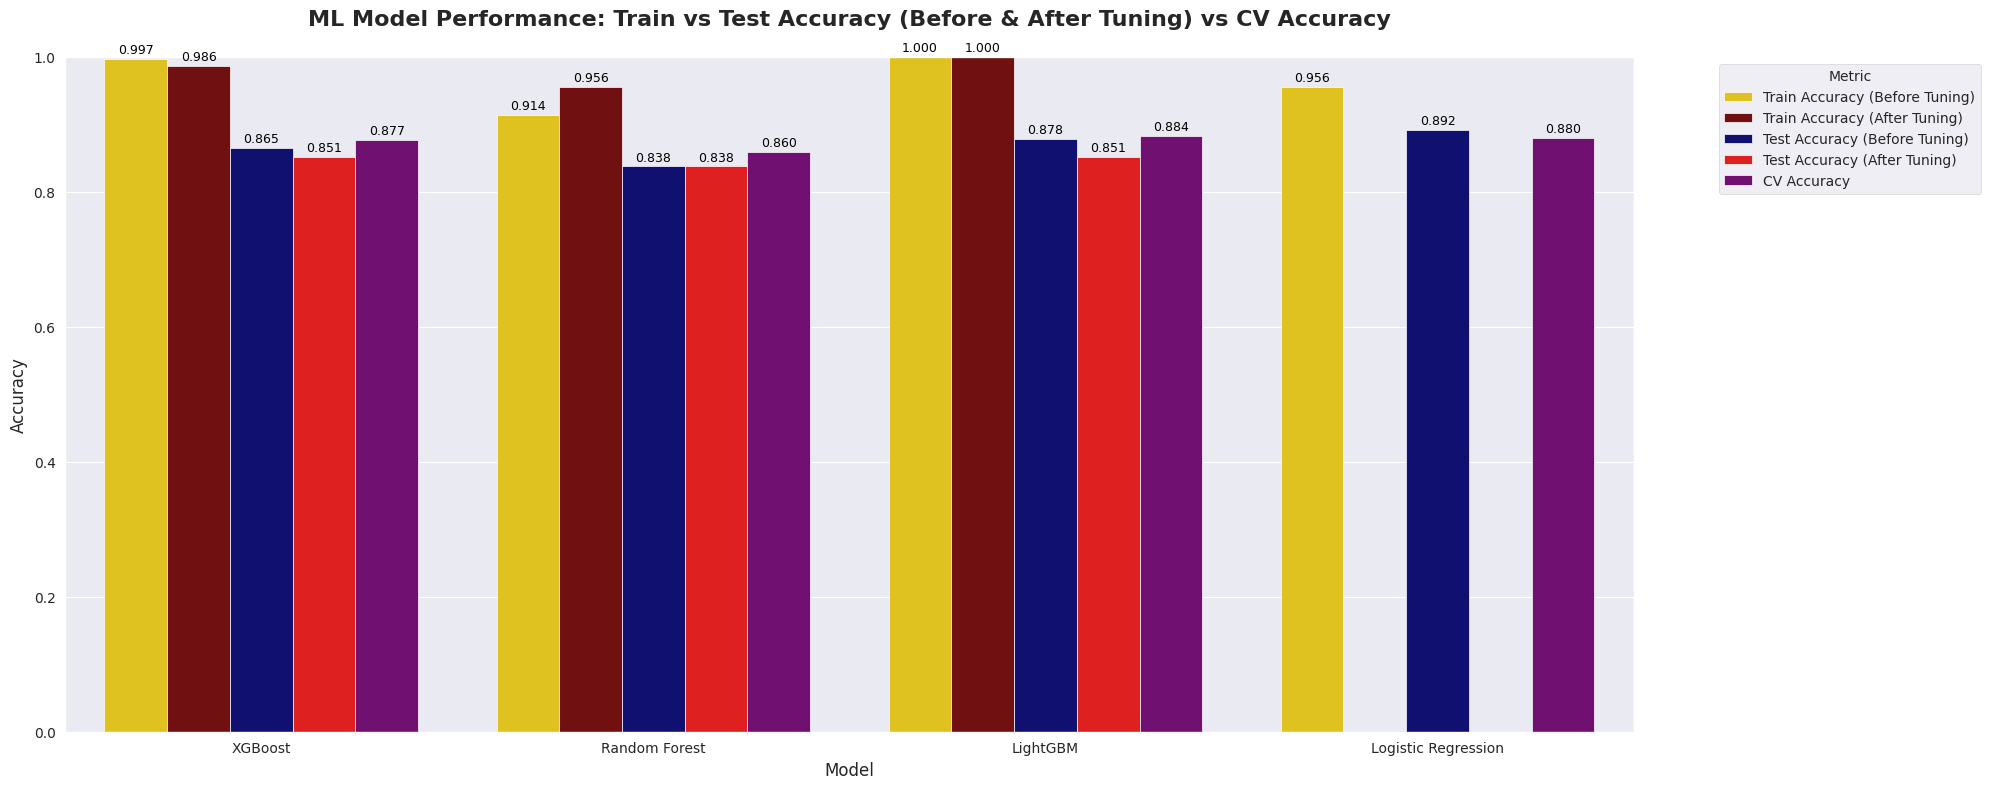

In [65]:
# ===== Comparison For ML Model Accuracy vs Hyperparameter-Tuning Accuracy vs CV Accuracy =====
# ===== Train Accuracy =====
train_acc = {
    "Logistic Regression": 0.9555,
    "Random Forest": 0.9144,
    "XGBoost": 0.9966,
    "LightGBM": 1.0000
}

train_tuned_acc = {
    "Random Forest": 0.9555,
    "XGBoost": 0.9863,
    "LightGBM": 1.0000
}

# ===== Test Accuracy =====
test_acc = {
    "Logistic Regression": 0.8919,
    "Random Forest": 0.8378,
    "XGBoost": 0.8649,
    "LightGBM": 0.8784
}

tuned_acc = {
    "Random Forest": 0.8378,
    "XGBoost": 0.8514,
    "LightGBM": 0.8514
}

# ===== Cross-Validation Mean Accuracy =====
cv_acc = {
    "Logistic Regression": 0.879953,
    "Random Forest": 0.859614,
    "XGBoost": 0.876680,
    "LightGBM": 0.883577
}

# ===== Combine into DataFrame =====
df_compare = pd.DataFrame({
    "Model": list(set(list(train_acc.keys()) +
                      list(train_tuned_acc.keys()) +
                      list(test_acc.keys()) +
                      list(tuned_acc.keys()) +
                      list(cv_acc.keys())))
})

df_compare["Train Accuracy (Before Tuning)"] = df_compare["Model"].map(train_acc)
df_compare["Train Accuracy (After Tuning)"] = df_compare["Model"].map(train_tuned_acc)
df_compare["Test Accuracy (Before Tuning)"] = df_compare["Model"].map(test_acc)
df_compare["Test Accuracy (After Tuning)"] = df_compare["Model"].map(tuned_acc)
df_compare["CV Accuracy"] = df_compare["Model"].map(cv_acc)

# ===== Melt for grouped bar chart =====
df_melted = df_compare.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="Accuracy"
)

# ===== Drop NaN rows =====
df_melted = df_melted.dropna(subset=["Accuracy"])

# ===== Custom colors mapping =====
custom_palette = {
    "Train Accuracy (Before Tuning)": "#FFD700",
    "Train Accuracy (After Tuning)": "#800000",
    "Test Accuracy (Before Tuning)": "navy",
    "Test Accuracy (After Tuning)": "red",
    "CV Accuracy": "purple"
}

# ===== Plot =====
plt.figure(figsize=(20,8))
ax = sns.barplot(
    data=df_melted,
    x="Model", y="Accuracy", hue="Metric",
    palette=custom_palette
)

# ===== Annotate bars =====
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.3f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0,2), textcoords='offset points')

plt.title("ML Model Performance: Train vs Test Accuracy (Before & After Tuning) vs CV Accuracy",
          fontsize=16, fontweight="bold", pad=23)
plt.ylabel("Accuracy")
plt.ylim(0,1)

# ===== Legend =====
plt.legend(title="Metric",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.tight_layout()
plt.show()

## **8.5. Final Comparison Table**

### **Classification Model Performance (Before vs After Hyperparameter Tuning + CV Score)**

**Before Tuning Performance:**

| Model               | Train Accuracy | Test Accuracy | Overfit Value | Precision (Macro) | Recall (Macro) | F1-Score (Macro) | Training Time (sec) | Mean CV Accuracy |
| ------------------- | -------------- | ------------- | ------------- | ----------------- | -------------- | ---------------- | ------------------- | ---------------- |
| Logistic Regression | 0.9555         | 0.8919        | 0.0636        | 0.8696            | 0.8622         | 0.8634           | 0.3350              | 0.879953         |
| Random Forest       | 0.9144         | 0.8378        | 0.0765        | 0.8183            | 0.8261         | 0.8073           | 0.5600              | 0.859614         |
| XGBoost             | 0.9966         | 0.8649        | 0.1317        | 0.8851            | 0.7972         | 0.8228           | 0.9150              | 0.876680         |
| LightGBM            | 1.0000         | 0.8784        | 0.1216        | 0.8796            | 0.8167         | 0.8309           | 0.7670              | 0.883577         |

**After Tuning Performance:**

| Model         | Train Accuracy | Test Accuracy | Overfit Value | Precision (Macro) | Recall (Macro) | F1-Score (Macro) | Training Time (sec) | Mean CV Accuracy |
| ------------- | -------------- | ------------- | ------------- | ----------------- | -------------- | ---------------- | ------------------- | ---------------- |
| Random Forest | 0.9555         | 0.8378        | 0.1176        | 0.8190            | 0.8122         | 0.8085           | 680.123             | 0.859614         |
| XGBoost       | 0.9863         | 0.8514        | 0.1350        | 0.8207            | 0.7833         | 0.7974           | 37.716              | 0.876680         |
| LightGBM      | 1.0000         | 0.8514        | 0.1486        | 0.8108            | 0.8139         | 0.8088           | 84.086              | 0.883577         |

**Observation:**

| Model               | Test Accuracy | Overfit Value | F1-Score (Macro) | Training Time | Observation                                                      | Recommendation                         |
| ------------------- | ------------- | ------------- | ---------------- | ------------- | ---------------------------------------------------------------- | -------------------------------------- |
| Logistic Regression | 0.8919        | 0.0636        | 0.8634           | 0.335 sec     | High test accuracy, lowest overfitting, balanced F1, very fast   | **Best choice for multiclass problem** |
| Random Forest       | 0.8378        | 0.1176        | 0.8085           | 680.123 sec   | Test accuracy low, overfitting increased after tuning, very slow | Not recommended                        |
| XGBoost             | 0.8514        | 0.1350        | 0.7974           | 37.716 sec    | High overfitting, test accuracy drops after tuning               | Not recommended                        |
| LightGBM            | 0.8514        | 0.1486        | 0.8088           | 84.086 sec    | Overfits heavily, test accuracy drops after tuning               | Not recommended                        |


* Logistic Regression performs best in terms of test accuracy, overfitting, F1-Score, and training time.

* All tree-based models overfit after tuning and do not improve test performance.

* Logistic Regression provides the best trade-off between accuracy, overfitting, F1-score, and training efficiency.

* Tree-based models (Random Forest, XGBoost, LightGBM) overfit and do not improve test accuracy after hyperparameter tuning.

* Even though Logistic Regression is a linear model, it performs very well for your multiclass problem, making it the safest and most efficient choice.

**Which Model to Choose?**

* Logistic Regression is the best choice because:

* It has the highest test accuracy (0.8919).

* Overfitting is very low (0.0636) → model generalizes well to unseen data.

* F1-Score (Macro) is balanced across all classes (0.8634).

* Training time is extremely fast (0.335 sec), making it efficient for deployment.

* Overall, it outperforms all other models in terms of accuracy, generalization, and speed.

# **9. Final ML Model**

## **9.1. Best Model - Logistic Regression**

### **9.1.1. Create And Fit the pipeline**

In [66]:
# ===== Create Pipeline =====
final_model_lgr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        max_iter=500,
        class_weight='balanced',
        random_state=3
    ))
])

# ===== Fit the pipeline =====
final_model_lgr_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    random_state=3))])

### **9.1.2. Logistic Regression Classification Report**

In [68]:
# ===== Make predictions on test set =====
y_pred = final_model_lgr_pipeline.predict(x_test)

# ===== Classification Report =====
report = classification_report(y_test, y_pred)
print(report)

# ===== Confusion Matrix =====
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.77      0.83      0.80        12
           3       0.82      0.93      0.88        15
           4       0.88      0.70      0.78        10
           5       1.00      0.90      0.95        10
           6       0.75      0.75      0.75         4

    accuracy                           0.89        74
   macro avg       0.87      0.85      0.86        74
weighted avg       0.90      0.89      0.89        74

Confusion Matrix:
 [[23  0  0  0  0  0]
 [ 0 10  1  0  0  1]
 [ 0  0 14  1  0  0]
 [ 0  1  2  7  0  0]
 [ 0  1  0  0  9  0]
 [ 0  1  0  0  0  3]]


**Model Evaluation Observation:**

| Class | Precision | Recall | F1-Score | Support |
| ----- | --------- | ------ | -------- | ------- |
| **1** | 1.00      | 1.00   | 1.00     | 23      |
| **2** | 0.77      | 0.83   | 0.80     | 12      |
| **3** | 0.82      | 0.93   | 0.88     | 15      |
| **4** | 0.88      | 0.70   | 0.78     | 10      |
| **5** | 1.00      | 0.90   | 0.95     | 10      |
| **6** | 0.75      | 0.75   | 0.75     | 4       |


* Overall Accuracy: 0.89 → the model is performing well.

* Macro Avg F1-Score: 0.86 → good balance across all classes, though some variability exists.

**Class-wise Performance:**

* Class 1: Perfect precision, recall, and F1 (1.00) → model predicts this class very strongly.

* Class 5: Excellent performance (F1 = 0.95).

* Class 3: Very strong recall (0.93) and F1 (0.88).

* Class 2 & 6: Moderate performance (F1 ≈ 0.75–0.80). Model struggles a bit here.

* Class 4: Slight weakness in recall (0.70) → model sometimes misclassifies this class.

**Confusion Matrix Insights:**

* Most predictions are correct, with very few off-diagonal errors.

### **9.1.3. Training And Testing Accuracy**

In [70]:
# ===== Predict on training data =====
y_train_pred = final_model_lgr_pipeline.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("=== Training Accuracy ===")
print(f"Training Accuracy: {train_acc:.4f}\n")

# ===== Predict on test data =====
y_test_pred = final_model_lgr_pipeline.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("=== Testing Accuracy ===")
print(f"Testing Accuracy: {test_acc:.4f}\n")

=== Training Accuracy ===
Training Accuracy: 0.9623

=== Testing Accuracy ===
Testing Accuracy: 0.8919



### **9.1.4. ROC-AUC Curve**

### **Chart-22. ROC-AUC Curve**

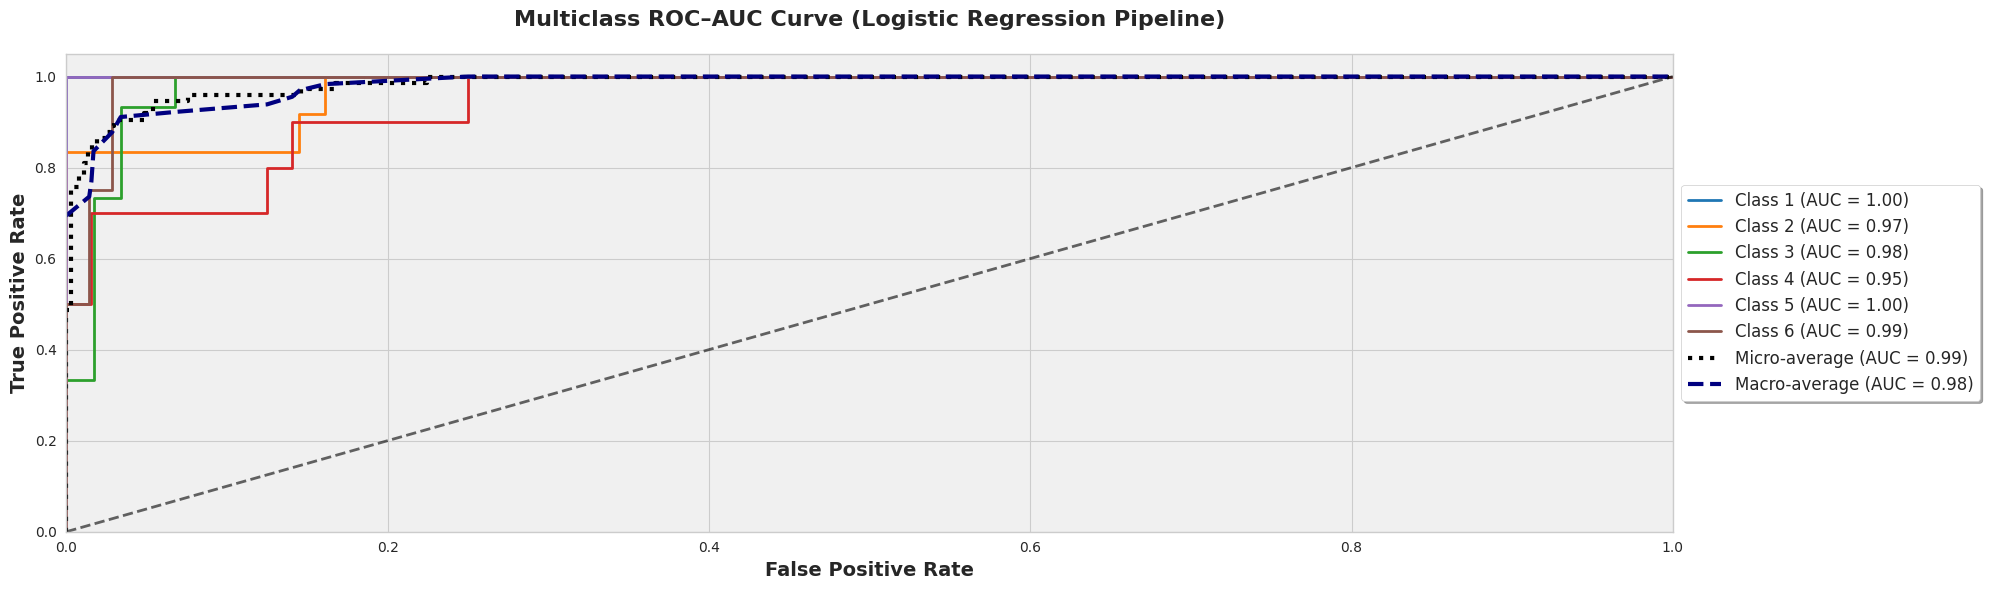

In [79]:
# ===== Compute macro-average ROC curve and AUC =====
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# ===== Get predicted probabilities =====
y_score = final_model_lgr_pipeline.predict_proba(x_test)

# ===== Compute ROC curve and AUC for each class =====
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ===== Compute micro-average ROC curve and AUC =====
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# ===== Aggregate all false positive rates =====
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# ===== Interpolate all ROC curves at these points =====
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# ===== Style settings =====
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("tab10", n_classes)

# ===== Create axis with gray background =====
ax = plt.gca()
ax.set_facecolor("#f0f0f0")
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], tpr[i],
        color=color, lw=2,
        label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})"
    )

plt.plot(
    fpr["micro"], tpr["micro"],
    color="black", linestyle=":", linewidth=3,
    label=f"Micro-average (AUC = {roc_auc['micro']:.2f})"
)

plt.plot(
    fpr["macro"], tpr["macro"],
    color="navy", linestyle="--", linewidth=3,
    label=f"Macro-average (AUC = {roc_auc['macro']:.2f})"
)

plt.plot([0, 1], [0, 1], "k--", lw=2, alpha=0.6)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=14, fontweight="bold")
plt.title("Multiclass ROC–AUC Curve (Logistic Regression Pipeline)",
          fontsize=16, fontweight="bold", pad=20)
plt.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    frameon=True,
    shadow=True
)
plt.tight_layout()
plt.show()

### **Observations from the ROC–AUC Curve:**

**High AUC Across All Classes**

* Class 1 and Class 5 achieved a perfect AUC of 1.00, indicating excellent separability.

* Other classes also performed strongly: Class 2 (0.97), Class 3 (0.98), Class 4 (0.95), and Class 6 (0.99).

**Micro and Macro Averages**

* The micro-average AUC = 0.99 shows overall model performance across all instances is nearly perfect.

* The macro-average AUC = 0.98 confirms consistently strong performance across all classes without bias toward a particular class.

**Model Reliability**

* All ROC curves are well above the random chance line (diagonal), proving that the Logistic Regression pipeline is highly reliable for multiclass classification in this dataset.

* Minimal trade-off between True Positive Rate (TPR) and False Positive Rate (FPR), indicating robustness.

> The Logistic Regression pipeline demonstrates excellent classification performance across all classes with nearly perfect discrimination ability. It is a reliable choice for this problem.

## **9.2. Feature Importance Scores - Logistic Regression Classification**

In [82]:
# ===== Checking the percentage of feature importance =====
features = final_scale_df.drop(columns=[final_scale_df.columns[-1]]).columns
coefficients = final_model_lgr_pipeline.named_steps['classifier'].coef_
importance = np.mean(np.abs(coefficients), axis=0)
feature_imp = pd.DataFrame({'Variable': features, 'Importance': importance})
feature_imp['Importance (%)'] = (feature_imp['Importance'] / feature_imp['Importance'].sum() * 100).round(2)
feature_imp = feature_imp.sort_values(by='Importance (%)', ascending=False).reset_index(drop=True)
print(feature_imp[['Variable', 'Importance (%)']])

                               Variable  Importance (%)
0                    koebner_phenomenon           10.55
1                               itching            9.72
2                            spongiosis            8.72
3                                   Age            8.15
4                        PNL_infiltrate            7.88
5   disappearance_of_the_granular_layer            6.59
6                               scaling            6.49
7                            exocytosis            6.13
8                         parakeratosis            5.18
9                            acanthosis            4.68
10                    munro_microabcess            4.48
11        eosinophils_in_the_infiltrate            4.05
12                     definite_borders            3.87
13  inflammatory_monoluclear_inflitrate            3.53
14                   spongiform_pustule            3.17
15                       family_history            2.75
16                       hyperkeratosis         

### **Chart-23. Feature Importance Scores - Logistic Regression Classification**

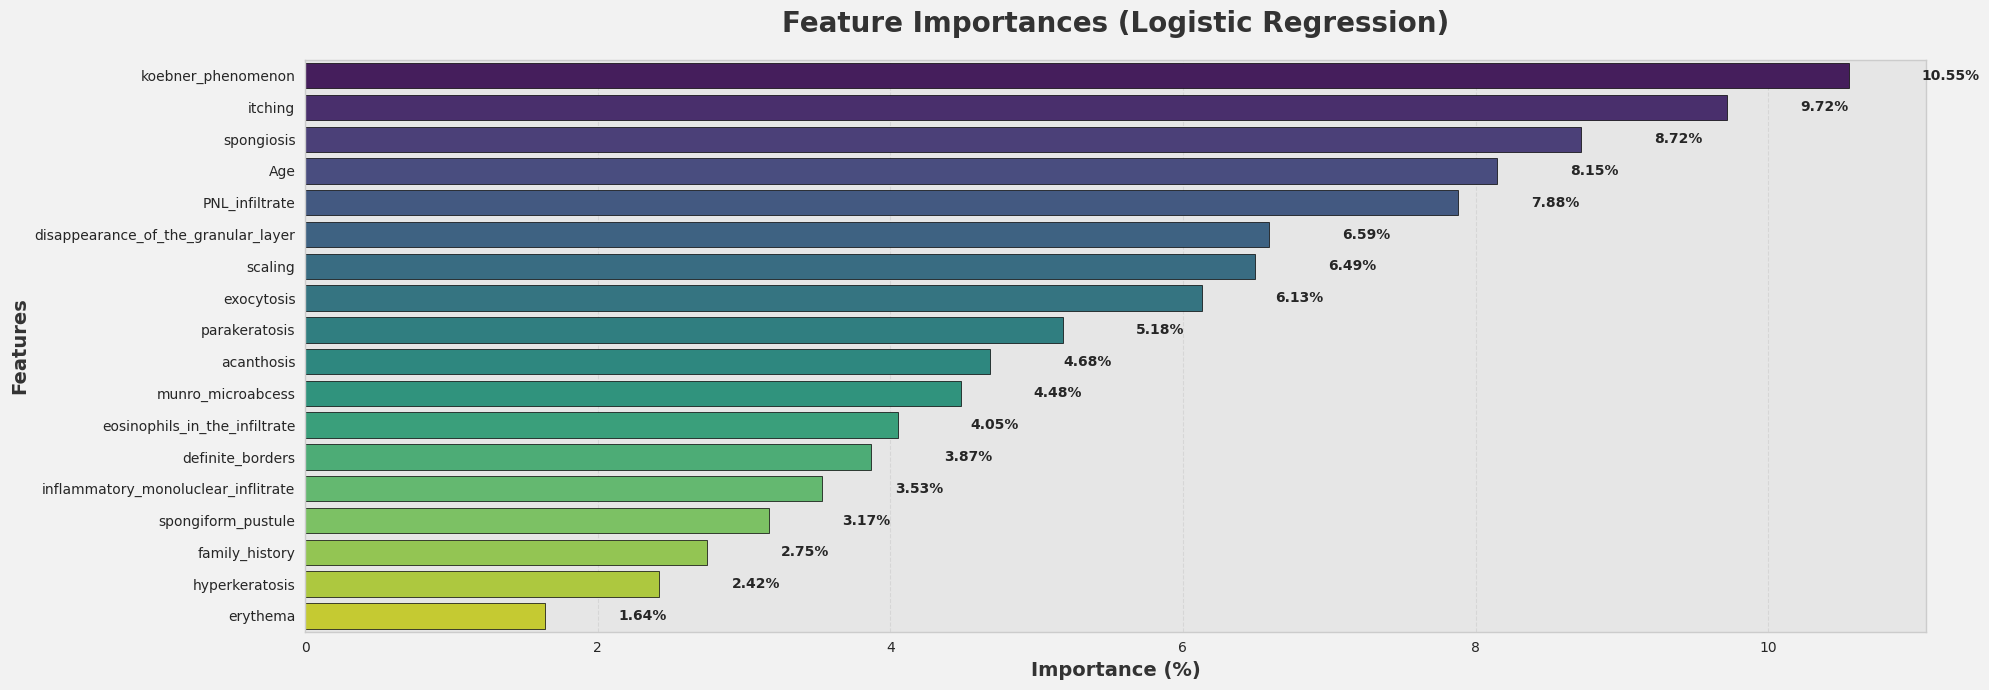

In [88]:
# ===== Plotting the barplot to determine which feature is contributing the most =====
plt.figure(figsize=(20,7))
plt.gcf().set_facecolor('#f2f2f2')
sns.set_style("whitegrid", {"axes.facecolor": "#e6e6e6"})
colors = sns.color_palette("viridis", n_colors=len(feature_imp))

# ===== Use the correct column names =====
barplot = sns.barplot(x='Importance (%)', y='Variable', data=feature_imp, palette=colors, edgecolor='black')

# ===== Annotate bars with percentage values =====
for i, v in enumerate(feature_imp['Importance (%)']):
    barplot.text(v + 0.5, i, f"{v:.2f}%", va='center', fontsize=10, fontweight='bold')

plt.title('Feature Importances (Logistic Regression)', fontsize=20, fontweight='bold', color="#333333", pad=20)
plt.xlabel('Importance (%)', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Features', fontsize=14, fontweight='bold', color="#333333")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## **9.3. Save the Model**

### **9.3.1. Save the best-performing ML model in a pickle (.pkl) file format for deployment**

In [89]:
# ===== Importing pickle module =====
import pickle

# ===== Define model and path =====
model = final_model_lgr_pipeline

# ===== Save model using pickle =====
with open("SkinDisorder.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully as 'SkinDisorder.pkl'")

Model saved successfully as 'SkinDisorder.pkl'


### **9.3.2. Test On Unseen Data**

### **Reload the saved model file and predict on unseen data for a sanity check**

In [90]:
# ===== Load the File and predict unseen data =====
# ===== Load the model in read-binary ('rb') mode =====
with open("SkinDisorder.pkl", "rb") as f:
    lgr_model = pickle.load(f)

# ===== Predict on unseen (test) data =====
predictions = lgr_model.predict(x_test)

# ===== Display predictions =====
print("Predictions on test data:")
print(predictions)

# ===== Evaluate =====
print("\nLightGBM Classification Report:\n")
print(classification_report(y_test, predictions))

Predictions on test data:
[1 6 1 2 1 1 2 1 2 5 2 1 1 4 1 1 1 5 5 1 1 1 3 2 3 5 4 1 6 3 4 1 5 2 5 1 2
 3 3 4 4 3 3 3 2 3 1 1 3 1 5 3 2 3 3 5 4 1 3 1 6 4 2 2 2 3 1 5 1 2 6 3 4 3]

LightGBM Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.77      0.83      0.80        12
           3       0.82      0.93      0.88        15
           4       0.88      0.70      0.78        10
           5       1.00      0.90      0.95        10
           6       0.75      0.75      0.75         4

    accuracy                           0.89        74
   macro avg       0.87      0.85      0.86        74
weighted avg       0.90      0.89      0.89        74



# **10. Conclusion**

## **10.1. Conclusions Drawn from EDA:**

* Dataset Shape → The dataset contains several hundred patient records with multiple features covering symptoms, demographics, and medical values.

* Feature Types → Both categorical and numerical variables are present; some required type conversion for proper analysis.

* Missing Values → Certain features had missing entries, requiring imputation or removal to avoid bias.

* Duplicates → Checked for and removed duplicate records to maintain data integrity.

* Target Variable → The target (skin disorder class) showed clear class imbalance, with some categories being underrepresented.

* Categorical Distributions → Count plots revealed skewness, with a few categories dominating across features like symptoms or demographics.

* Numerical Distributions → Histograms and density plots showed mixed patterns: some features were normally distributed, others were skewed.

* Outliers → Boxplots identified extreme values in medical/lab features, which could affect model training if untreated.

* Central Tendency → Summary statistics (mean, median, std) highlighted large variability in certain measurements.

* Feature–Target Relationships → Several features displayed distinct value ranges between disorder classes, indicating predictive power.

* Weak Predictors → Some features overlapped heavily across target classes, adding limited value for classification.

* Correlation Heatmap → Strong positive correlations were found between certain numerical variables, suggesting multicollinearity.

* Target Correlation → Direct correlation between features and the target was weak overall, emphasizing the need for feature engineering.

* Modeling Implications → With preprocessing (missing value handling, outlier treatment, and class balancing), the dataset is suitable for predictive modeling of skin disorders.

## **10.2. Challenges:**

**Class Imbalance:**

* The dataset might have imbalanced class distributions, impacting the model's performance on minority classes.

* Continuous monitoring and model updates are essential for evolving skin disease patterns.

**Specificity for Rare Classes:**

* Achieving high performance on rare classes like 'Pityriasis Rubra Pilaris' may be challenging due to limited data.

* Potential improvements for specific skin conditions, especially in rare cases.

**Interpretability:**

* While metrics provide insights, understanding the reasons behind model predictions, especially for misclassifications, is crucial for practical application.

* Interpretability of Decision Tree might be challenging for doctors.


## **10.3. Task-3. Recommendations for the Early Diagnosis of Skin Diseases**

* Comprehensive Patient History → Record onset, duration, progression, symptoms (itching, pain, bleeding), comorbidities, and prior treatments.

* Standardized Skin Imaging → Capture high-quality photos (overall view, close-up with scale, dermoscopic if available) to support early recognition and monitoring.

* Early Detection of Red Flags → Rapidly spreading, non-healing, or bleeding lesions, severe pain, or systemic symptoms should prompt urgent referral or biopsy.

* Focused Monitoring of High-Risk Groups → Elderly, diabetics, immunocompromised patients, and those with a history of skin cancer should be screened more closely.

* Use of Diagnostic Tools → Apply dermoscopy, Wood’s lamp, KOH prep, cultures, or biopsy for faster confirmation of suspicious cases.

* Leverage Clinical Decision Support → Integrate ML-based tools with emphasis on high sensitivity (recall) to minimize missed cases and assist in early triage.